# Data Science - Mini Project 2

Harry Setiawan Hamjaya


## Importing librairies

In [1]:
!pip install grplot
!pip install --upgrade grplot

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import copy
from collections import Counter

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve


# Set the maximum number of displayed columns to None to show all columns
pd.set_option('display.max_columns', None)
# Set the maximum column width to a large value
pd.set_option('display.max_colwidth', None)

## Reading CSV file




In [2]:
from google.colab import drive

In [3]:
dataset_id = '1GazBnq84IVwPFgAQz9iPMvXQRYI7gJnp'

dataset_csv = f'https://drive.google.com/uc?id={dataset_id}'

df = pd.read_csv(dataset_csv)
df.head()

ID  Week2_Quiz1  Week3_MP1  Week3_PR1  Week5_MP2  Week5_PR2  \
0  ML-2020-1         5.00       15.0        5.0      16.09       5.00   
1  ML-2020-2         3.33       15.0        5.0      17.83       5.00   
2  ML-2020-3         1.67       13.0        5.0      15.22       5.00   
3  ML-2020-4         2.50       14.0        5.0      10.00       5.00   
4  ML-2020-6         0.00       15.0        5.0      12.17       4.93   

   Week7_MP3  Week7_PR3  Week4_Quiz2  Week6_Quiz3  Week8_Total  Week1_Stat0  \
0      21.88        5.0         5.00          5.0        82.97            0   
1      22.27        5.0         4.00          5.0        82.43            8   
2      27.05        2.5         5.00          5.0        79.44            4   
3      31.02        5.0         3.13          5.0        80.65           12   
4      15.91        5.0         4.67          5.0        67.68            6   

   Week1_Stat1  Week1_Stat2  Week1_Stat3  Week2_Stat0  Week2_Stat1  \
0            0            0            0            7           30   
1            0            0            0           61           10   
2            0            0            0           19           10   
3            0            0            1           30           10   
4            0            0            0            0            0   

   Week2_Stat2  Week2_Stat3  Week3_Stat0  Week3_Stat1  Week3_Stat2  \
0            1            0           30            4            0   
1            3            8          100            4            4   
2            3            3           25            4            0   
3            1            6           79            4            2   
4            0            0           27            5            0   

   Week3_Stat3  Week4_Stat0  Week4_Stat1  Week4_Stat2  Week4_Stat3  \
0            0           14           39            2            0   
1            3          130           16            1            4   
2            2           50           19            2            2   
3            2          240           27            2            1   
4            0            6           15            1            0   

   Week5_Stat0  Week5_Stat1  Week5_Stat2  Week5_Stat3  Week6_Stat0  \
0           24            6            1            0           28   
1           48           19            5            5           57   
2           28            6            0            2           14   
3           47            4            3            1           99   
4           32           12            0            8           22   

   Week6_Stat1  Week6_Stat2  Week6_Stat3  Week7_Stat0  Week7_Stat1  \
0           30            2            0            2            0   
1           22            2            4           31            9   
2           20            2            0           12            4   
3           19            4            0           29            4   
4           18            1            2           43            4   

   Week7_Stat2  Week7_Stat3  Week8_Stat0  Week8_Stat1  Week8_Stat2  \
0            1            0            5            4            0   
1            0            8            5            2            0   
2            0            0            8            2            0   
3            5            4           10            0            0   
4            3            6            8            5            1   

   Week8_Stat3  Week9_Stat0  Week9_Stat1  Week9_Stat2  Week9_Stat3  Grade  
0            4            8            6            1            0      4  
1            0           25            3            2            5      4  
2            0            9            0            1            0      3  
3            0            7            6            0            0      3  
4            1            5            3            1            0      2

In [4]:
shape = df.shape
print(f"There are {shape[0]} observations with {shape[1]} features")

There are 107 observations with 48 features


Verifying data types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           107 non-null    object 
 1   Week2_Quiz1  107 non-null    float64
 2   Week3_MP1    107 non-null    float64
 3   Week3_PR1    107 non-null    float64
 4   Week5_MP2    107 non-null    float64
 5   Week5_PR2    107 non-null    float64
 6   Week7_MP3    107 non-null    float64
 7   Week7_PR3    107 non-null    float64
 8   Week4_Quiz2  107 non-null    float64
 9   Week6_Quiz3  107 non-null    float64
 10  Week8_Total  107 non-null    float64
 11  Week1_Stat0  107 non-null    int64  
 12  Week1_Stat1  107 non-null    int64  
 13  Week1_Stat2  107 non-null    int64  
 14  Week1_Stat3  107 non-null    int64  
 15  Week2_Stat0  107 non-null    int64  
 16  Week2_Stat1  107 non-null    int64  
 17  Week2_Stat2  107 non-null    int64  
 18  Week2_Stat3  107 non-null    int64  
 19  Week3_St

Verifying null values

In [6]:
df.isnull().sum()

ID             0
Week2_Quiz1    0
Week3_MP1      0
Week3_PR1      0
Week5_MP2      0
Week5_PR2      0
Week7_MP3      0
Week7_PR3      0
Week4_Quiz2    0
Week6_Quiz3    0
Week8_Total    0
Week1_Stat0    0
Week1_Stat1    0
Week1_Stat2    0
Week1_Stat3    0
Week2_Stat0    0
Week2_Stat1    0
Week2_Stat2    0
Week2_Stat3    0
Week3_Stat0    0
Week3_Stat1    0
Week3_Stat2    0
Week3_Stat3    0
Week4_Stat0    0
Week4_Stat1    0
Week4_Stat2    0
Week4_Stat3    0
Week5_Stat0    0
Week5_Stat1    0
Week5_Stat2    0
Week5_Stat3    0
Week6_Stat0    0
Week6_Stat1    0
Week6_Stat2    0
Week6_Stat3    0
Week7_Stat0    0
Week7_Stat1    0
Week7_Stat2    0
Week7_Stat3    0
Week8_Stat0    0
Week8_Stat1    0
Week8_Stat2    0
Week8_Stat3    0
Week9_Stat0    0
Week9_Stat1    0
Week9_Stat2    0
Week9_Stat3    0
Grade          0
dtype: int64

Describing the data

In [7]:
df.describe()

Week2_Quiz1   Week3_MP1   Week3_PR1   Week5_MP2   Week5_PR2  \
count   107.000000  107.000000  107.000000  107.000000  107.000000   
mean      2.406636    7.949626    2.803738    9.237757    2.844673   
std       2.000317    6.892312    2.493158    8.640610    2.482099   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%       0.000000    0.000000    0.000000    0.000000    0.000000   
50%       3.330000   12.000000    5.000000   10.870000    5.000000   
75%       4.170000   14.305000    5.000000   18.045000    5.000000   
max       5.000000   15.000000    5.000000   20.000000    5.000000   

        Week7_MP3   Week7_PR3  Week4_Quiz2  Week6_Quiz3  Week8_Total  \
count  107.000000  107.000000   107.000000   107.000000   107.000000   
mean    14.481869    2.383178     2.609439     2.663551    47.380467   
std     14.080211    2.437501     2.229419     2.414359    41.035589   
min      0.000000    0.000000     0.000000     0.000000     0.000000   
25%      0.000000    0.000000     0.000000     0.000000     0.000000   
50%     15.910000    2.500000     3.170000     4.000000    71.530000   
75%     27.440000    5.000000     4.710000     5.000000    83.550000   
max     35.000000    5.000000     5.000000     5.000000    99.710000   

       Week1_Stat0  Week1_Stat1  Week1_Stat2  Week1_Stat3  Week2_Stat0  \
count   107.000000        107.0   107.000000   107.000000    107.00000   
mean      6.785047          0.0     0.598131     0.224299     16.88785   
std       7.157300          0.0     1.966031     0.730836     16.30796   
min       0.000000          0.0     0.000000     0.000000      0.00000   
25%       1.000000          0.0     0.000000     0.000000      6.50000   
50%       4.000000          0.0     0.000000     0.000000     15.00000   
75%      12.000000          0.0     0.000000     0.000000     24.00000   
max      27.000000          0.0    11.000000     6.000000    104.00000   

       Week2_Stat1  Week2_Stat2  Week2_Stat3  Week3_Stat0  Week3_Stat1  \
count   107.000000   107.000000   107.000000   107.000000   107.000000   
mean     13.299065     1.252336     1.841121    31.728972     2.822430   
std      11.308049     1.505295     4.202761    28.686191     3.206165   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      10.000000     1.000000     0.000000     3.000000     0.000000   
50%      11.000000     1.000000     0.000000    27.000000     4.000000   
75%      19.000000     1.000000     2.000000    47.500000     4.000000   
max      57.000000    10.000000    25.000000   108.000000    15.000000   

       Week3_Stat2  Week3_Stat3  Week4_Stat0  Week4_Stat1  Week4_Stat2  \
count   107.000000   107.000000   107.000000   107.000000   107.000000   
mean      0.953271     1.130841    41.915888    16.046729     1.943925   
std       2.689544     2.269919    47.164330    17.040675     2.790928   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.500000     0.000000     0.000000   
50%       0.000000     0.000000    27.000000    15.000000     1.000000   
75%       0.000000     1.000000    74.500000    27.500000     2.000000   
max      15.000000    14.000000   240.000000    87.000000    13.000000   

       Week4_Stat3  Week5_Stat0  Week5_Stat1  Week5_Stat2  Week5_Stat3  \
count   107.000000   107.000000   107.000000   107.000000   107.000000   
mean      1.009346    26.074766     5.009346     1.588785     0.663551   
std       2.806648    31.159269     6.568213     3.954823     1.822003   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000    20.000000     4.000000     0.000000     0.000000   
75%       1.000000    40.500000     6.500000     1.000000     0.000000   
max      24.000000   185.000000    39.000000    23.000000    11.000000   

       Week6_Stat0  Week6_Stat1  Week6_Stat2  Week6_Stat3  

In [8]:
df["Grade"].unique()

array([4, 3, 2, 0, 5])

In [9]:
# Create an empty dictionary to store feature names and their unique value counts
feature_unique_counts = {}

# Loop through each column in the DataFrame
for column in df.columns.tolist():
    unique_values = df[column].nunique()  # Count the number of unique values in the column
    feature_unique_counts[column] = unique_values

# Sort the dictionary by the number of unique values in descending order
sorted_features = sorted(feature_unique_counts.items(), key=lambda x: x[1])

# Print the feature names and their unique value counts
for feature, count in sorted_features:
    print(f"Feature: {feature}, Unique Values: {count}")

Feature: Week1_Stat1, Unique Values: 1
Feature: Week3_PR1, Unique Values: 2
Feature: Week9_Stat3, Unique Values: 2
Feature: Week7_PR3, Unique Values: 3
Feature: Week1_Stat3, Unique Values: 4
Feature: Week5_PR2, Unique Values: 5
Feature: Grade, Unique Values: 5
Feature: Week1_Stat2, Unique Values: 6
Feature: Week8_Stat3, Unique Values: 6
Feature: Week2_Quiz1, Unique Values: 7
Feature: Week6_Quiz3, Unique Values: 7
Feature: Week6_Stat3, Unique Values: 7
Feature: Week2_Stat2, Unique Values: 8
Feature: Week3_Stat1, Unique Values: 8
Feature: Week4_Stat3, Unique Values: 8
Feature: Week5_Stat3, Unique Values: 8
Feature: Week3_MP1, Unique Values: 9
Feature: Week3_Stat2, Unique Values: 9
Feature: Week3_Stat3, Unique Values: 9
Feature: Week8_Stat2, Unique Values: 9
Feature: Week7_Stat3, Unique Values: 10
Feature: Week4_Stat2, Unique Values: 11
Feature: Week7_Stat2, Unique Values: 11
Feature: Week9_Stat1, Unique Values: 11
Feature: Week9_Stat2, Unique Values: 11
Feature: Week2_Stat3, Unique Value

Because all the values are the same all 0, then we should drop this "Week1_Stat1" feature. On the other hand, we drop "ID" because it is in the string. Furthermore, we should drop "Week8_Total" since it is suggested by the assistant from the [forum](https://moodle.abo.fi/mod/forum/discuss.php?d=232427)

In [10]:
df = df.drop(["ID","Week1_Stat1", "Week8_Total"] , axis = 1)
df

Week2_Quiz1  Week3_MP1  Week3_PR1  Week5_MP2  Week5_PR2  Week7_MP3  \
0           5.00       15.0        5.0      16.09       5.00      21.88   
1           3.33       15.0        5.0      17.83       5.00      22.27   
2           1.67       13.0        5.0      15.22       5.00      27.05   
3           2.50       14.0        5.0      10.00       5.00      31.02   
4           0.00       15.0        5.0      12.17       4.93      15.91   
..           ...        ...        ...        ...        ...        ...   
102         0.00        0.0        0.0       0.00       0.00       0.00   
103         0.00        0.0        0.0       0.00       0.00       0.00   
104         0.00        0.0        0.0       0.00       0.00       0.00   
105         0.00        0.0        0.0       0.00       0.00       0.00   
106         0.00        0.0        0.0       0.00       0.00       0.00   

     Week7_PR3  Week4_Quiz2  Week6_Quiz3  Week1_Stat0  Week1_Stat2  \
0          5.0         5.00          5.0            0            0   
1          5.0         4.00          5.0            8            0   
2          2.5         5.00          5.0            4            0   
3          5.0         3.13          5.0           12            0   
4          5.0         4.67          5.0            6            0   
..         ...          ...          ...          ...          ...   
102        0.0         0.00          0.0            8            0   
103        0.0         0.00          0.0           12            0   
104        0.0         0.00          0.0            0            0   
105        0.0         0.00          0.0            5            0   
106        0.0         0.00          0.0            5           11   

     Week1_Stat3  Week2_Stat0  Week2_Stat1  Week2_Stat2  Week2_Stat3  \
0              0            7           30            1            0   
1              0           61           10            3            8   
2              0           19           10            3            3   
3              1           30           10            1            6   
4              0            0            0            0            0   
..           ...          ...          ...          ...          ...   
102            0            2           12            1            0   
103            0           22           13            1            0   
104            0            0            0            0            0   
105            0            9            0            0            5   
106            0            0            0            0            0   

     Week3_Stat0  Week3_Stat1  Week3_Stat2  Week3_Stat3  Week4_Stat0  \
0             30            4            0            0           14   
1            100            4            4            3          130   
2             25            4            0            2           50   
3             79            4            2            2          240   
4             27            5            0            0            6   
..           ...          ...          ...          ...          ...   
102           13            4            0            0           14   
103           10            0            0            0            5   
104            9            0           11            0            0   
105            0            0            0            0            0   
106            0            0            0            0            0   

     Week4_Stat1  Week4_Stat2  Week4_Stat3  Week5_Stat0  Week5_Stat1  \
0             39            2            0           24            6   
1             16            1            4           48           19   
2             19            2            2           28            6   
3             27            2            1           47            4   
4             15            1            0           32           12   
..           ...          ...          ...          ...          ...   
102           16            1

In [11]:
# Add several new columns
df['All_MP'] = df['Week3_MP1'] + df['Week5_MP2'] + df['Week7_MP3']
df['All_PR'] = df['Week3_PR1'] + df['Week5_PR2'] + df['Week7_PR3']
df['All_Quiz'] = df['Week2_Quiz1'] + df['Week4_Quiz2'] + df['Week6_Quiz3']
df['All_Score'] = df['All_MP'] + df['All_PR'] + df['All_Quiz']

In [12]:
list_columns = df.columns
list_columns

Index(['Week2_Quiz1', 'Week3_MP1', 'Week3_PR1', 'Week5_MP2', 'Week5_PR2',
       'Week7_MP3', 'Week7_PR3', 'Week4_Quiz2', 'Week6_Quiz3', 'Week1_Stat0',
       'Week1_Stat2', 'Week1_Stat3', 'Week2_Stat0', 'Week2_Stat1',
       'Week2_Stat2', 'Week2_Stat3', 'Week3_Stat0', 'Week3_Stat1',
       'Week3_Stat2', 'Week3_Stat3', 'Week4_Stat0', 'Week4_Stat1',
       'Week4_Stat2', 'Week4_Stat3', 'Week5_Stat0', 'Week5_Stat1',
       'Week5_Stat2', 'Week5_Stat3', 'Week6_Stat0', 'Week6_Stat1',
       'Week6_Stat2', 'Week6_Stat3', 'Week7_Stat0', 'Week7_Stat1',
       'Week7_Stat2', 'Week7_Stat3', 'Week8_Stat0', 'Week8_Stat1',
       'Week8_Stat2', 'Week8_Stat3', 'Week9_Stat0', 'Week9_Stat1',
       'Week9_Stat2', 'Week9_Stat3', 'Grade', 'All_MP', 'All_PR', 'All_Quiz',
       'All_Score'],
      dtype='object')

In [13]:
list_columns[9:-4]

Index(['Week1_Stat0', 'Week1_Stat2', 'Week1_Stat3', 'Week2_Stat0',
       'Week2_Stat1', 'Week2_Stat2', 'Week2_Stat3', 'Week3_Stat0',
       'Week3_Stat1', 'Week3_Stat2', 'Week3_Stat3', 'Week4_Stat0',
       'Week4_Stat1', 'Week4_Stat2', 'Week4_Stat3', 'Week5_Stat0',
       'Week5_Stat1', 'Week5_Stat2', 'Week5_Stat3', 'Week6_Stat0',
       'Week6_Stat1', 'Week6_Stat2', 'Week6_Stat3', 'Week7_Stat0',
       'Week7_Stat1', 'Week7_Stat2', 'Week7_Stat3', 'Week8_Stat0',
       'Week8_Stat1', 'Week8_Stat2', 'Week8_Stat3', 'Week9_Stat0',
       'Week9_Stat1', 'Week9_Stat2', 'Week9_Stat3', 'Grade'],
      dtype='object')

In [14]:
temp = ['All_Score', 'All_MP', 'Week7_MP3', 'All_PR', 'All_Quiz', 'Week5_MP2', 'Week3_MP1',
       'Week3_PR1', 'Week5_PR2', 'Week7_PR3', 'Week2_Quiz1',
       'Week4_Quiz2', 'Week6_Quiz3', 'Week1_Stat0', 'Week1_Stat2',
       'Week1_Stat3', 'Week2_Stat0', 'Week2_Stat1', 'Week2_Stat2',
       'Week2_Stat3', 'Week3_Stat0', 'Week3_Stat1', 'Week3_Stat2',
       'Week3_Stat3', 'Week4_Stat0', 'Week4_Stat1', 'Week4_Stat2',
       'Week4_Stat3', 'Week5_Stat0', 'Week5_Stat1', 'Week5_Stat2',
       'Week5_Stat3', 'Week6_Stat0', 'Week6_Stat1', 'Week6_Stat2',
       'Week6_Stat3', 'Week7_Stat0', 'Week7_Stat1', 'Week7_Stat2',
       'Week7_Stat3', 'Week8_Stat0', 'Week8_Stat1', 'Week8_Stat2',
       'Week8_Stat3', 'Week9_Stat0', 'Week9_Stat1', 'Week9_Stat2',
       'Week9_Stat3', 'Grade']

In [15]:
# Rearrange Columns
df = df[temp]
df.columns

Index(['All_Score', 'All_MP', 'Week7_MP3', 'All_PR', 'All_Quiz', 'Week5_MP2',
       'Week3_MP1', 'Week3_PR1', 'Week5_PR2', 'Week7_PR3', 'Week2_Quiz1',
       'Week4_Quiz2', 'Week6_Quiz3', 'Week1_Stat0', 'Week1_Stat2',
       'Week1_Stat3', 'Week2_Stat0', 'Week2_Stat1', 'Week2_Stat2',
       'Week2_Stat3', 'Week3_Stat0', 'Week3_Stat1', 'Week3_Stat2',
       'Week3_Stat3', 'Week4_Stat0', 'Week4_Stat1', 'Week4_Stat2',
       'Week4_Stat3', 'Week5_Stat0', 'Week5_Stat1', 'Week5_Stat2',
       'Week5_Stat3', 'Week6_Stat0', 'Week6_Stat1', 'Week6_Stat2',
       'Week6_Stat3', 'Week7_Stat0', 'Week7_Stat1', 'Week7_Stat2',
       'Week7_Stat3', 'Week8_Stat0', 'Week8_Stat1', 'Week8_Stat2',
       'Week8_Stat3', 'Week9_Stat0', 'Week9_Stat1', 'Week9_Stat2',
       'Week9_Stat3', 'Grade'],
      dtype='object')

Getting feature names

In [16]:
feature_names = df.columns
feature_names

Index(['All_Score', 'All_MP', 'Week7_MP3', 'All_PR', 'All_Quiz', 'Week5_MP2',
       'Week3_MP1', 'Week3_PR1', 'Week5_PR2', 'Week7_PR3', 'Week2_Quiz1',
       'Week4_Quiz2', 'Week6_Quiz3', 'Week1_Stat0', 'Week1_Stat2',
       'Week1_Stat3', 'Week2_Stat0', 'Week2_Stat1', 'Week2_Stat2',
       'Week2_Stat3', 'Week3_Stat0', 'Week3_Stat1', 'Week3_Stat2',
       'Week3_Stat3', 'Week4_Stat0', 'Week4_Stat1', 'Week4_Stat2',
       'Week4_Stat3', 'Week5_Stat0', 'Week5_Stat1', 'Week5_Stat2',
       'Week5_Stat3', 'Week6_Stat0', 'Week6_Stat1', 'Week6_Stat2',
       'Week6_Stat3', 'Week7_Stat0', 'Week7_Stat1', 'Week7_Stat2',
       'Week7_Stat3', 'Week8_Stat0', 'Week8_Stat1', 'Week8_Stat2',
       'Week8_Stat3', 'Week9_Stat0', 'Week9_Stat1', 'Week9_Stat2',
       'Week9_Stat3', 'Grade'],
      dtype='object')

In [17]:
numerical_features = feature_names[0:-1].tolist()
print(len(numerical_features))

48


In [18]:
if "Week1_Stat1" in numerical_features:
  numerical_features.remove("Week1_Stat1")
print(len(numerical_features))

48


In [19]:
label = feature_names[-1]
label

'Grade'

In [20]:
df_features = df[numerical_features]
df_features

All_Score  All_MP  Week7_MP3  All_PR  All_Quiz  Week5_MP2  Week3_MP1  \
0        82.97   52.97      21.88   15.00     15.00      16.09       15.0   
1        82.43   55.10      22.27   15.00     12.33      17.83       15.0   
2        79.44   55.27      27.05   12.50     11.67      15.22       13.0   
3        80.65   55.02      31.02   15.00     10.63      10.00       14.0   
4        67.68   43.08      15.91   14.93      9.67      12.17       15.0   
..         ...     ...        ...     ...       ...        ...        ...   
102       0.00    0.00       0.00    0.00      0.00       0.00        0.0   
103       0.00    0.00       0.00    0.00      0.00       0.00        0.0   
104       0.00    0.00       0.00    0.00      0.00       0.00        0.0   
105       0.00    0.00       0.00    0.00      0.00       0.00        0.0   
106       0.00    0.00       0.00    0.00      0.00       0.00        0.0   

     Week3_PR1  Week5_PR2  Week7_PR3  Week2_Quiz1  Week4_Quiz2  Week6_Quiz3  \
0          5.0       5.00        5.0         5.00         5.00          5.0   
1          5.0       5.00        5.0         3.33         4.00          5.0   
2          5.0       5.00        2.5         1.67         5.00          5.0   
3          5.0       5.00        5.0         2.50         3.13          5.0   
4          5.0       4.93        5.0         0.00         4.67          5.0   
..         ...        ...        ...          ...          ...          ...   
102        0.0       0.00        0.0         0.00         0.00          0.0   
103        0.0       0.00        0.0         0.00         0.00          0.0   
104        0.0       0.00        0.0         0.00         0.00          0.0   
105        0.0       0.00        0.0         0.00         0.00          0.0   
106        0.0       0.00        0.0         0.00         0.00          0.0   

     Week1_Stat0  Week1_Stat2  Week1_Stat3  Week2_Stat0  Week2_Stat1  \
0              0            0            0            7           30   
1              8            0            0           61           10   
2              4            0            0           19           10   
3             12            0            1           30           10   
4              6            0            0            0            0   
..           ...          ...          ...          ...          ...   
102            8            0            0            2           12   
103           12            0            0           22           13   
104            0            0            0            0            0   
105            5            0            0            9            0   
106            5           11            0            0            0   

     Week2_Stat2  Week2_Stat3  Week3_Stat0  Week3_Stat1  Week3_Stat2  \
0              1            0           30            4            0   
1              3            8          100            4            4   
2              3            3           25            4            0   
3              1            6           79            4            2   
4              0            0           27            5            0   
..           ...          ...          ...          ...          ...   
102            1            0           13            4            0   
103            1            0           10            0            0   
104            0            0            9            0           11   
105            0            5            0            0            0   
106            0            0            0            0            0   

     Week3_Stat3  Week4_Stat0  Week4_Stat1  Week4_Stat2  Week4_Stat3  \
0              0           14           39            2            0   
1              3          130           16            1            4   
2              2           50           19            2            2   
3              2          240           27            2            1   
4              0            6           1

## Data Analysis

Visualizing the features distribution

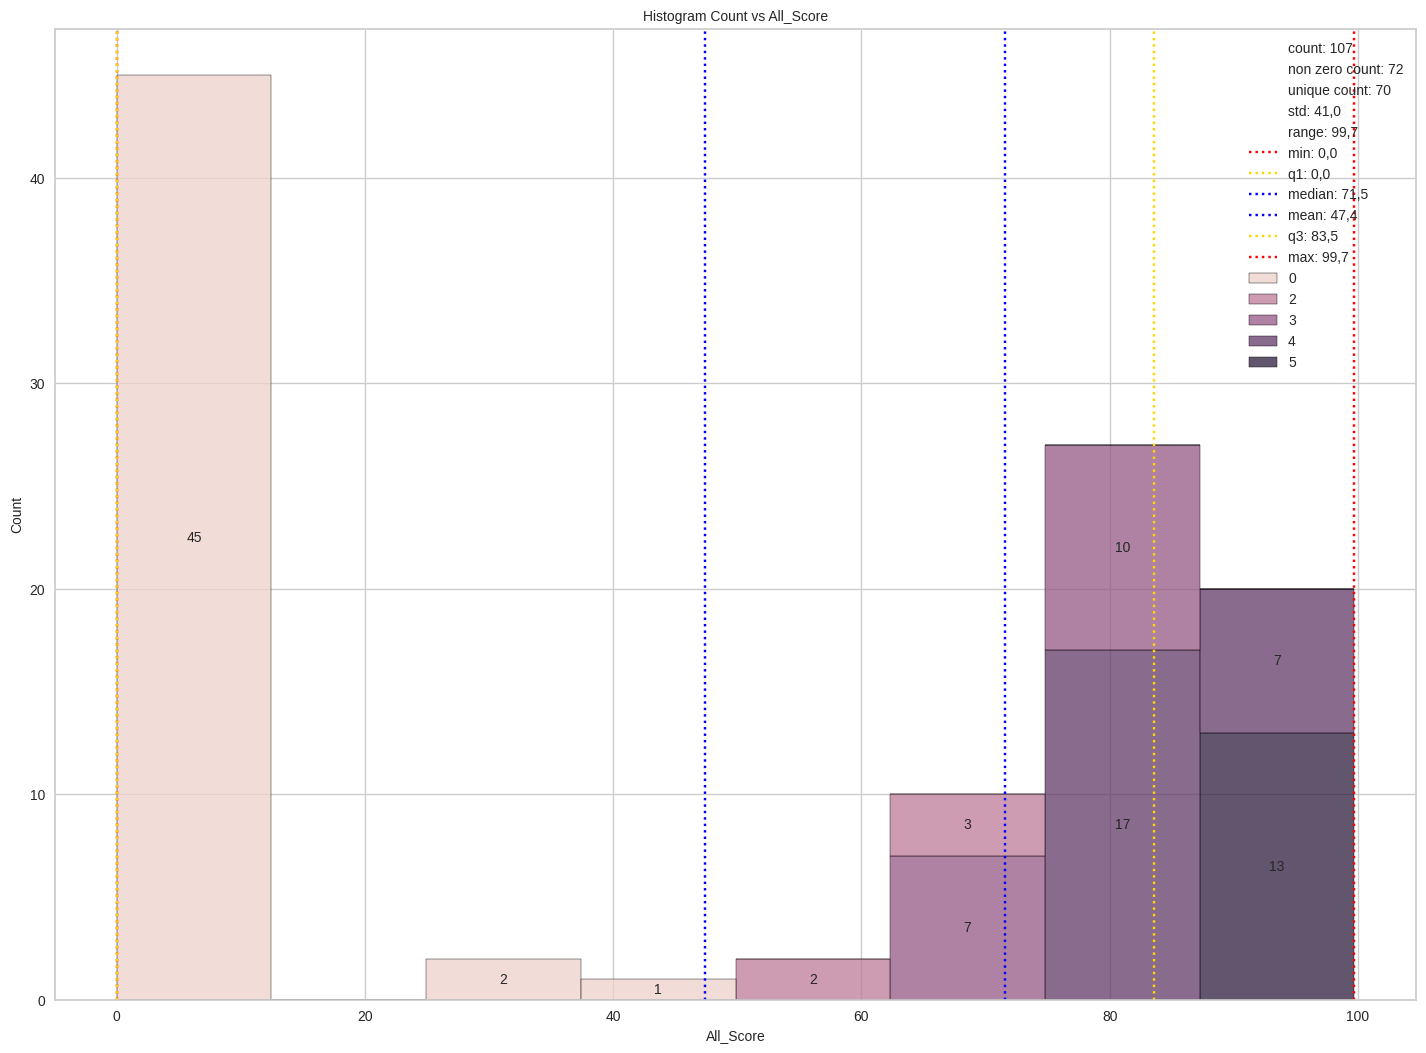

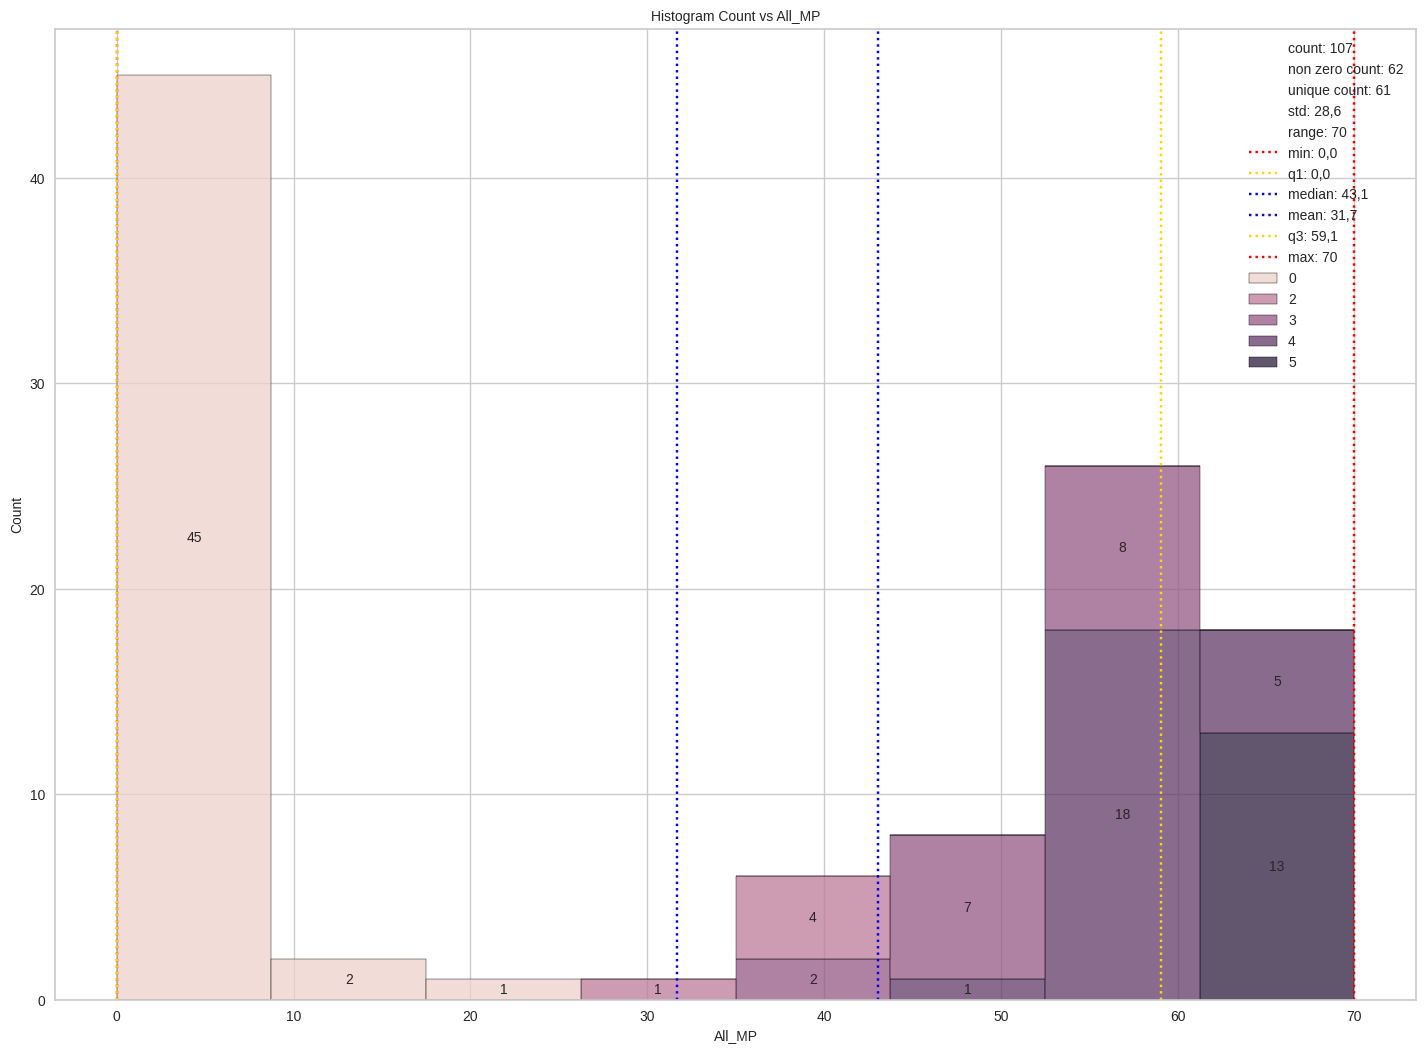

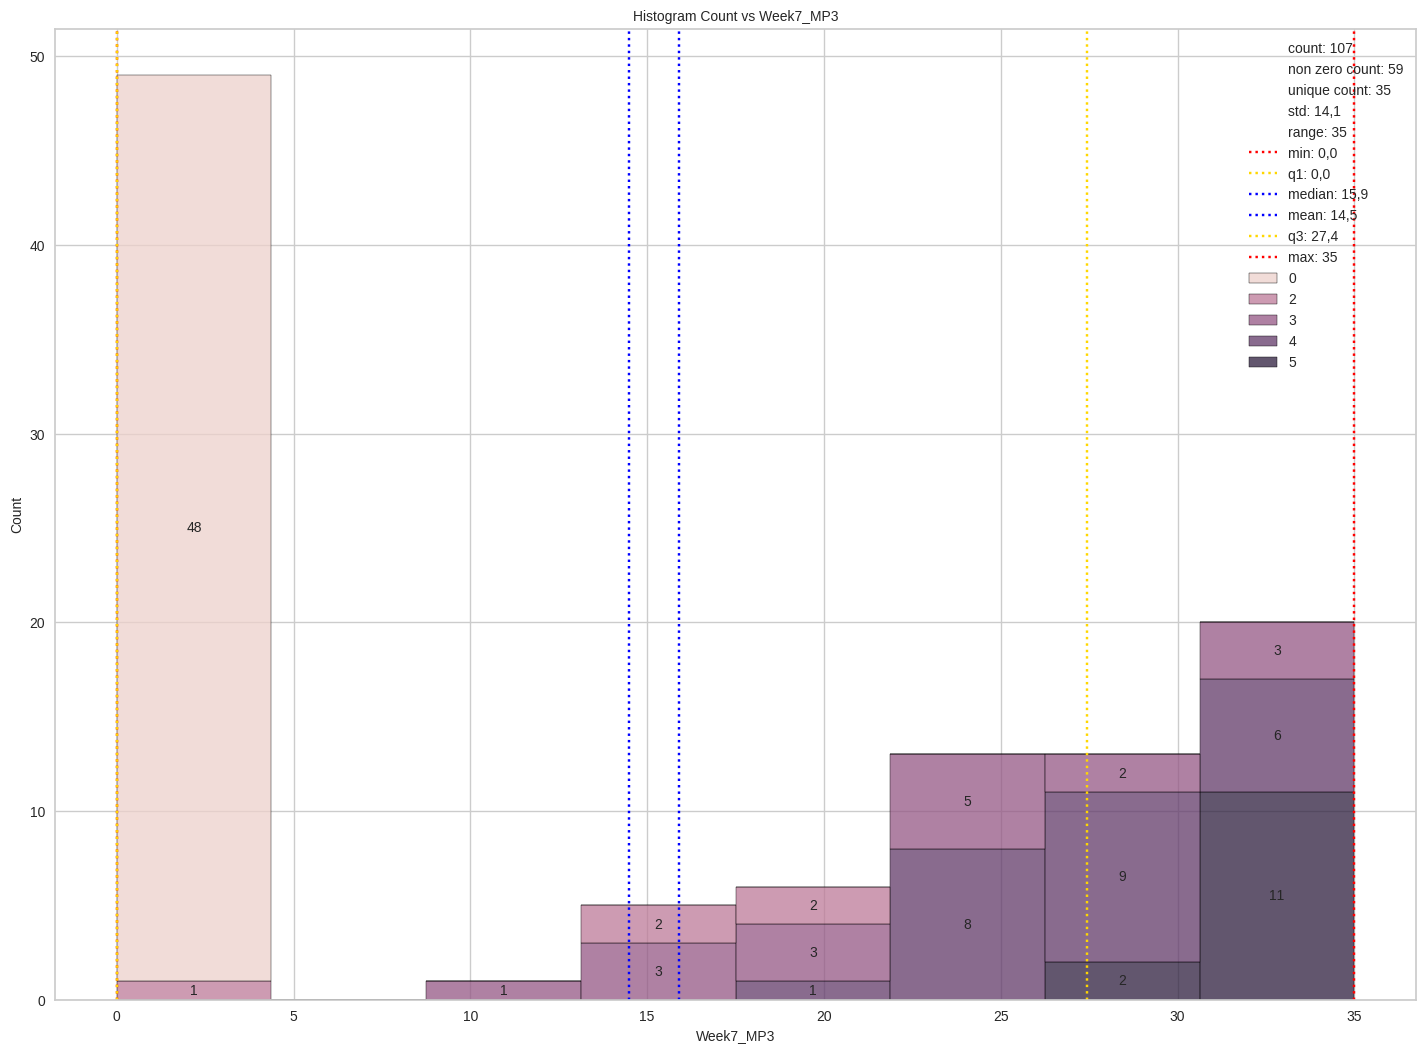

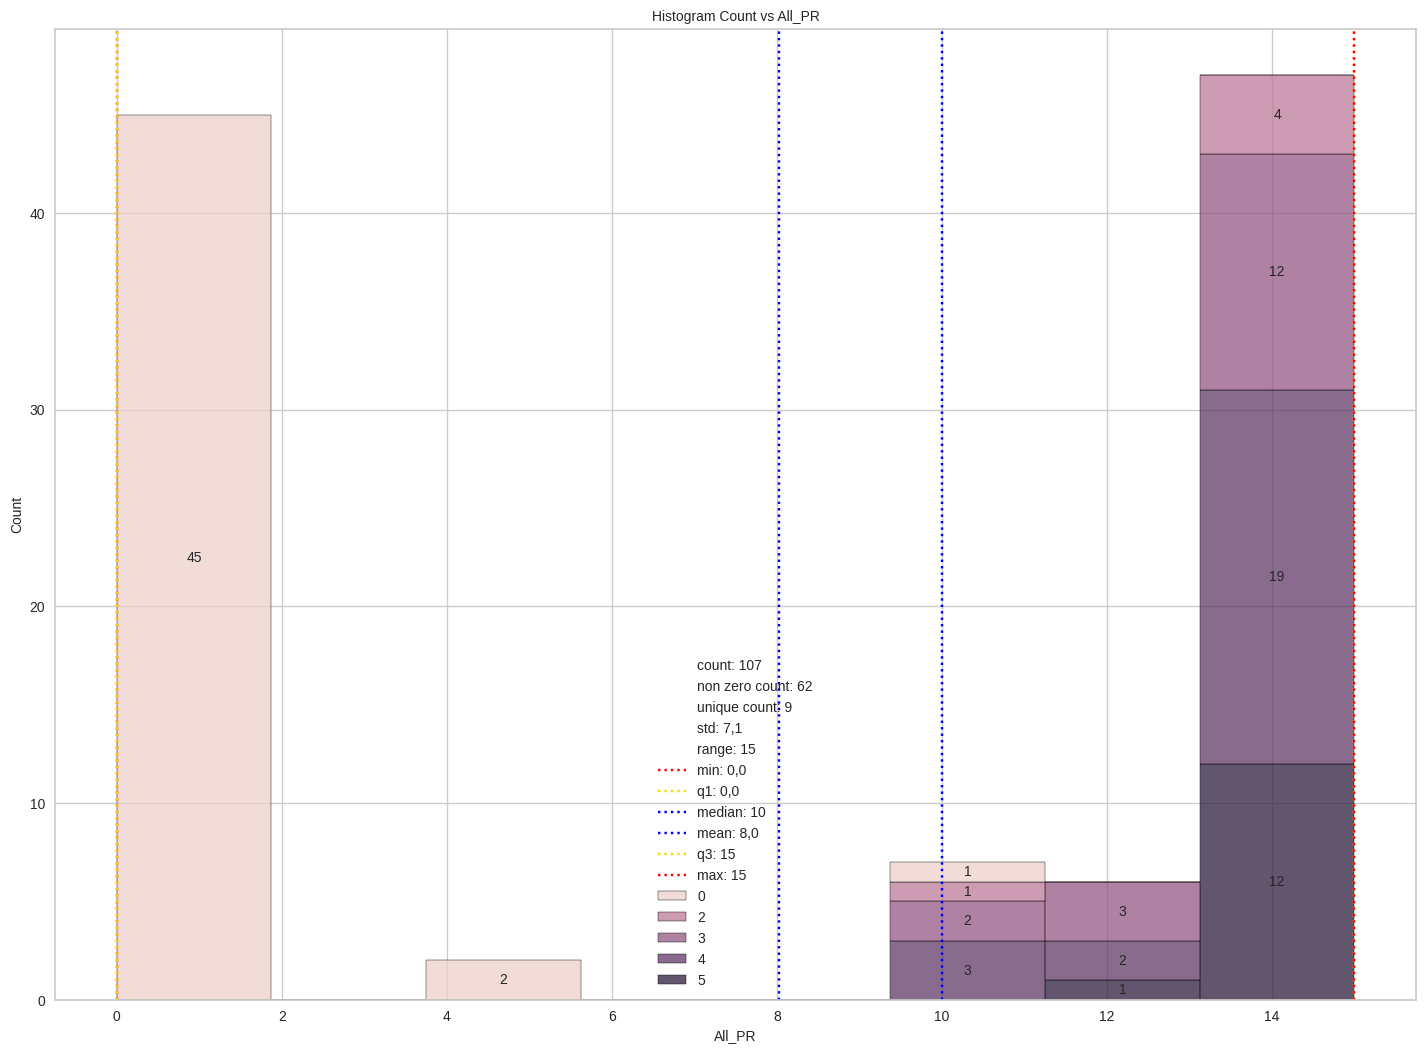

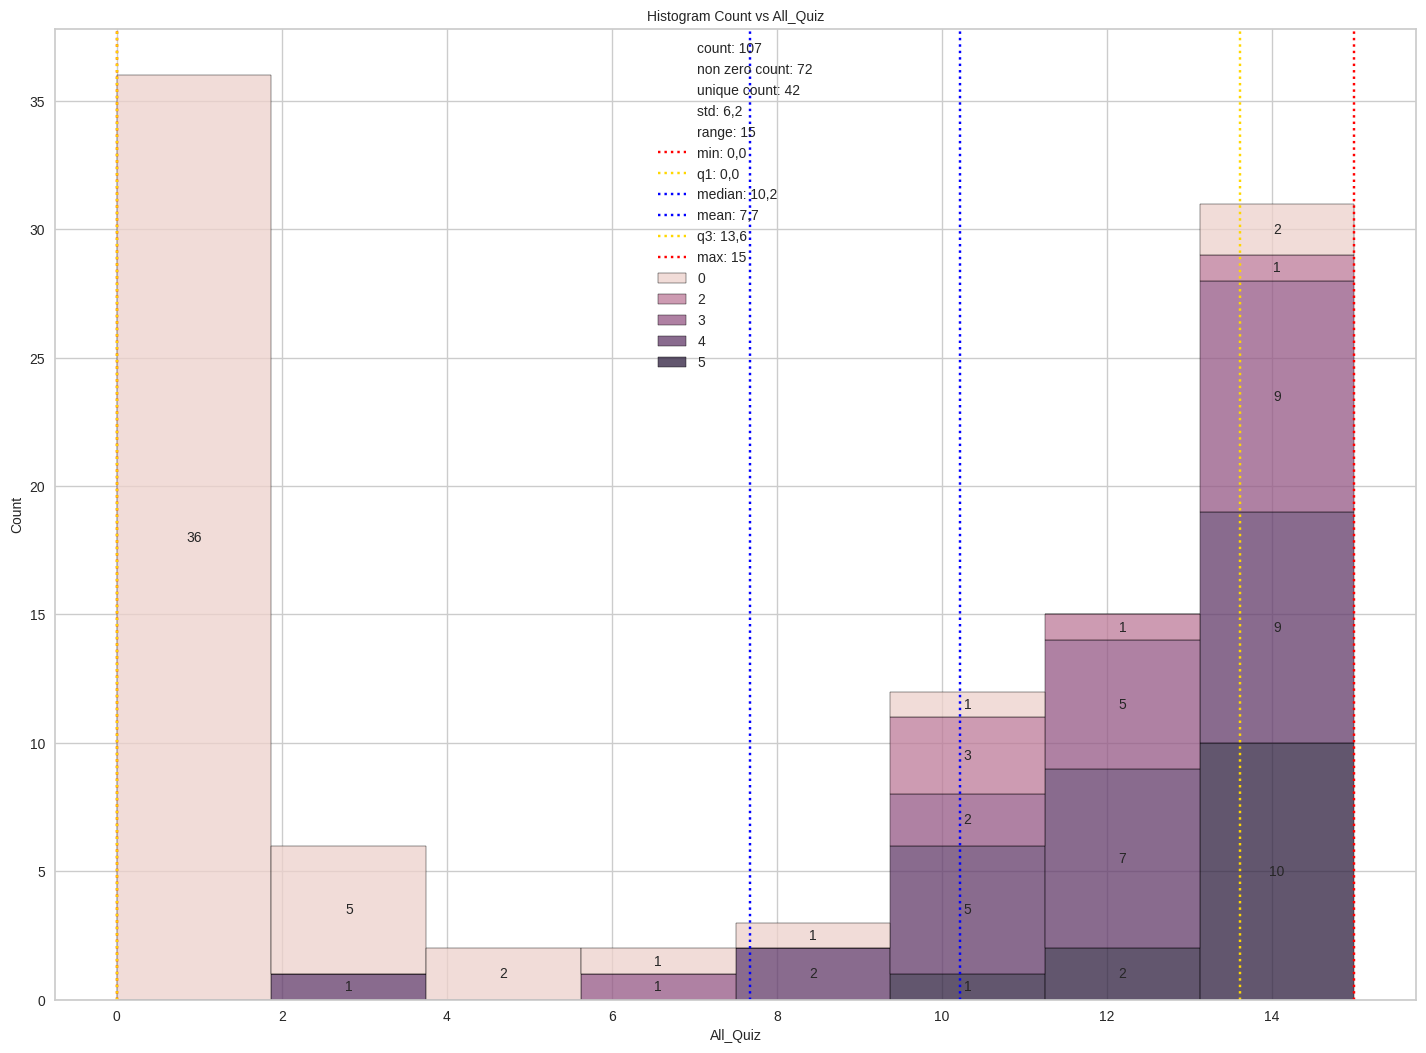

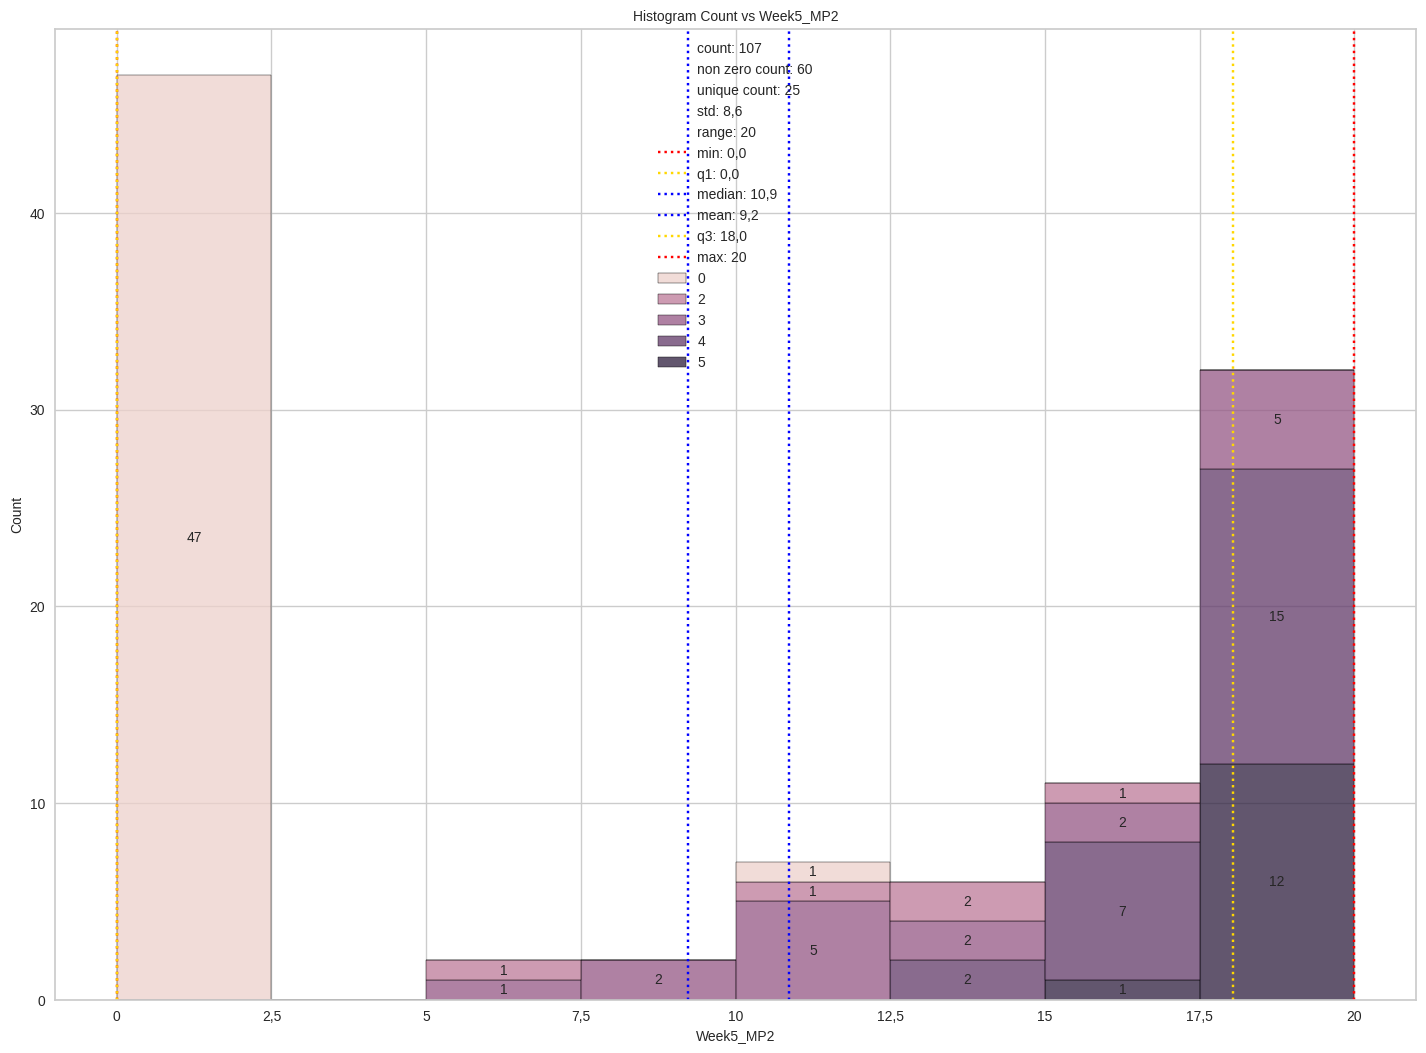

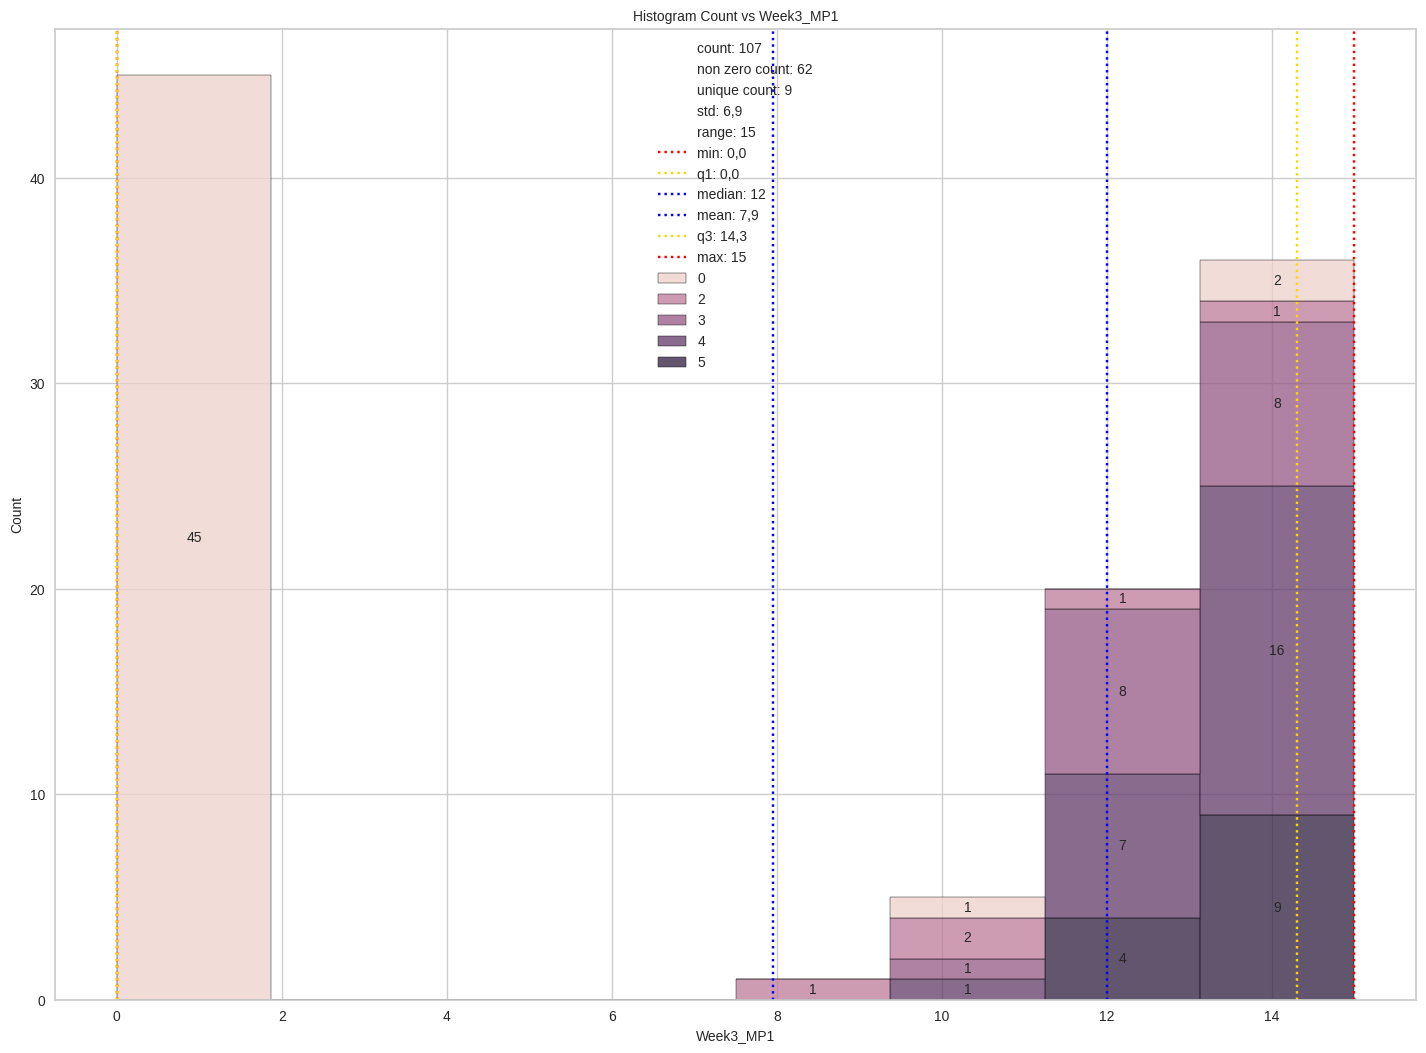

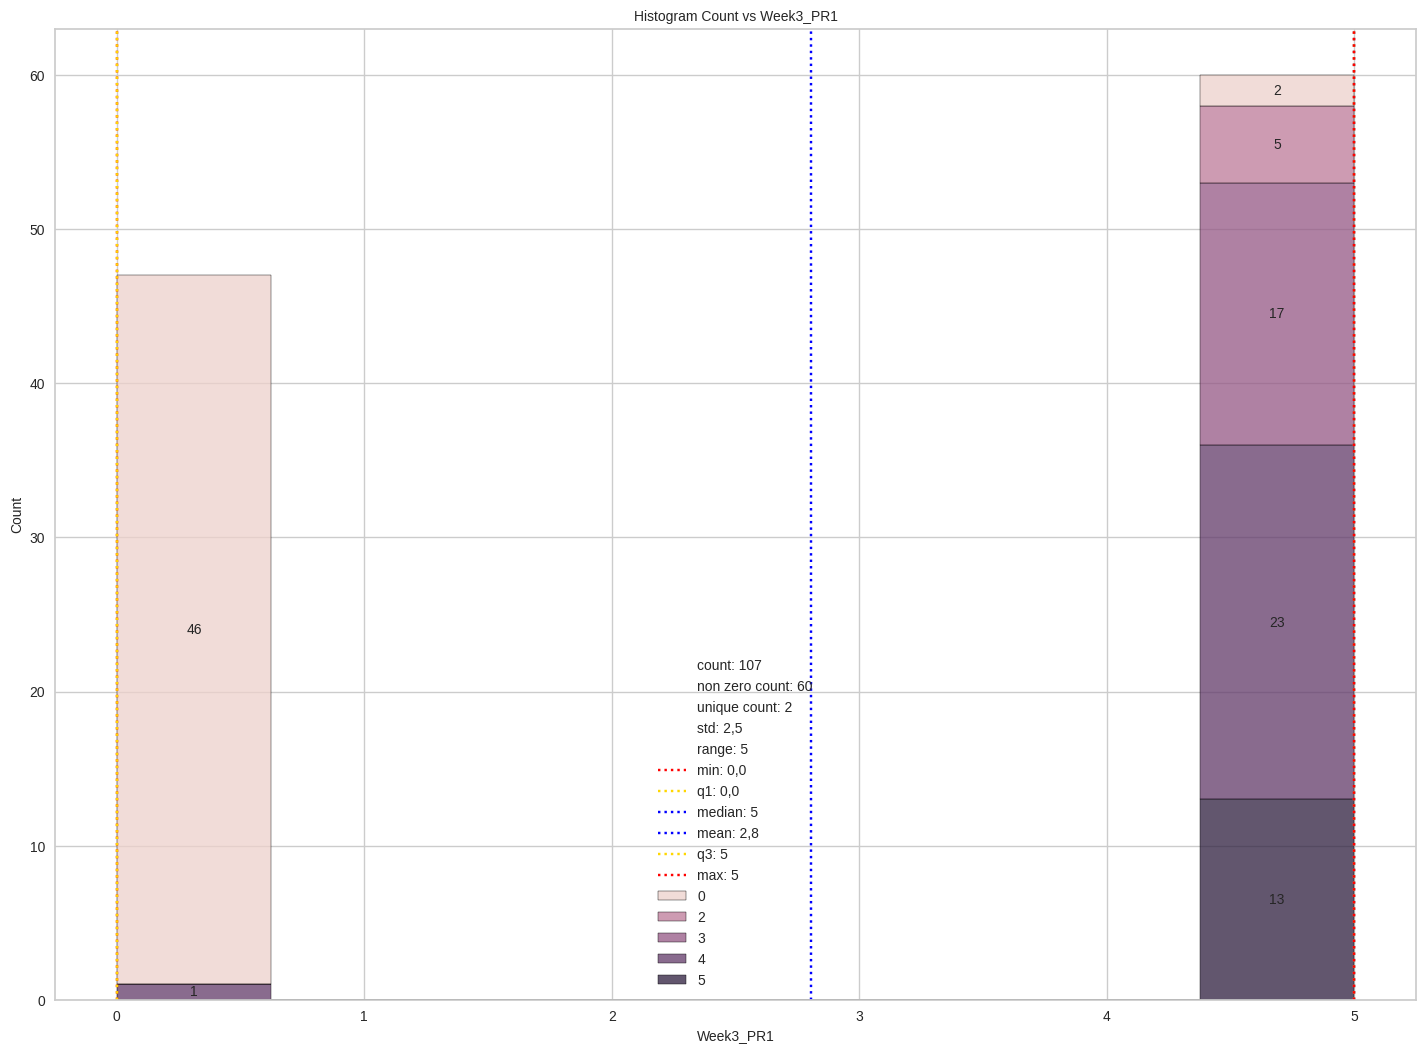

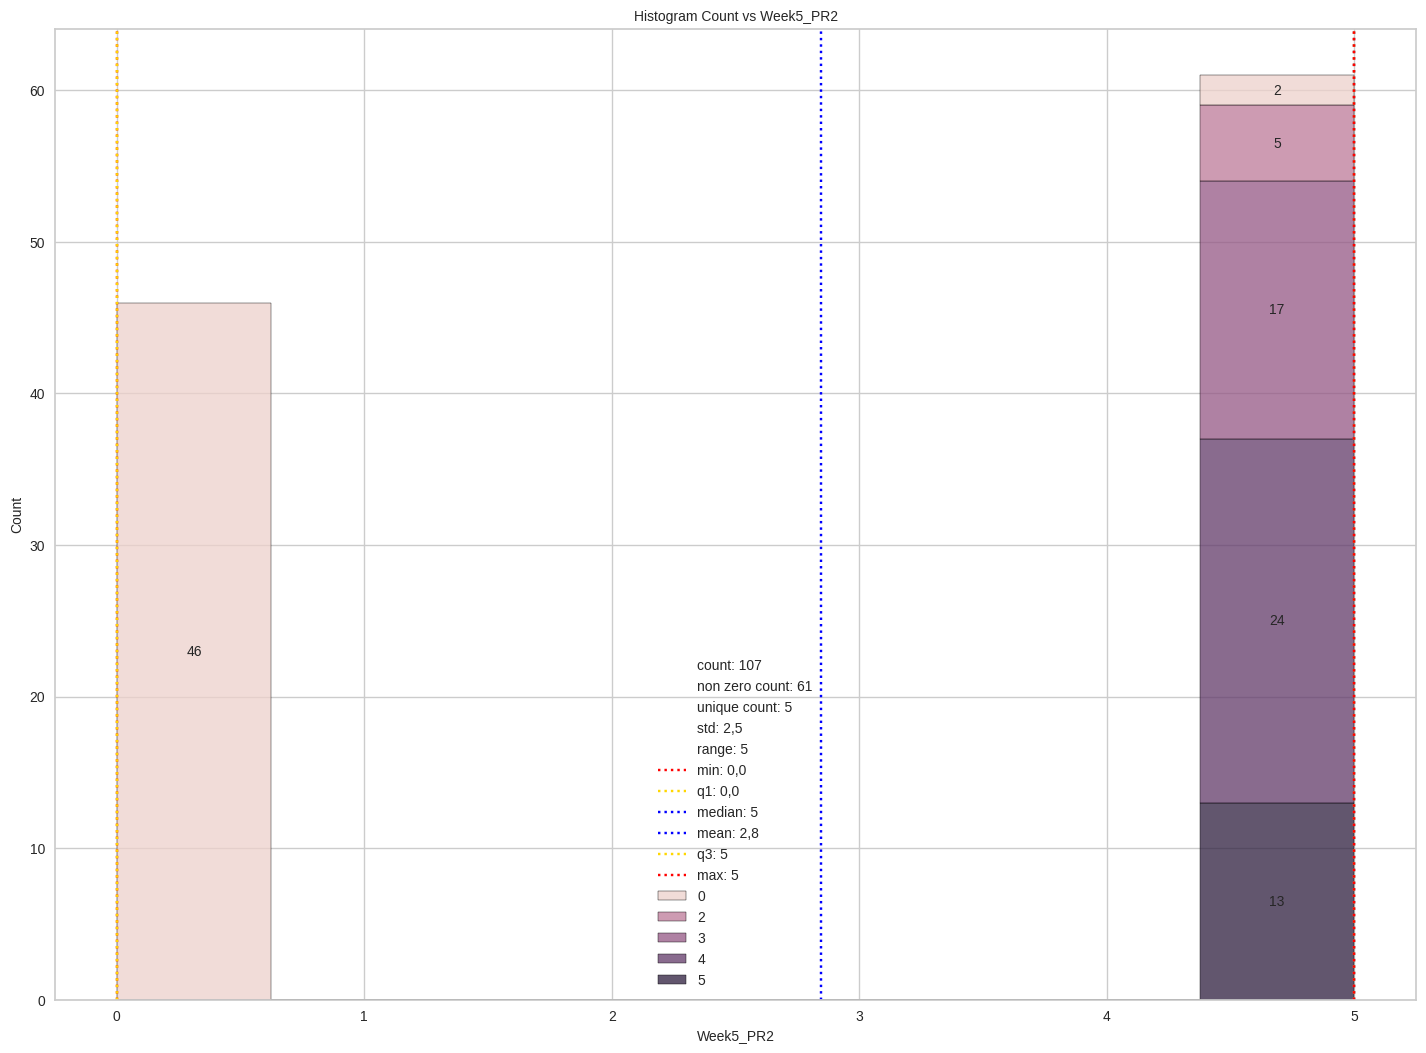

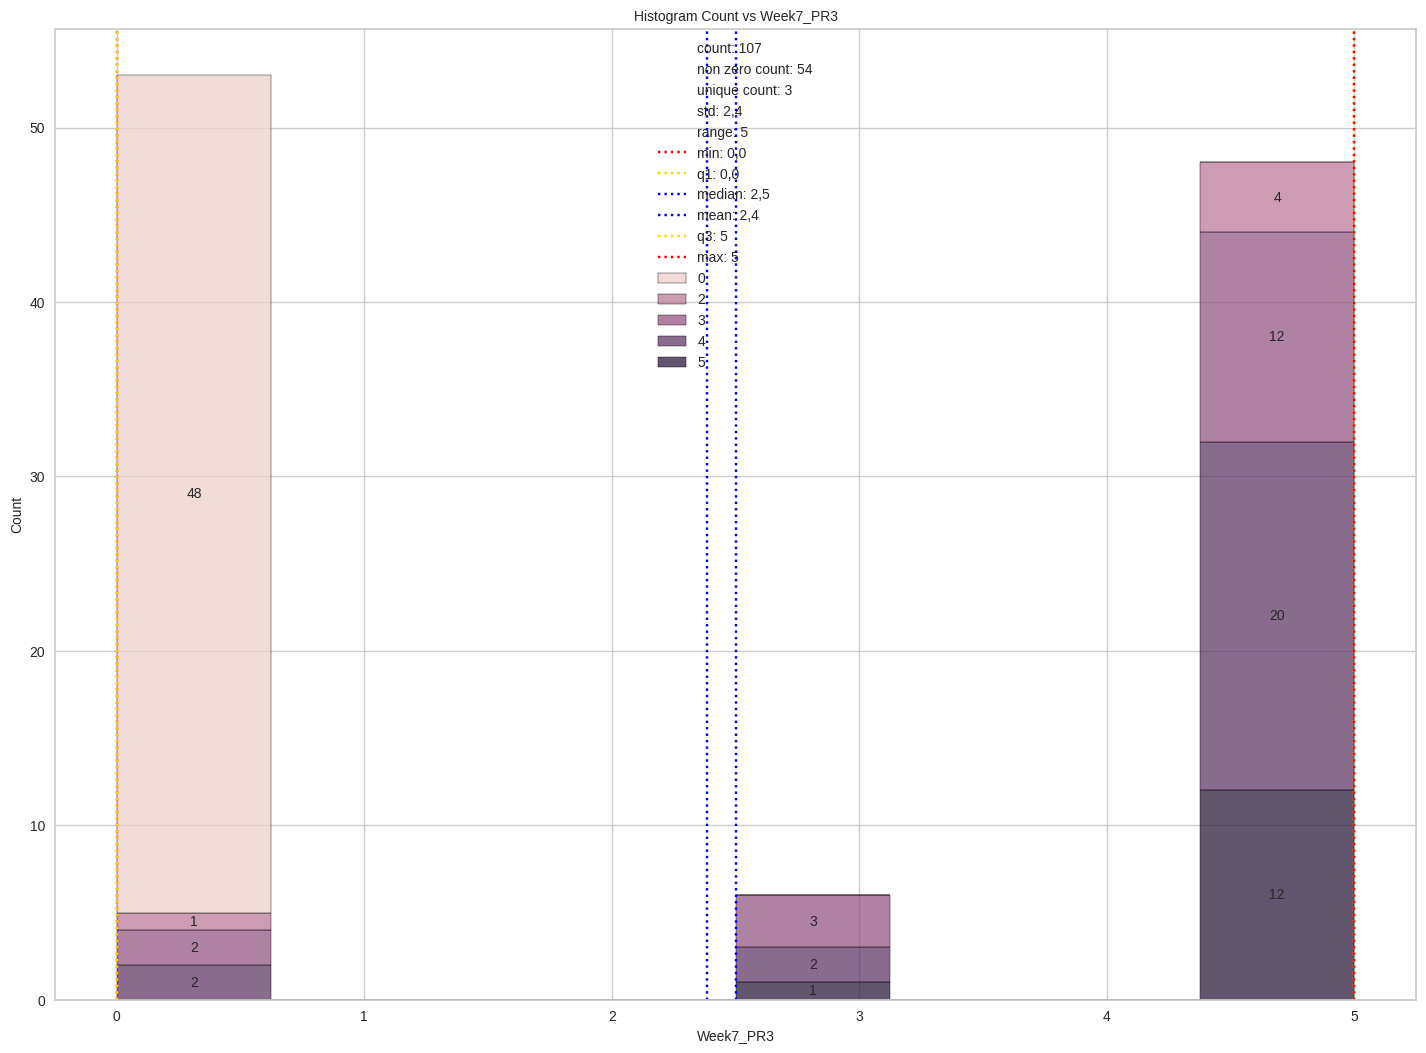

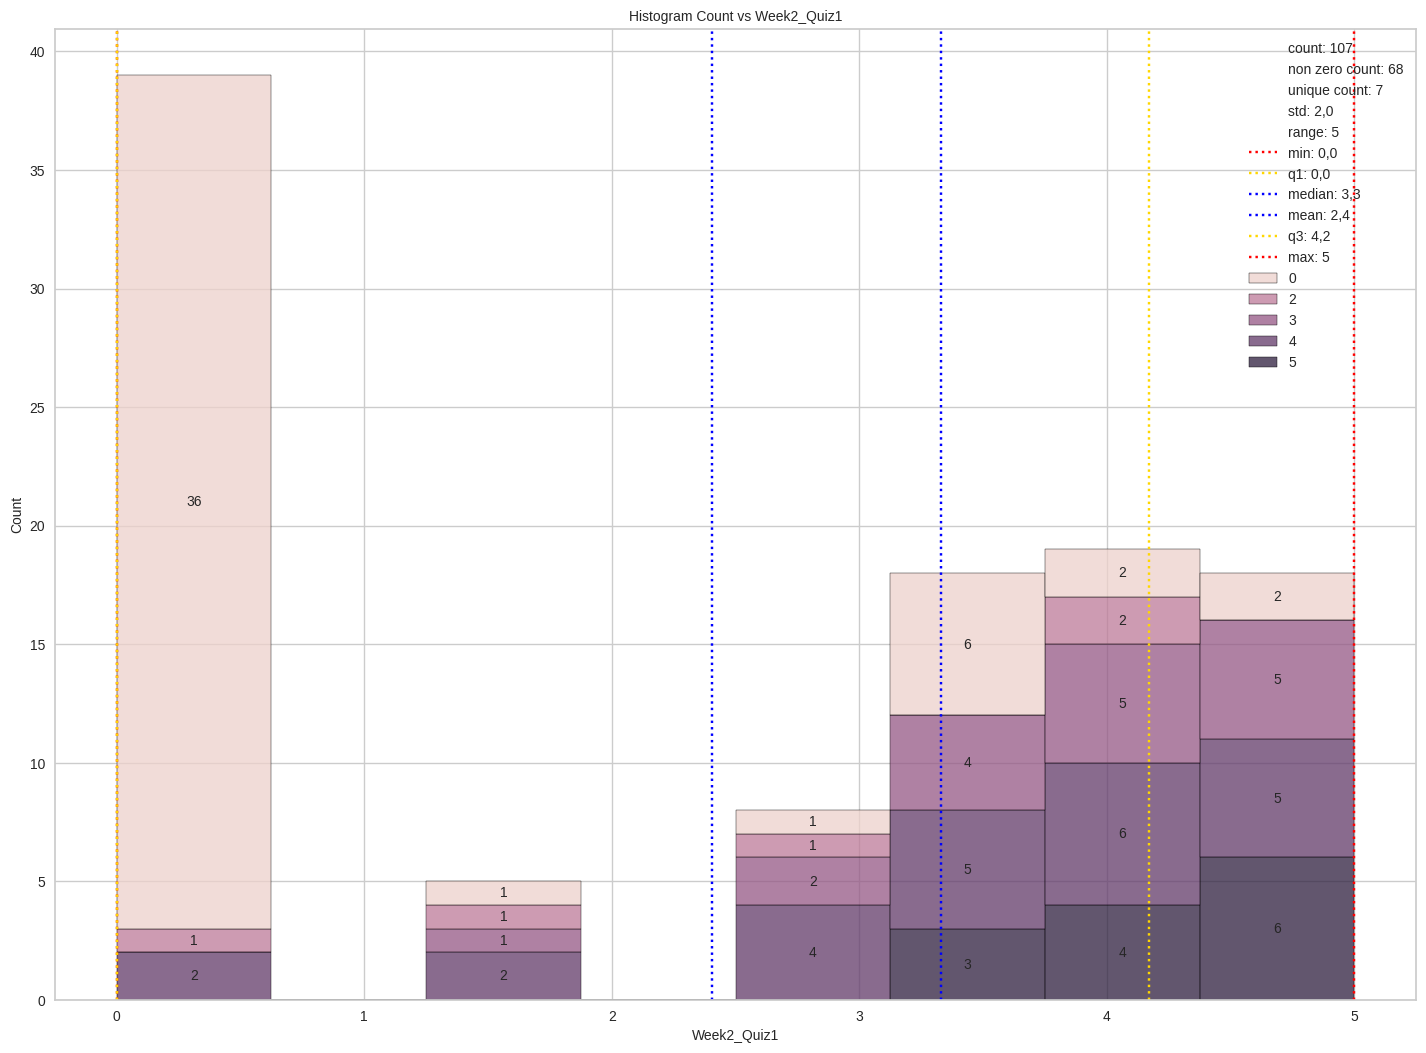

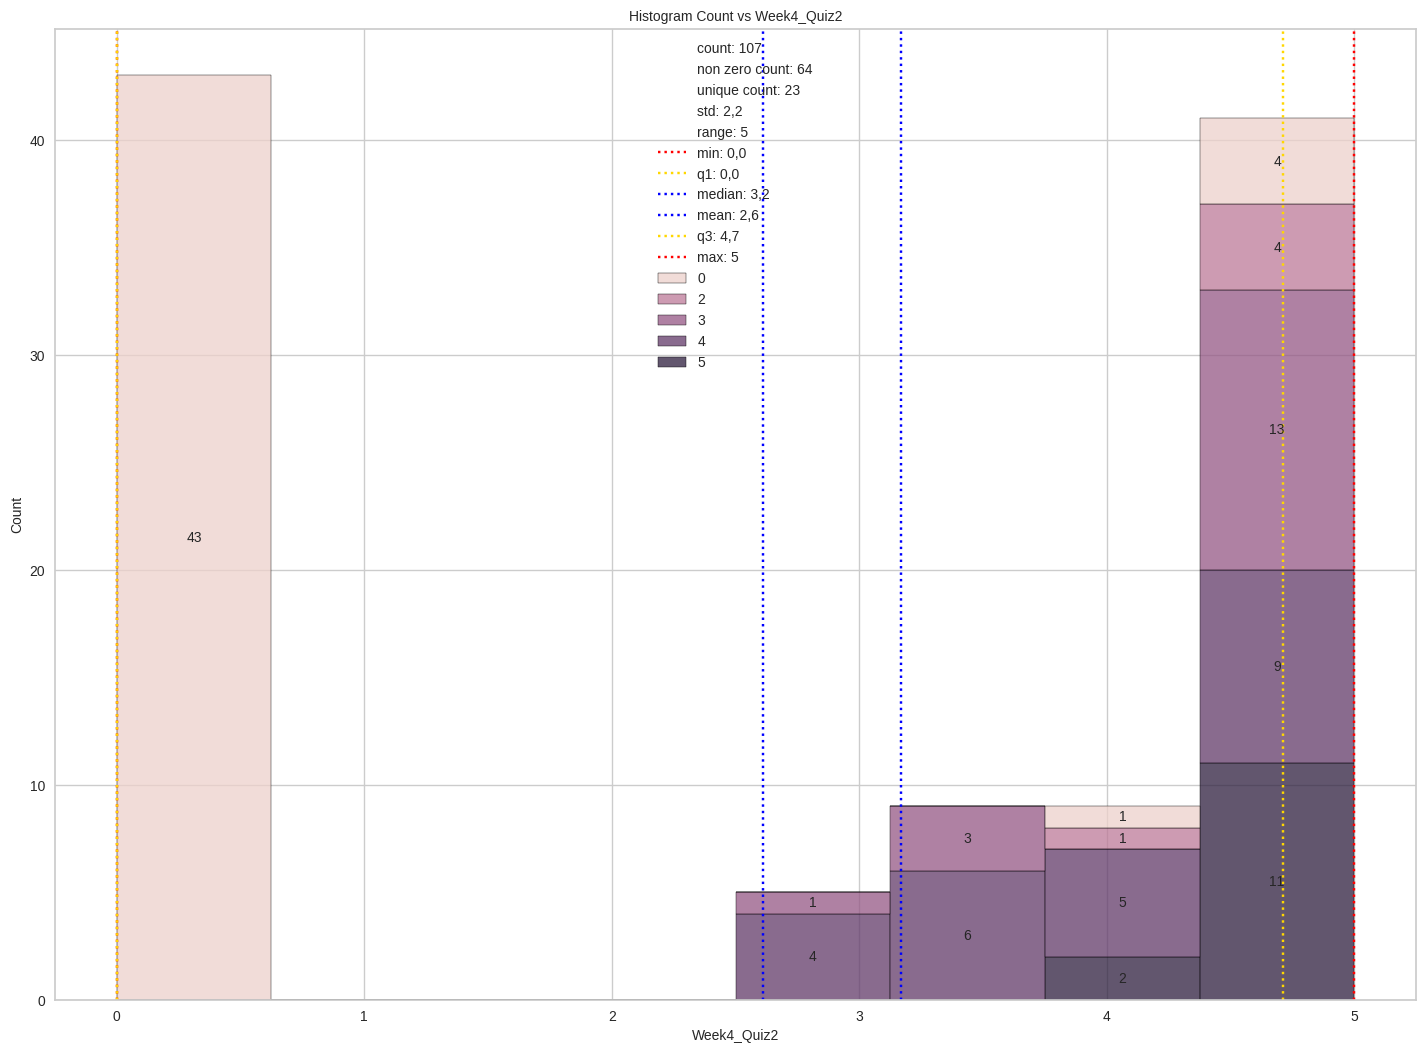

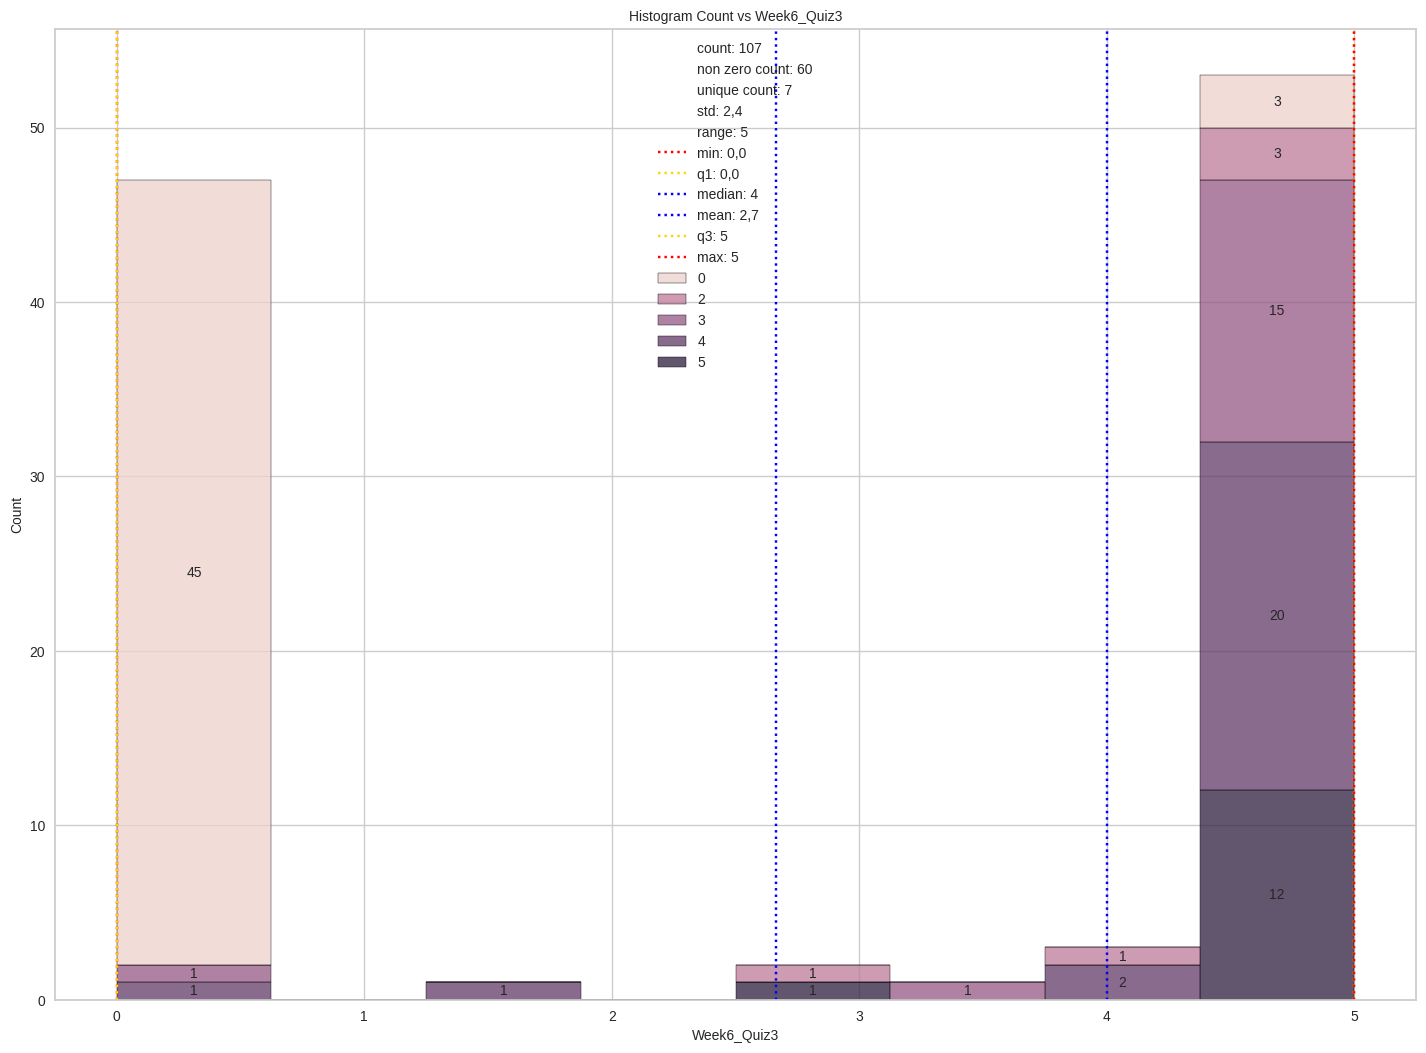

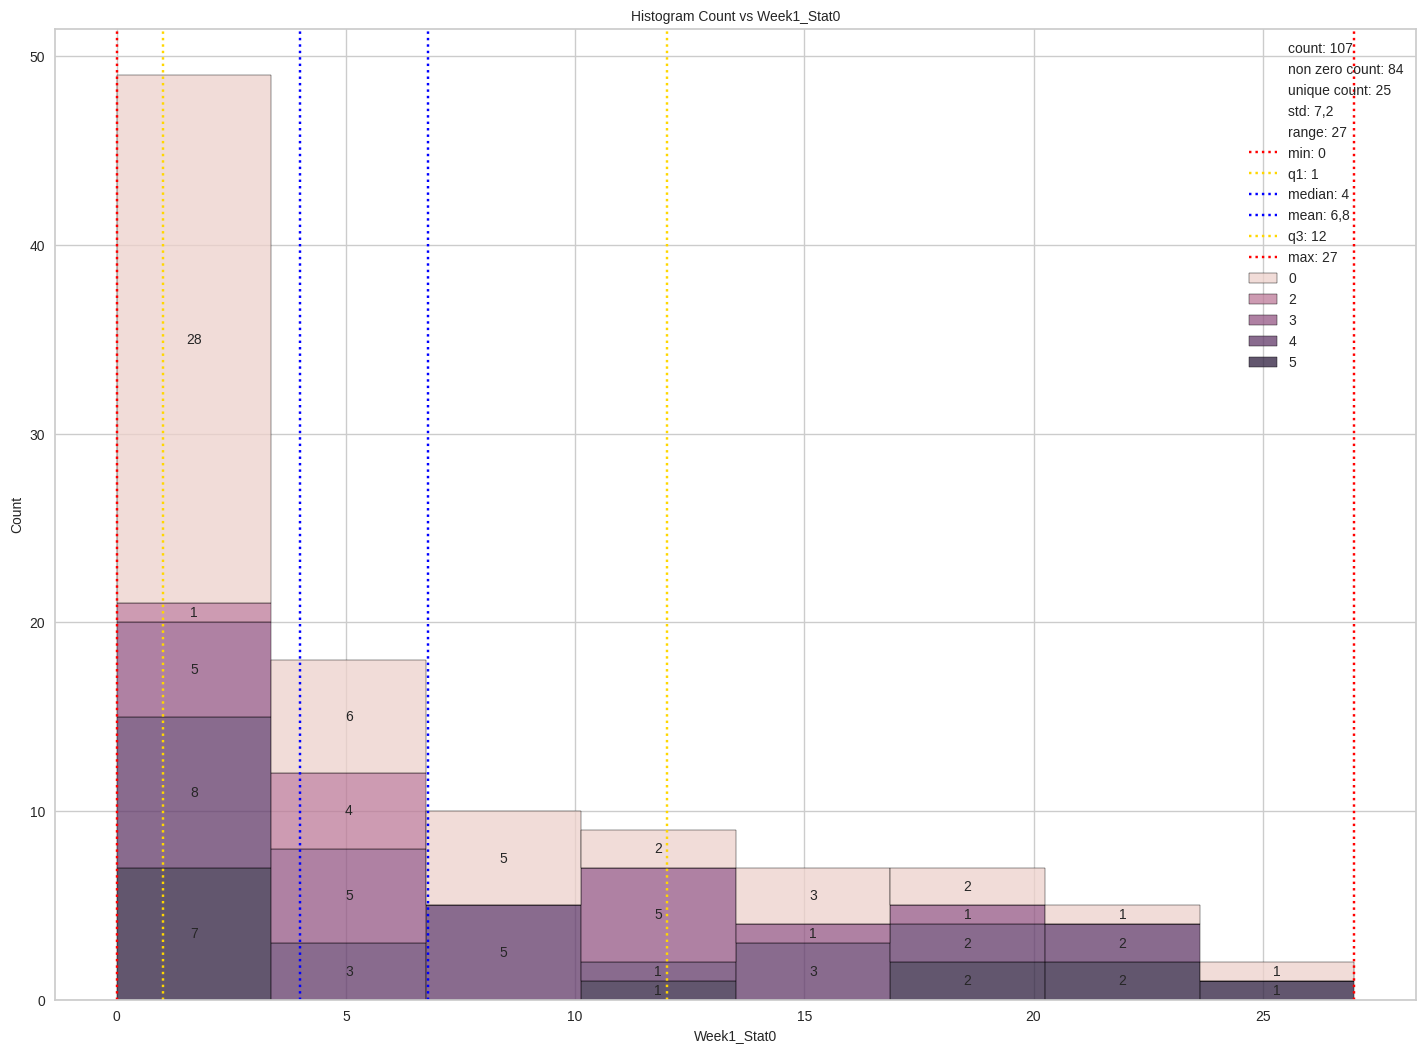

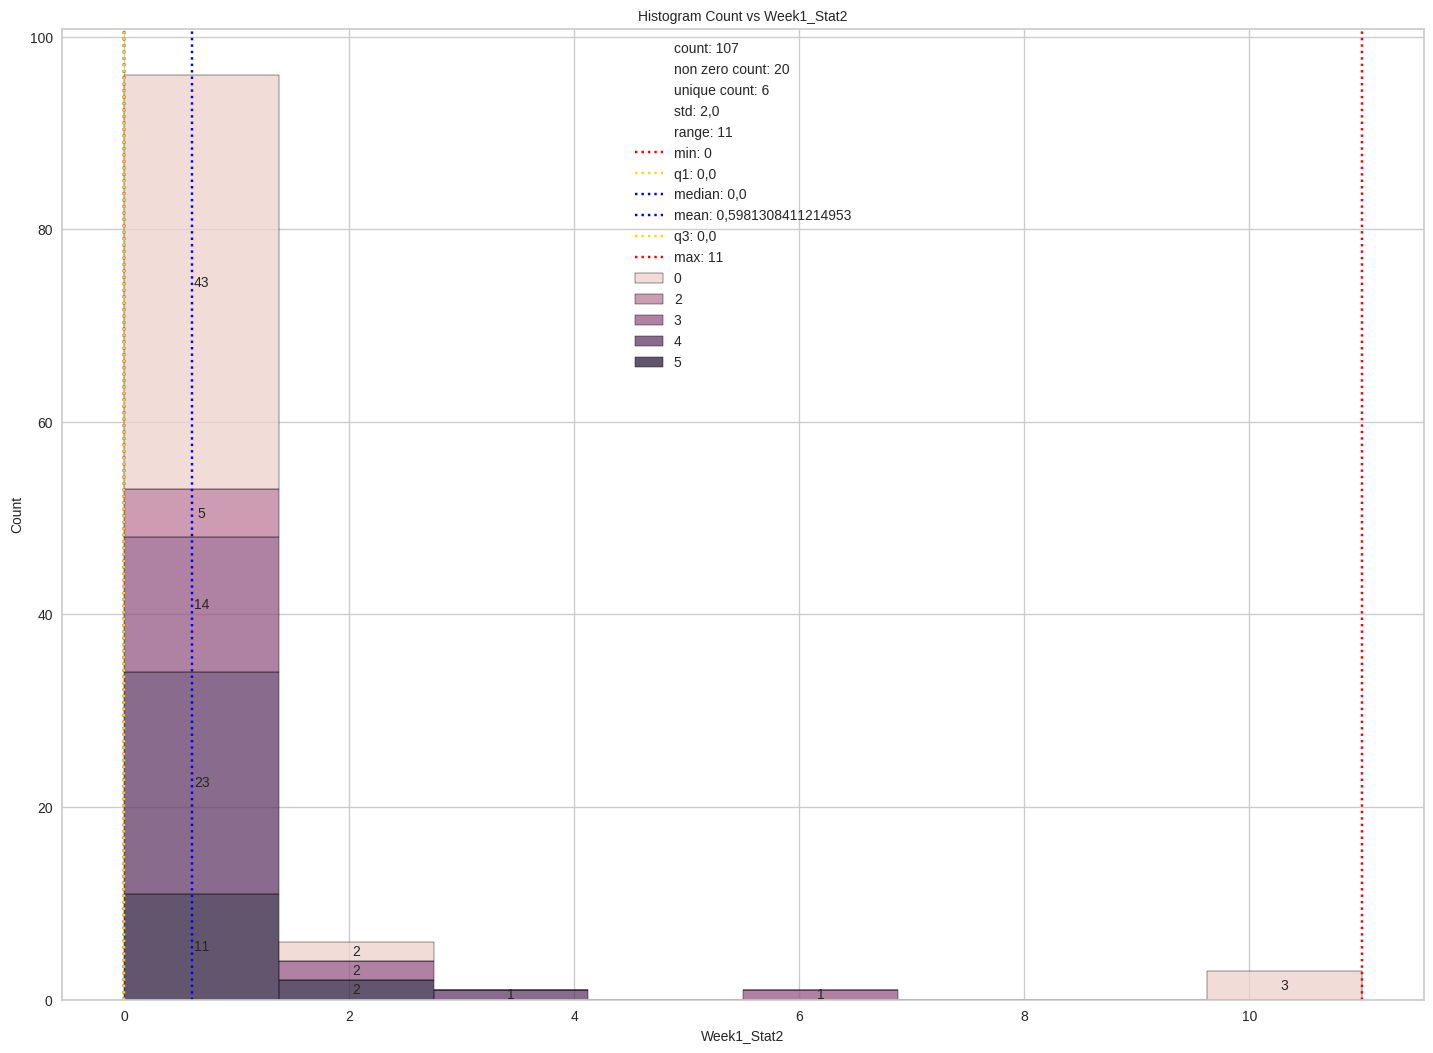

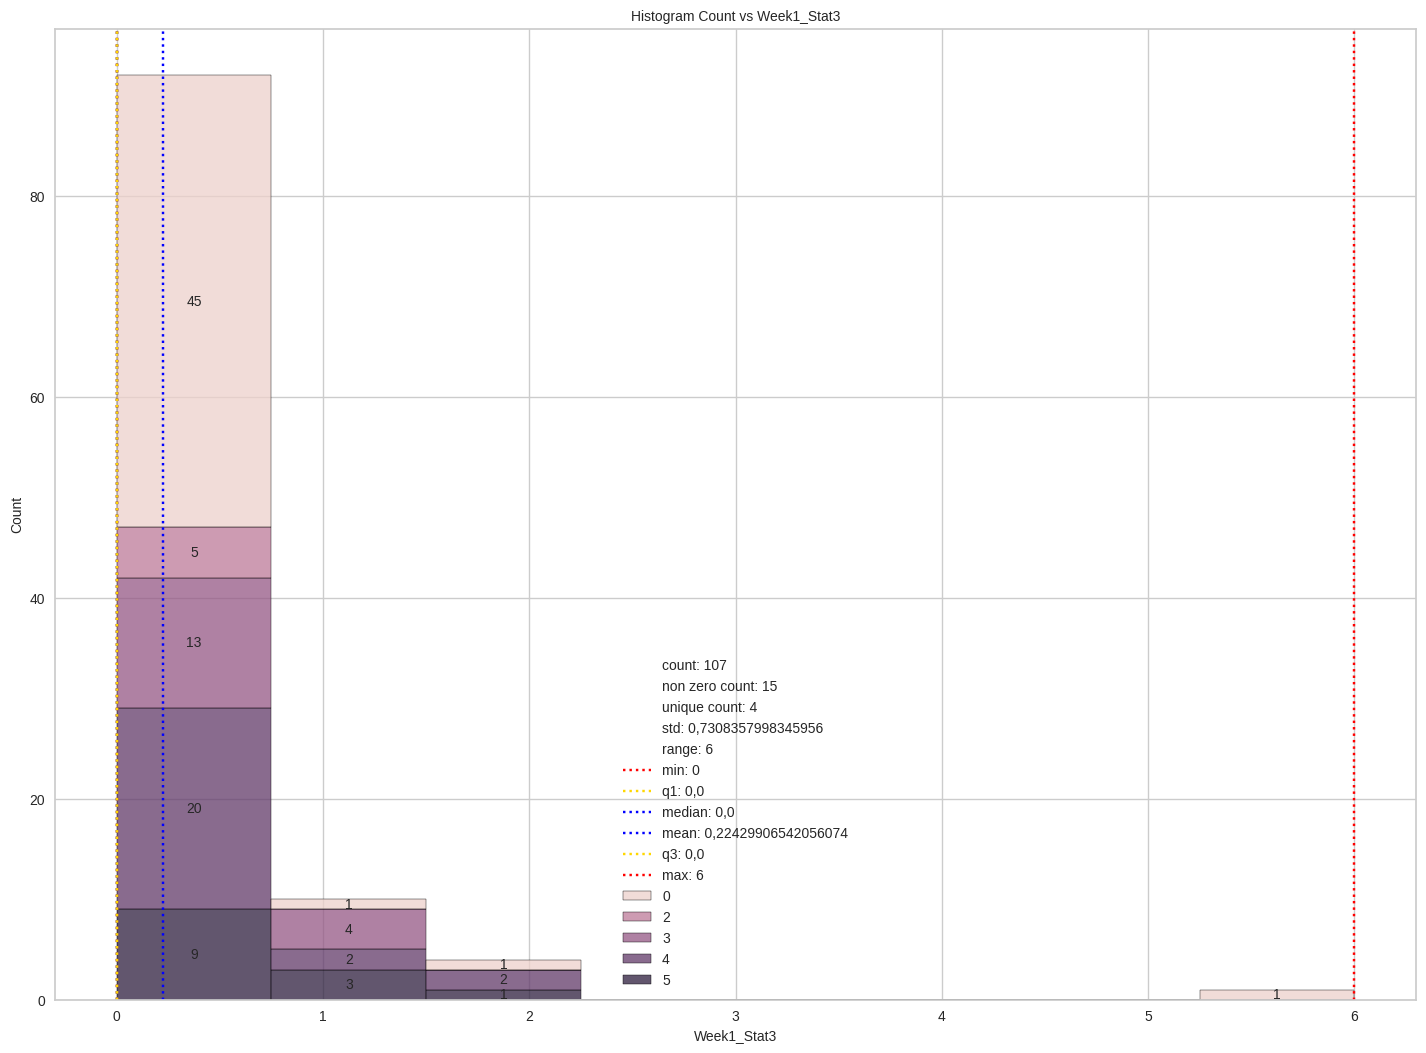

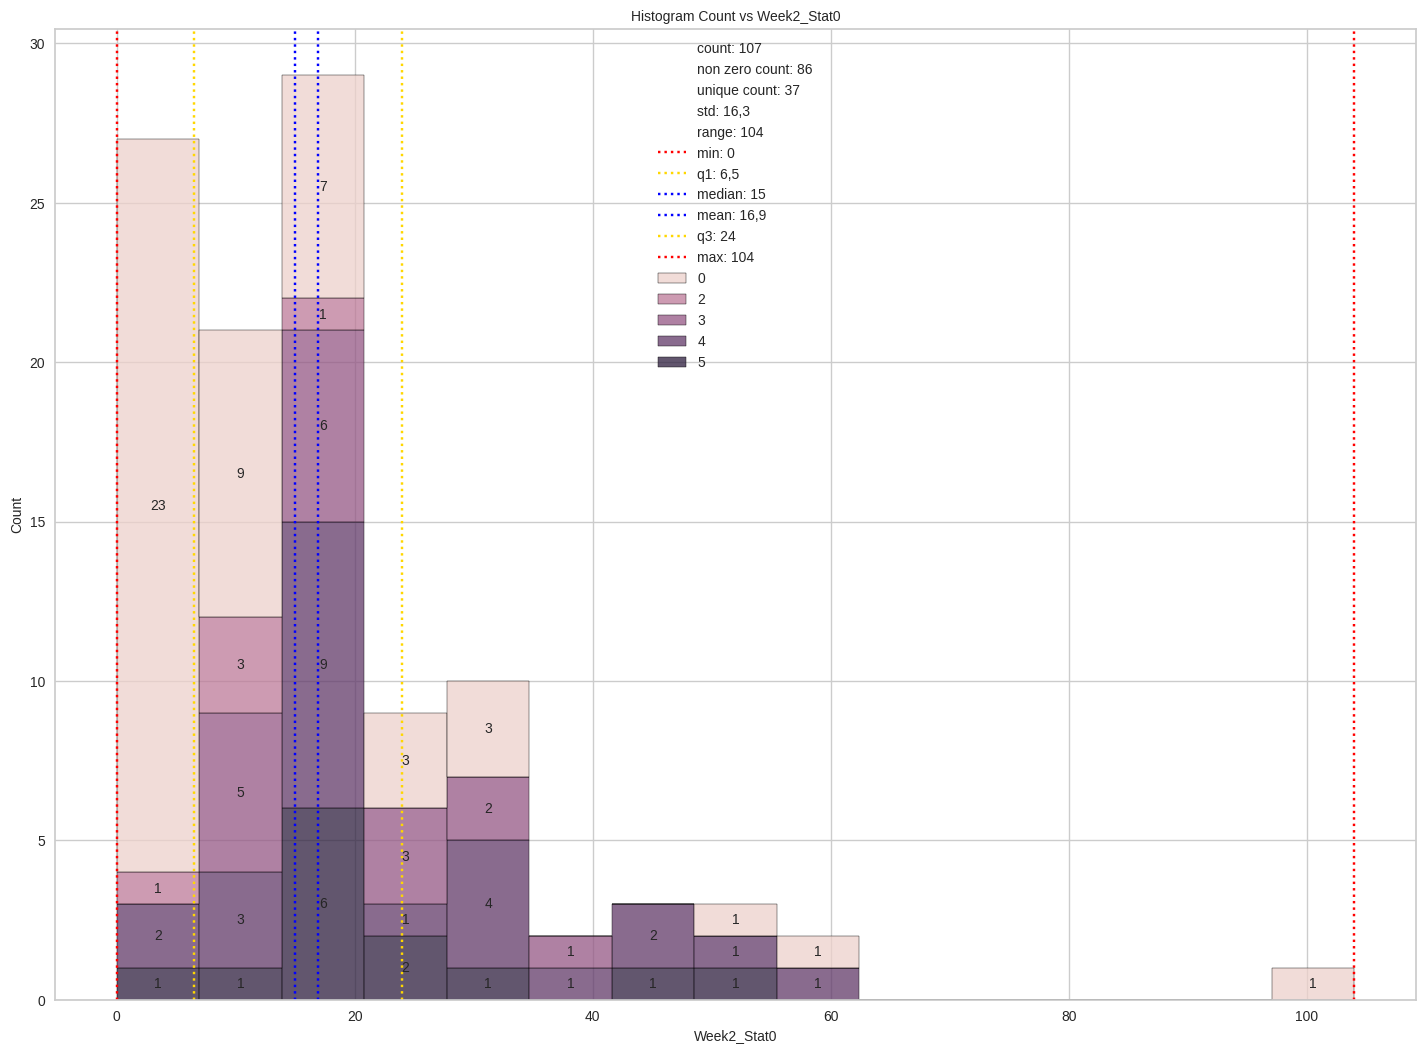

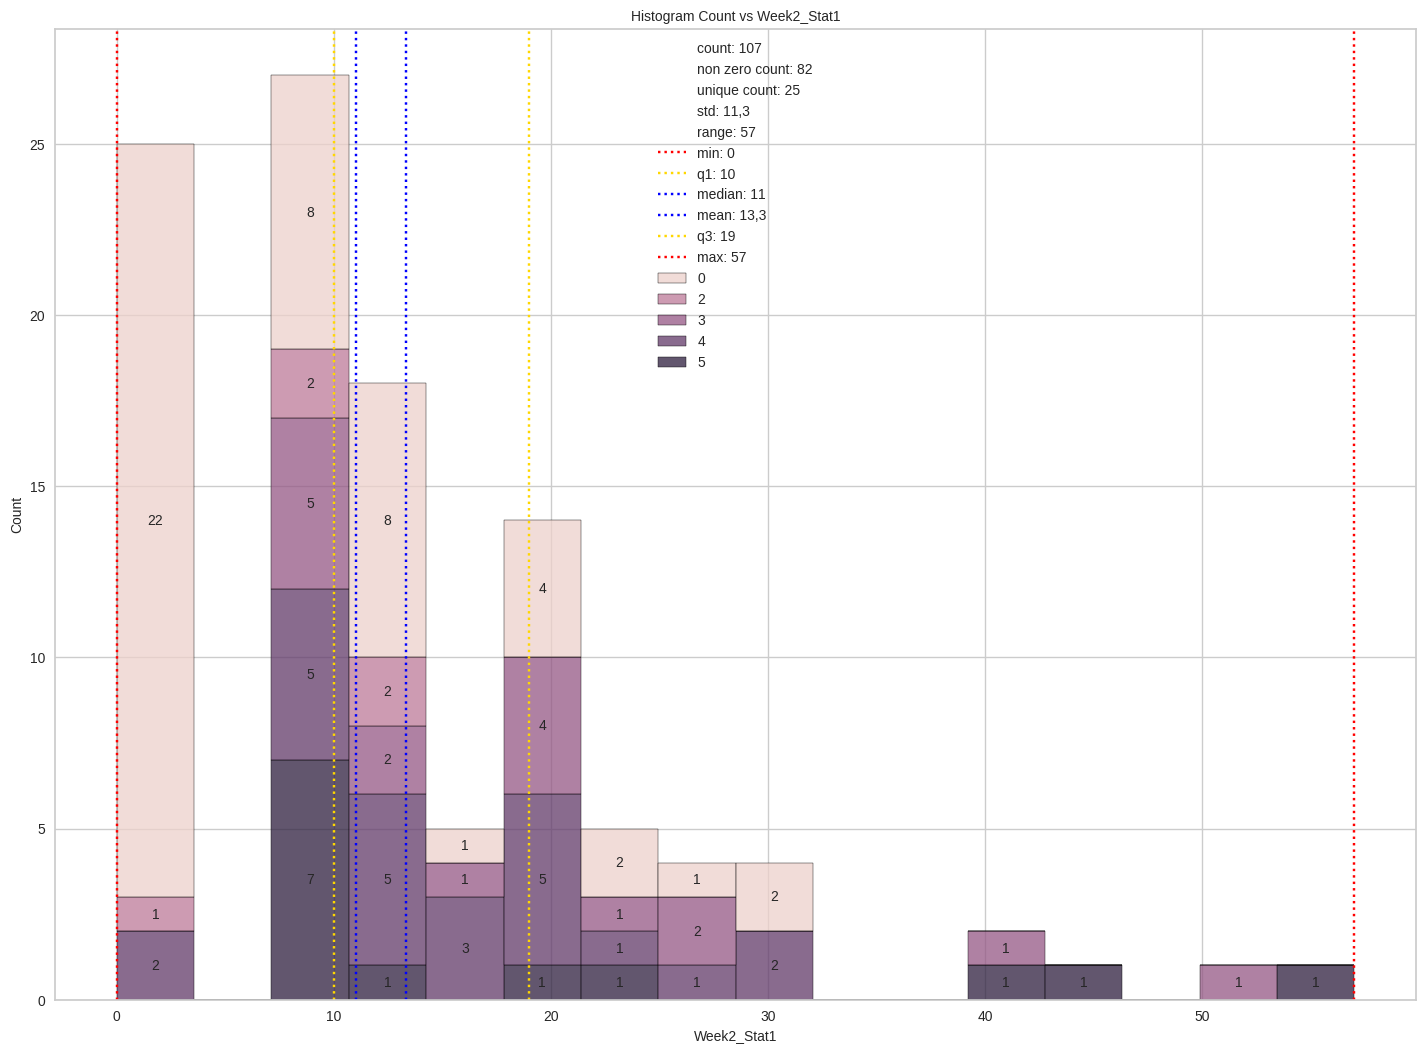

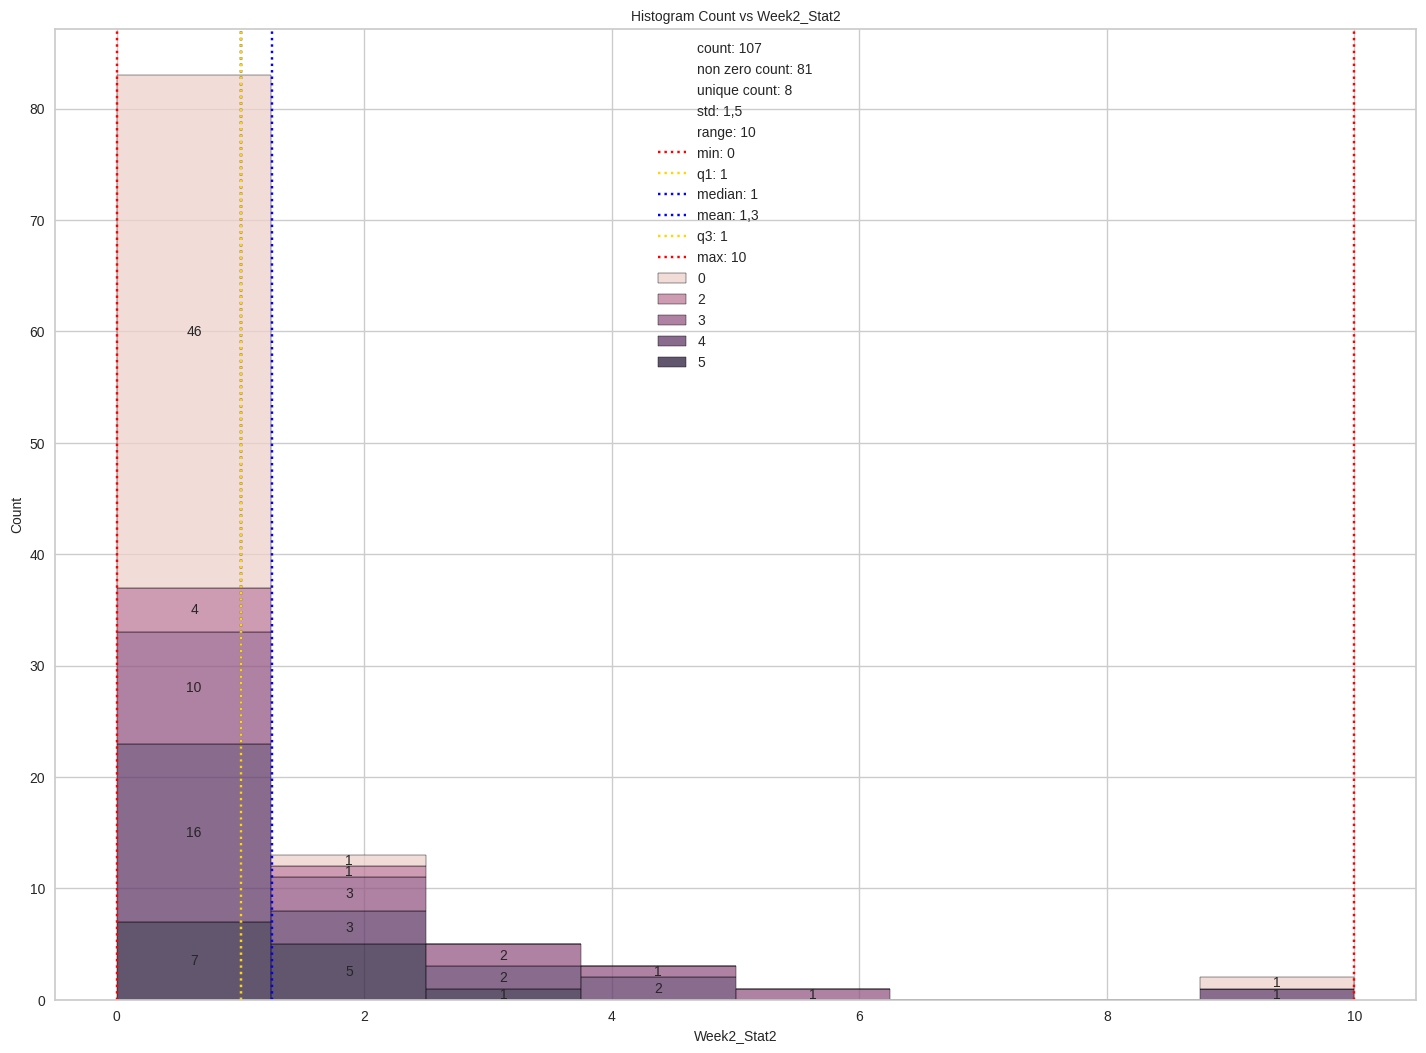

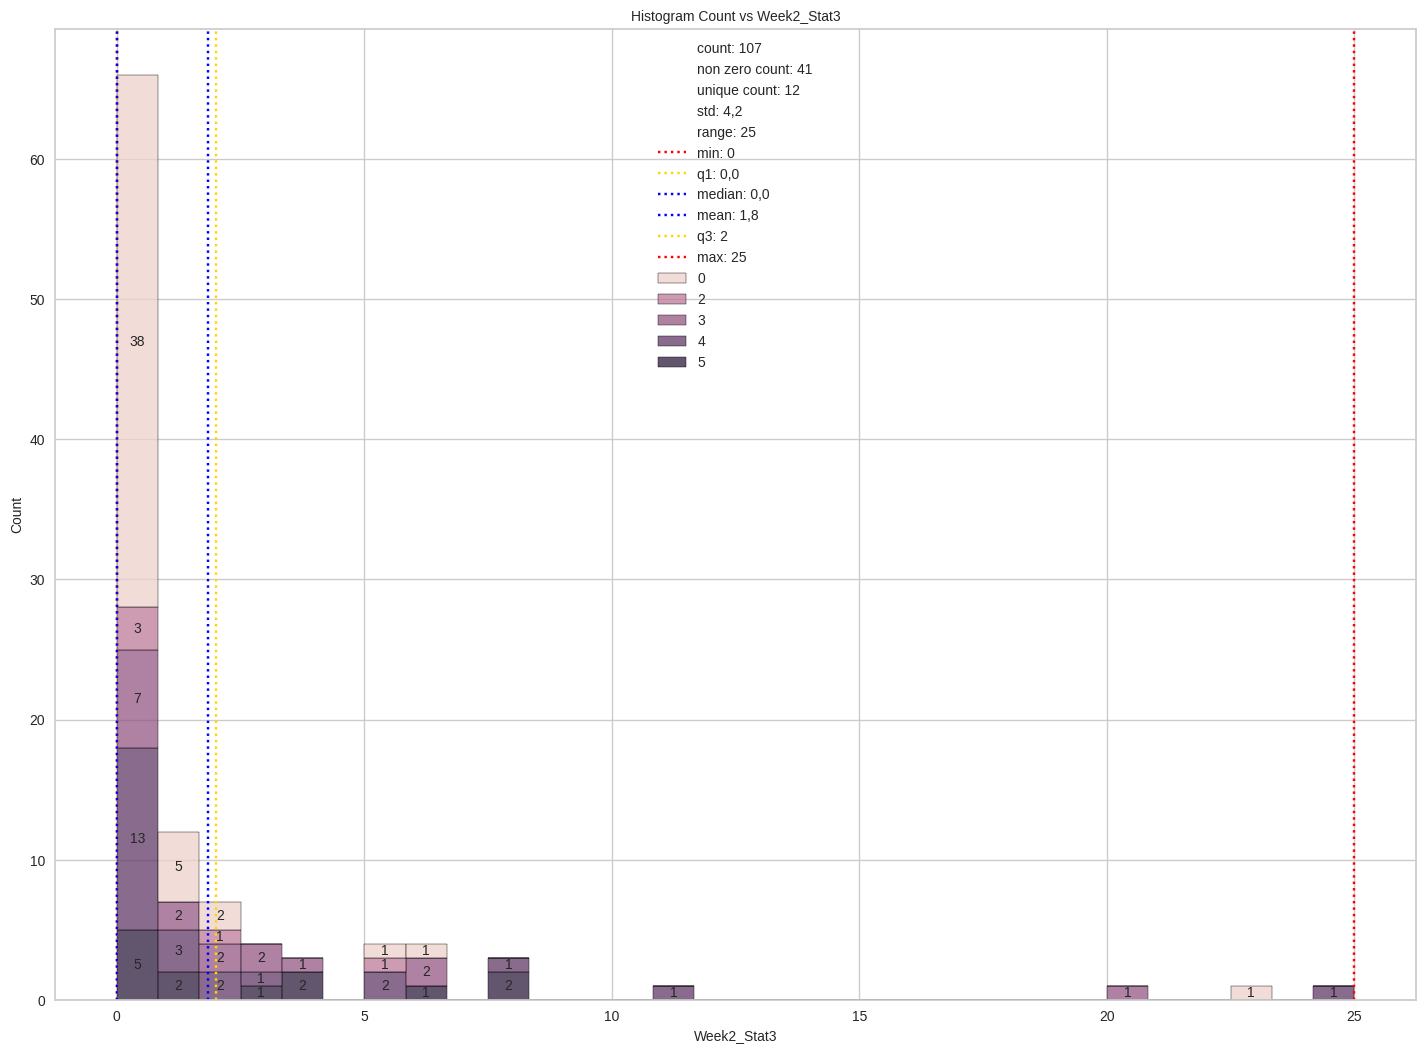

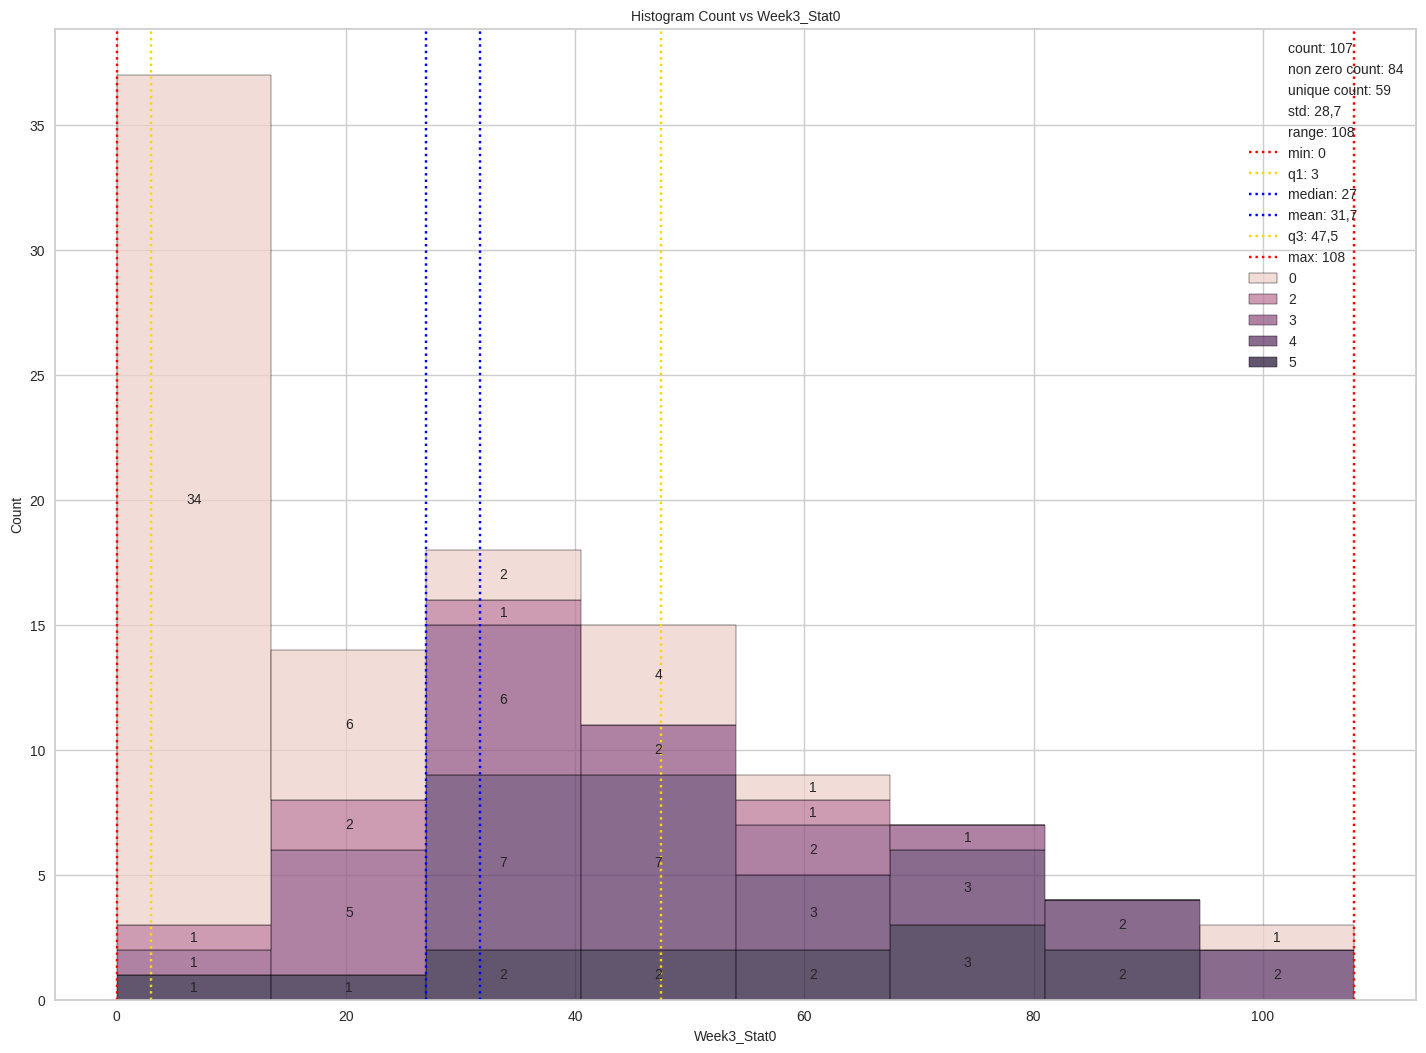

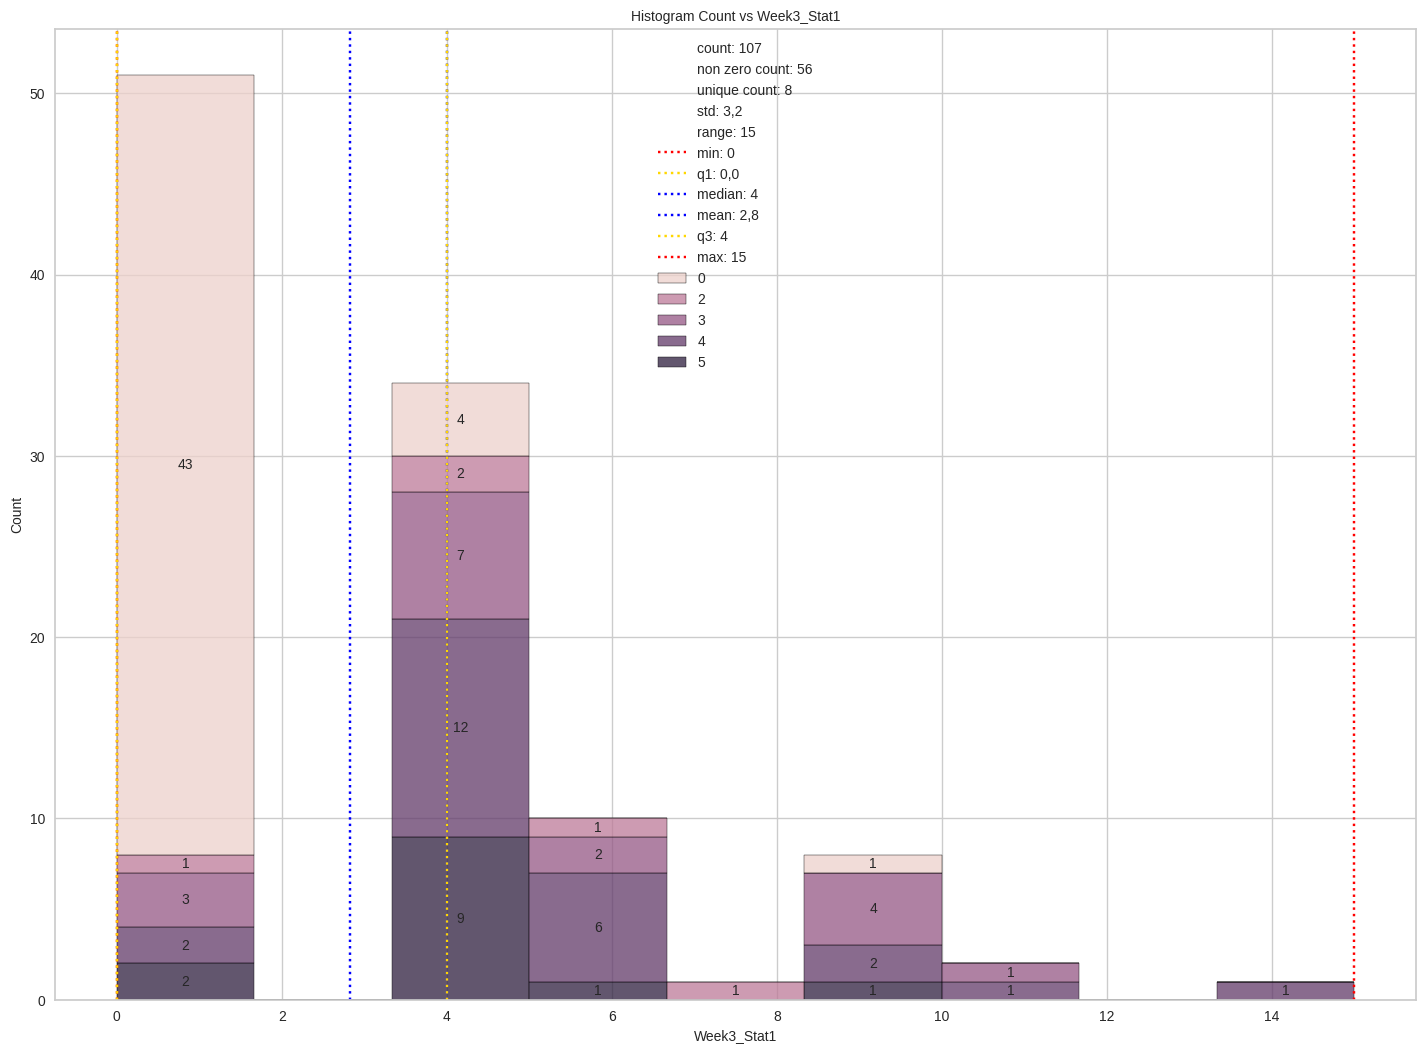

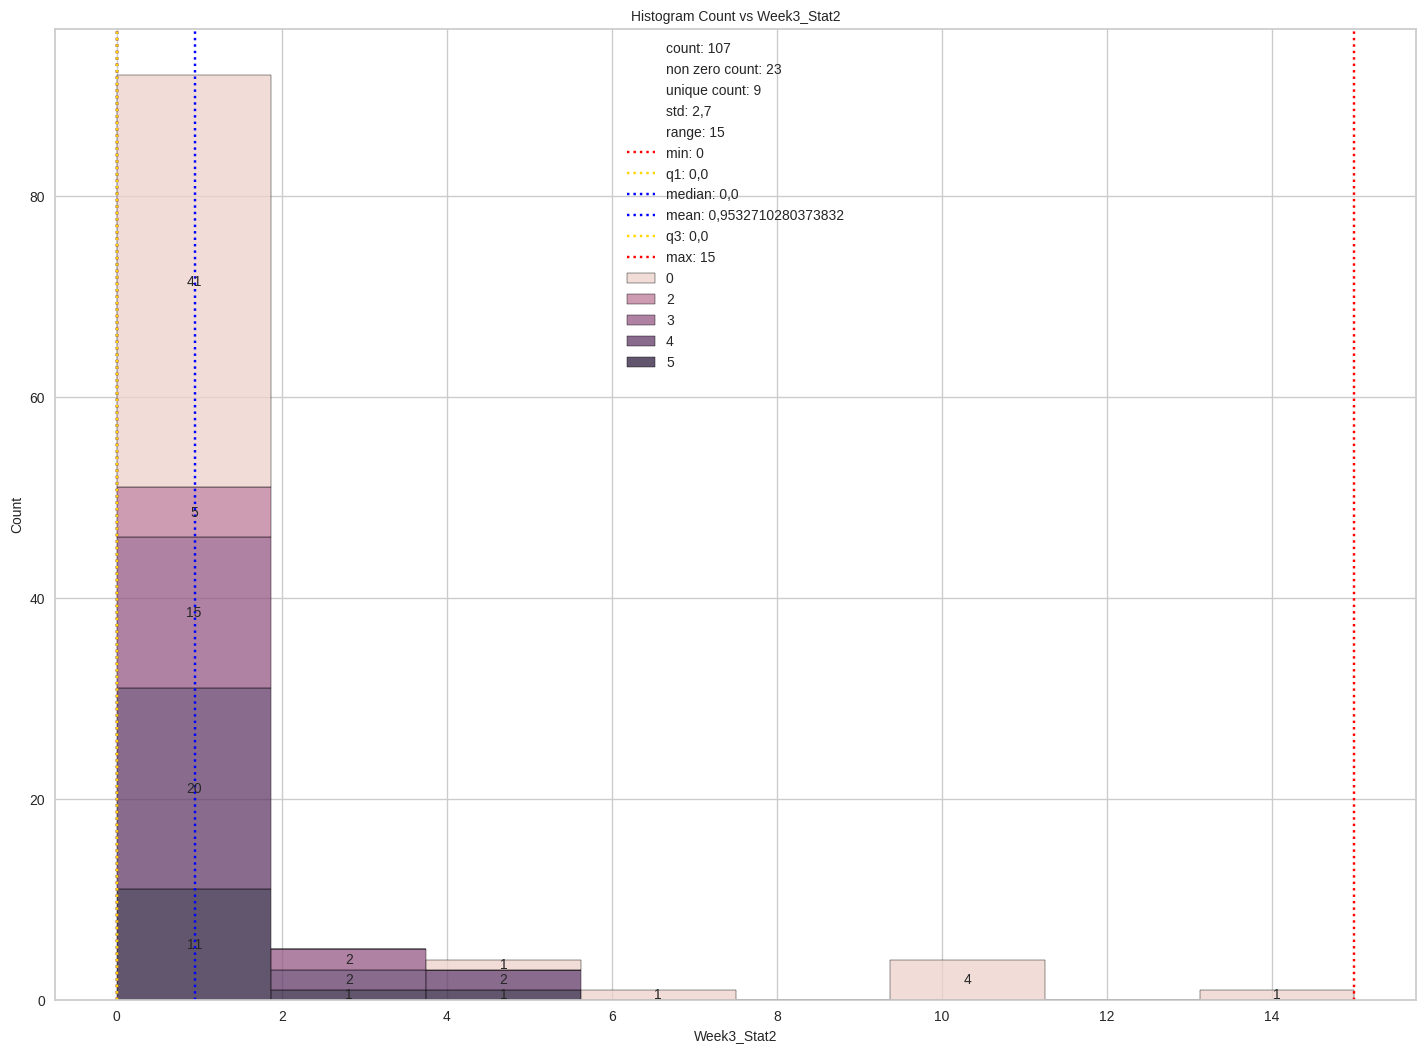

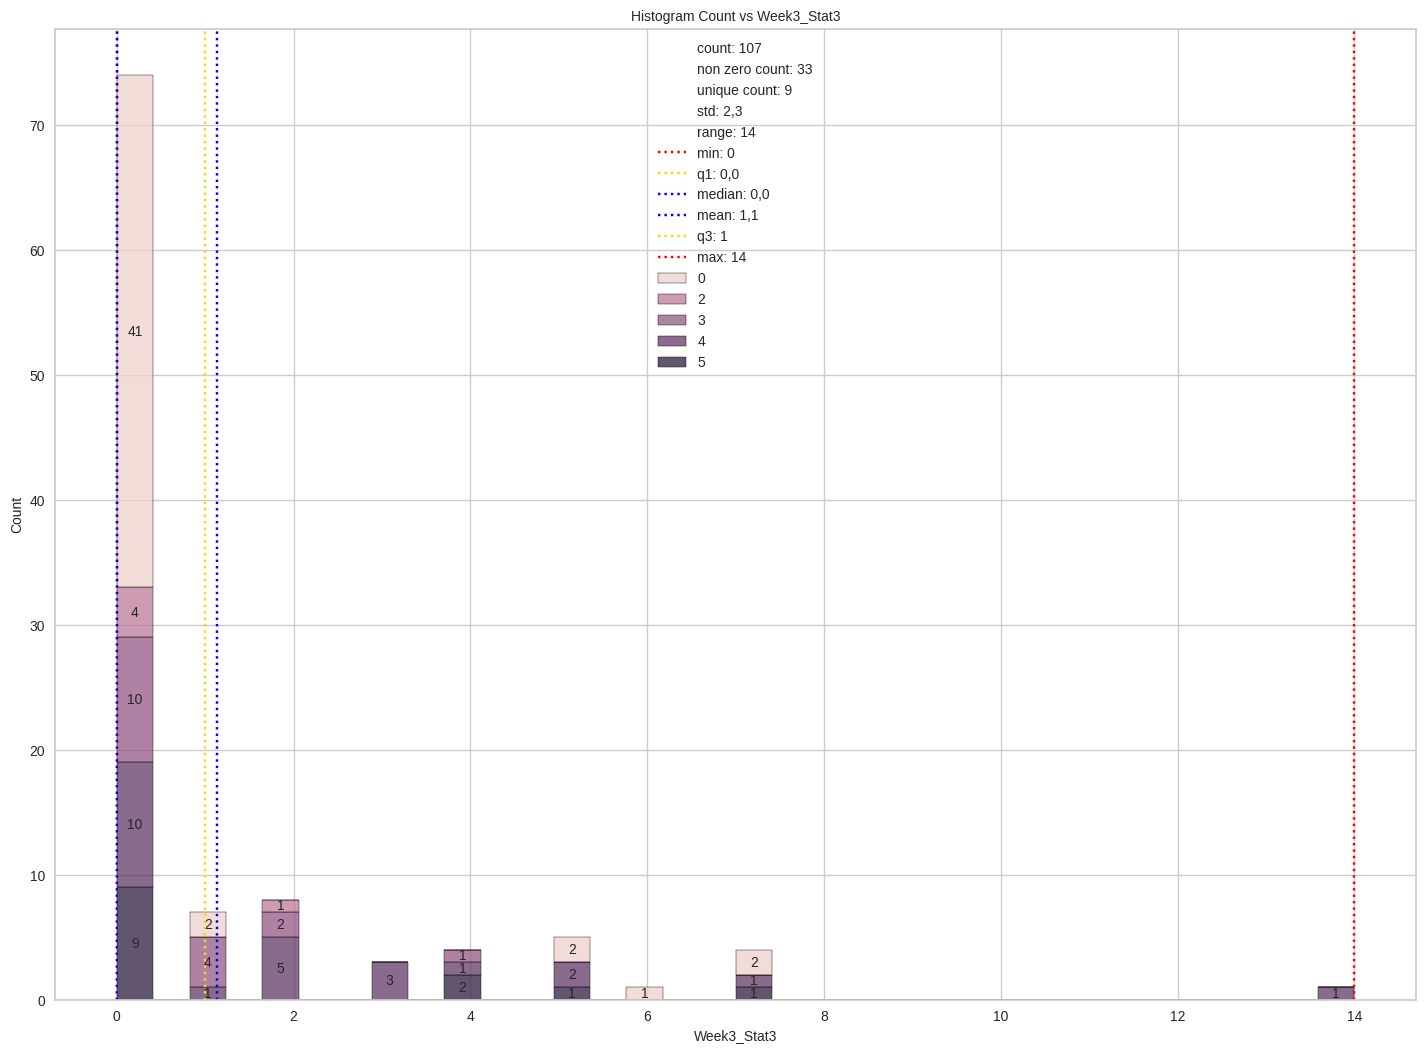

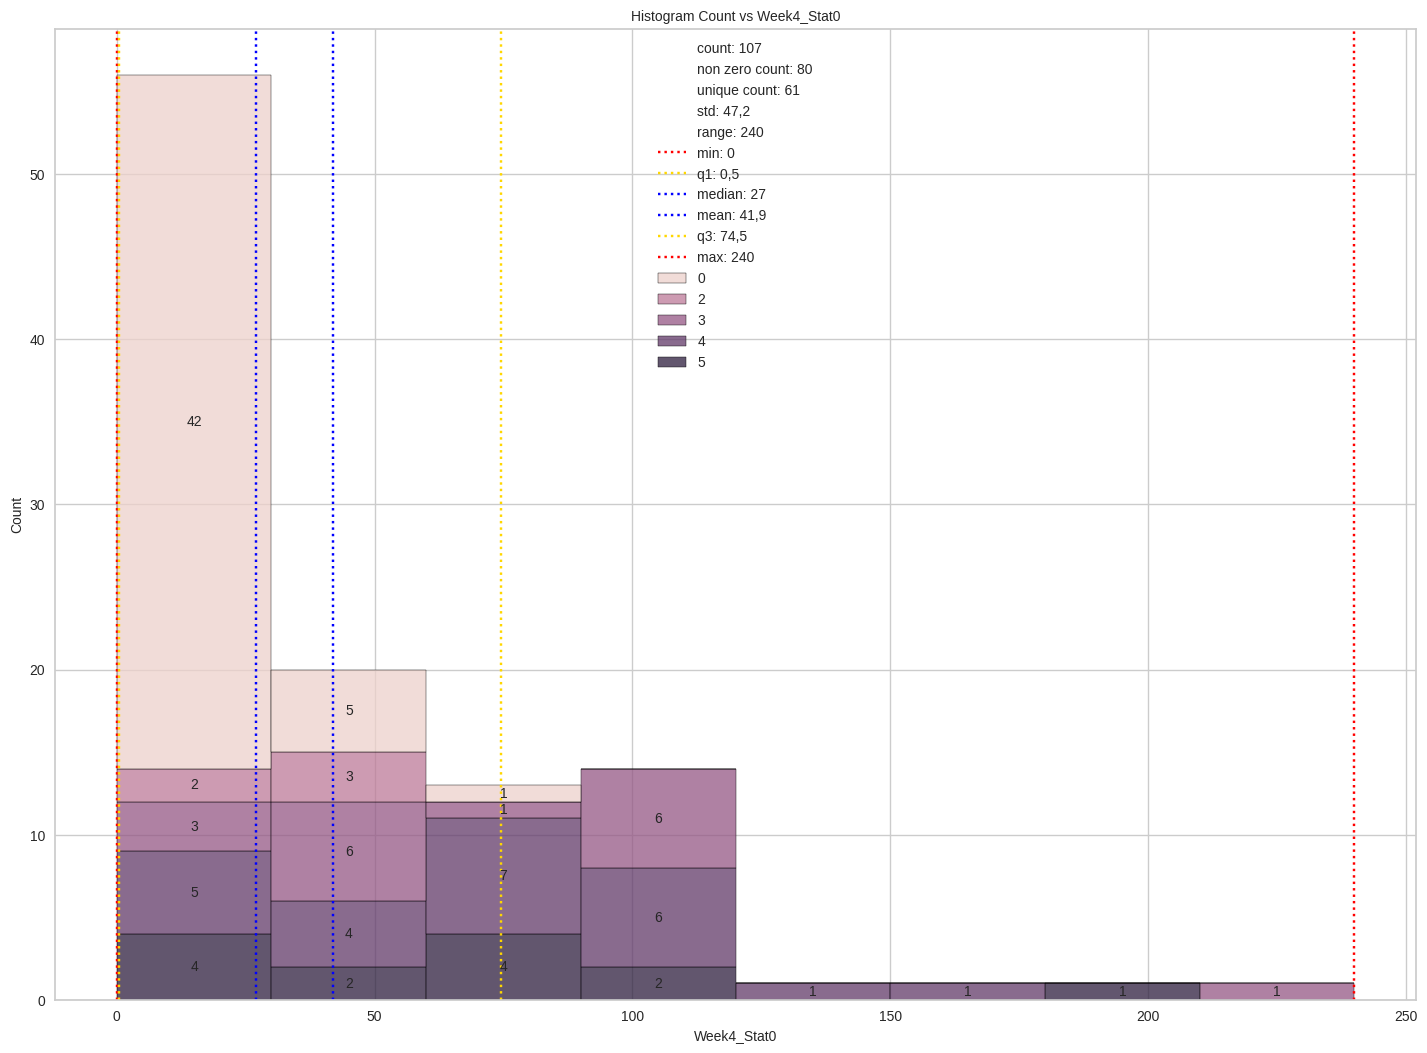

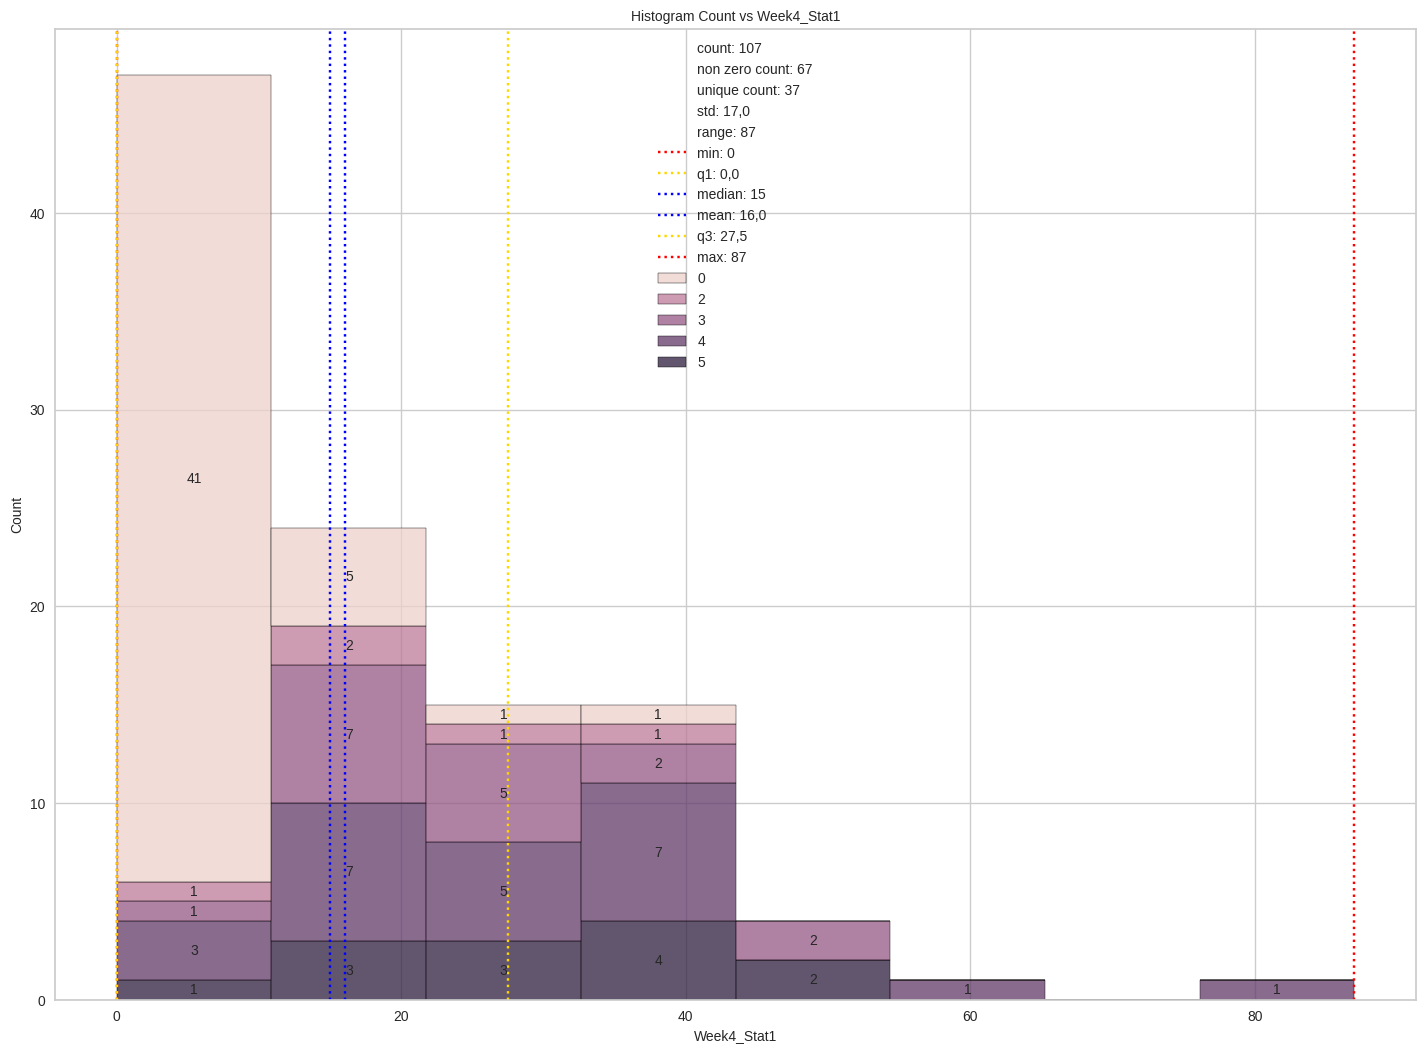

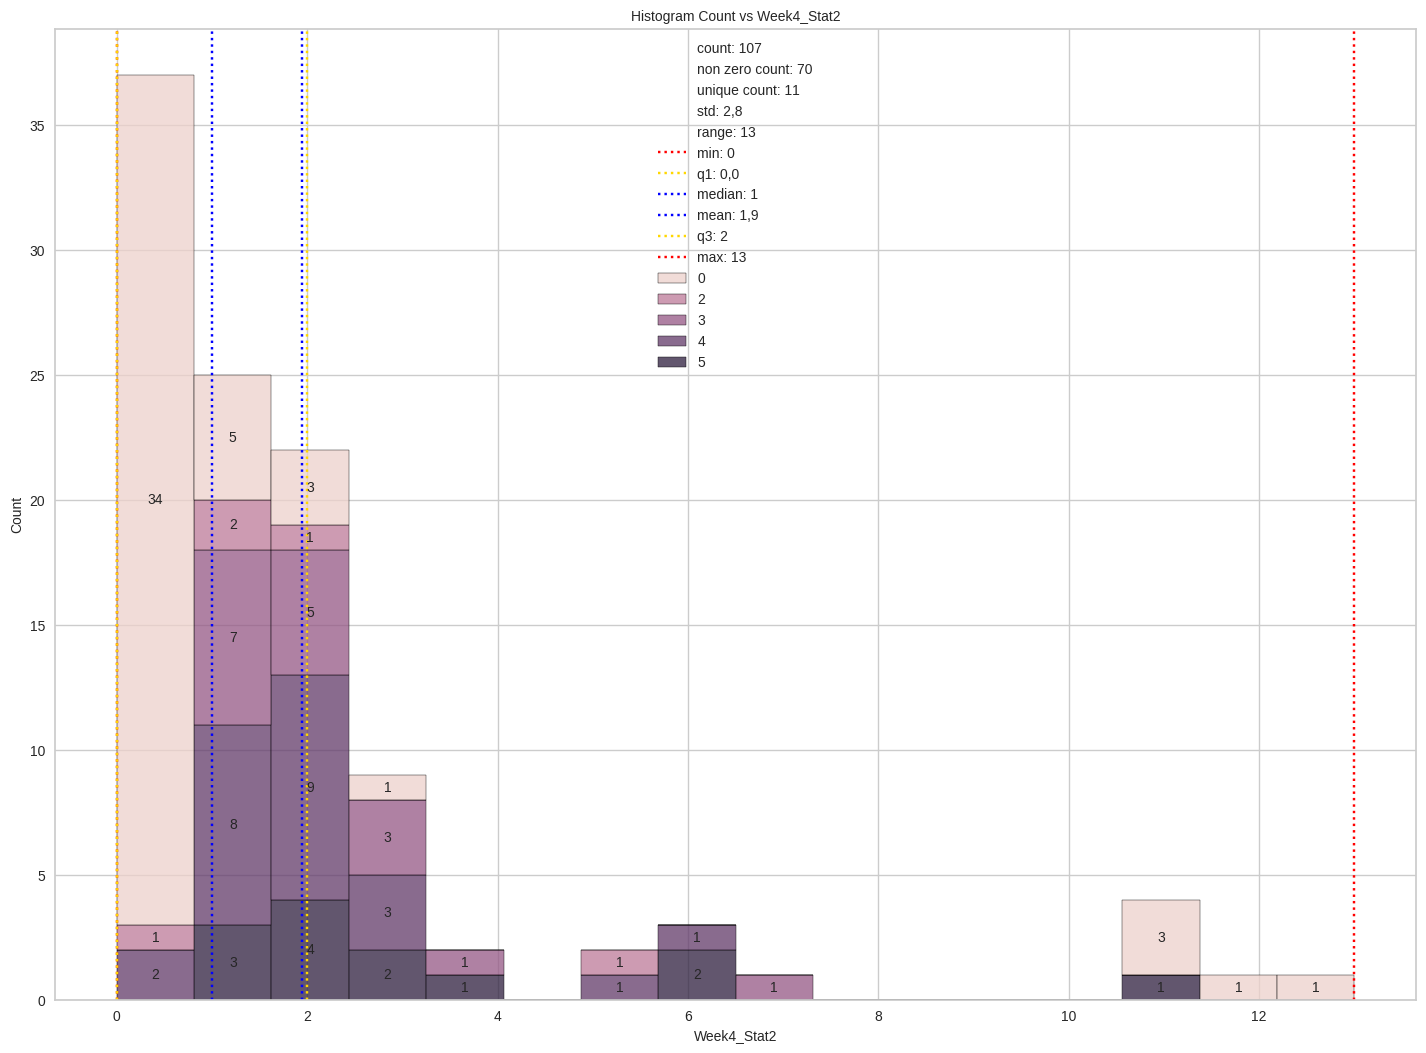

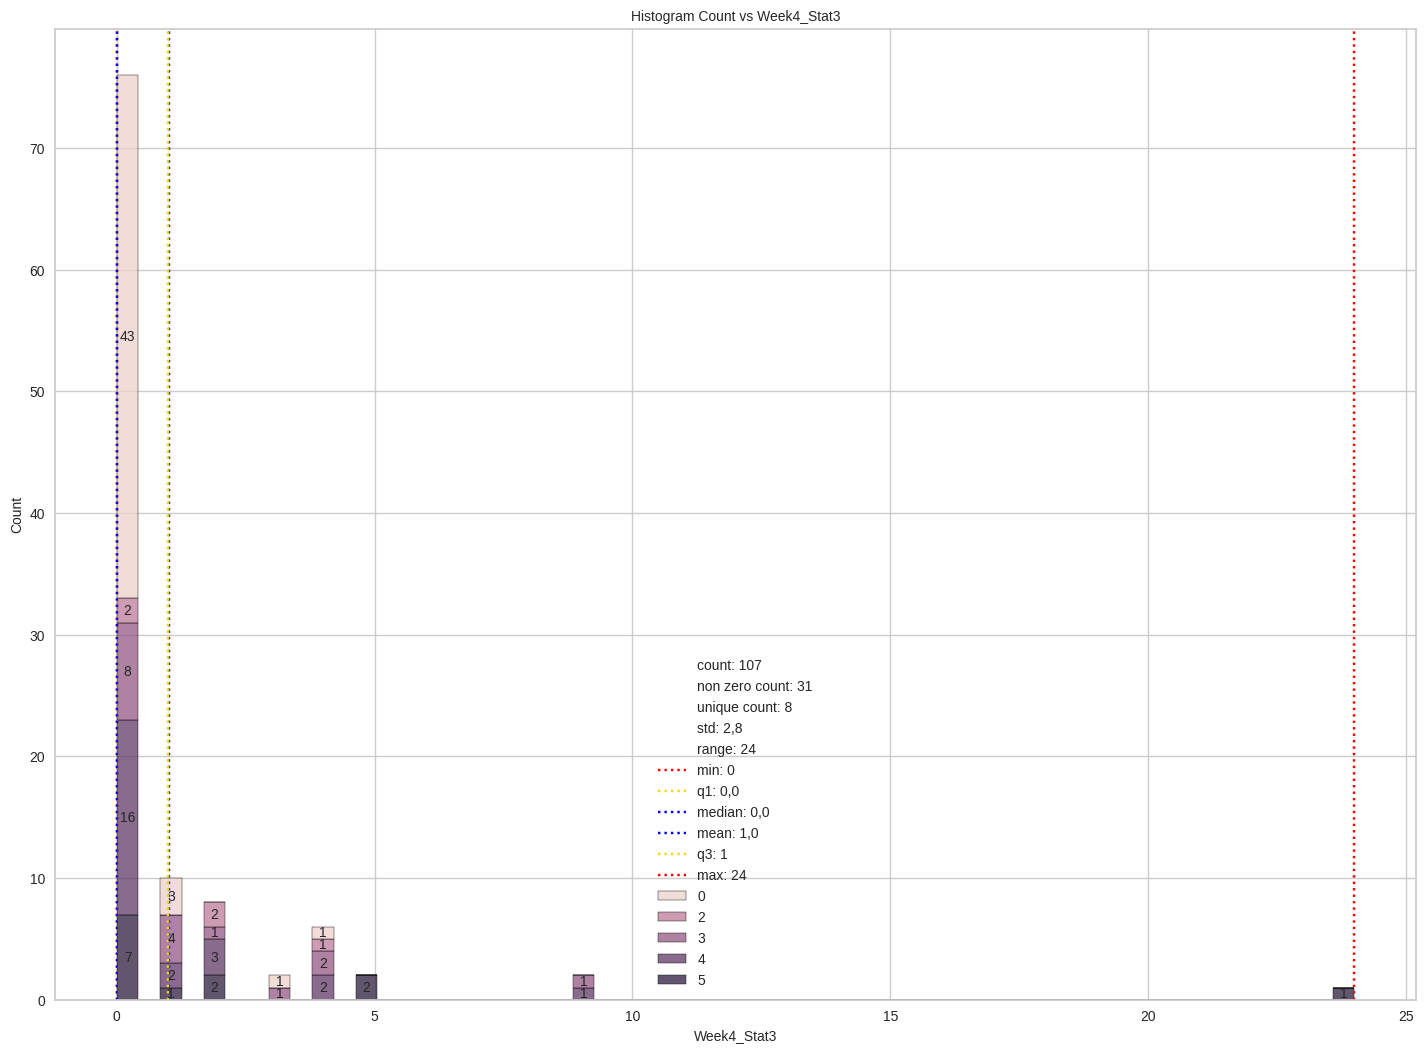

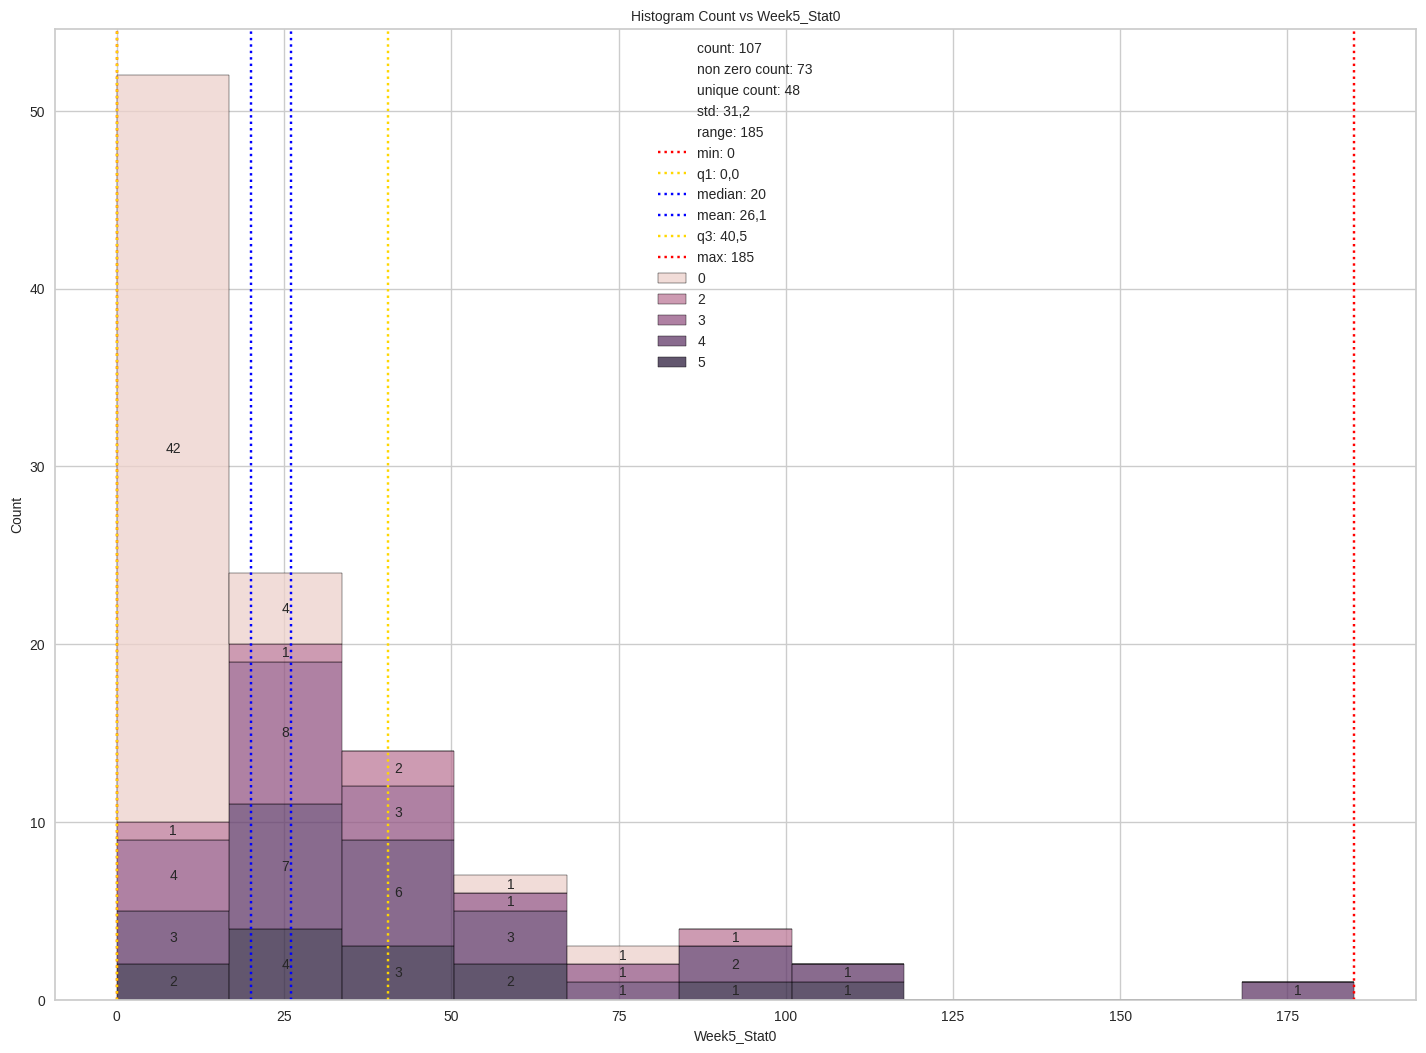

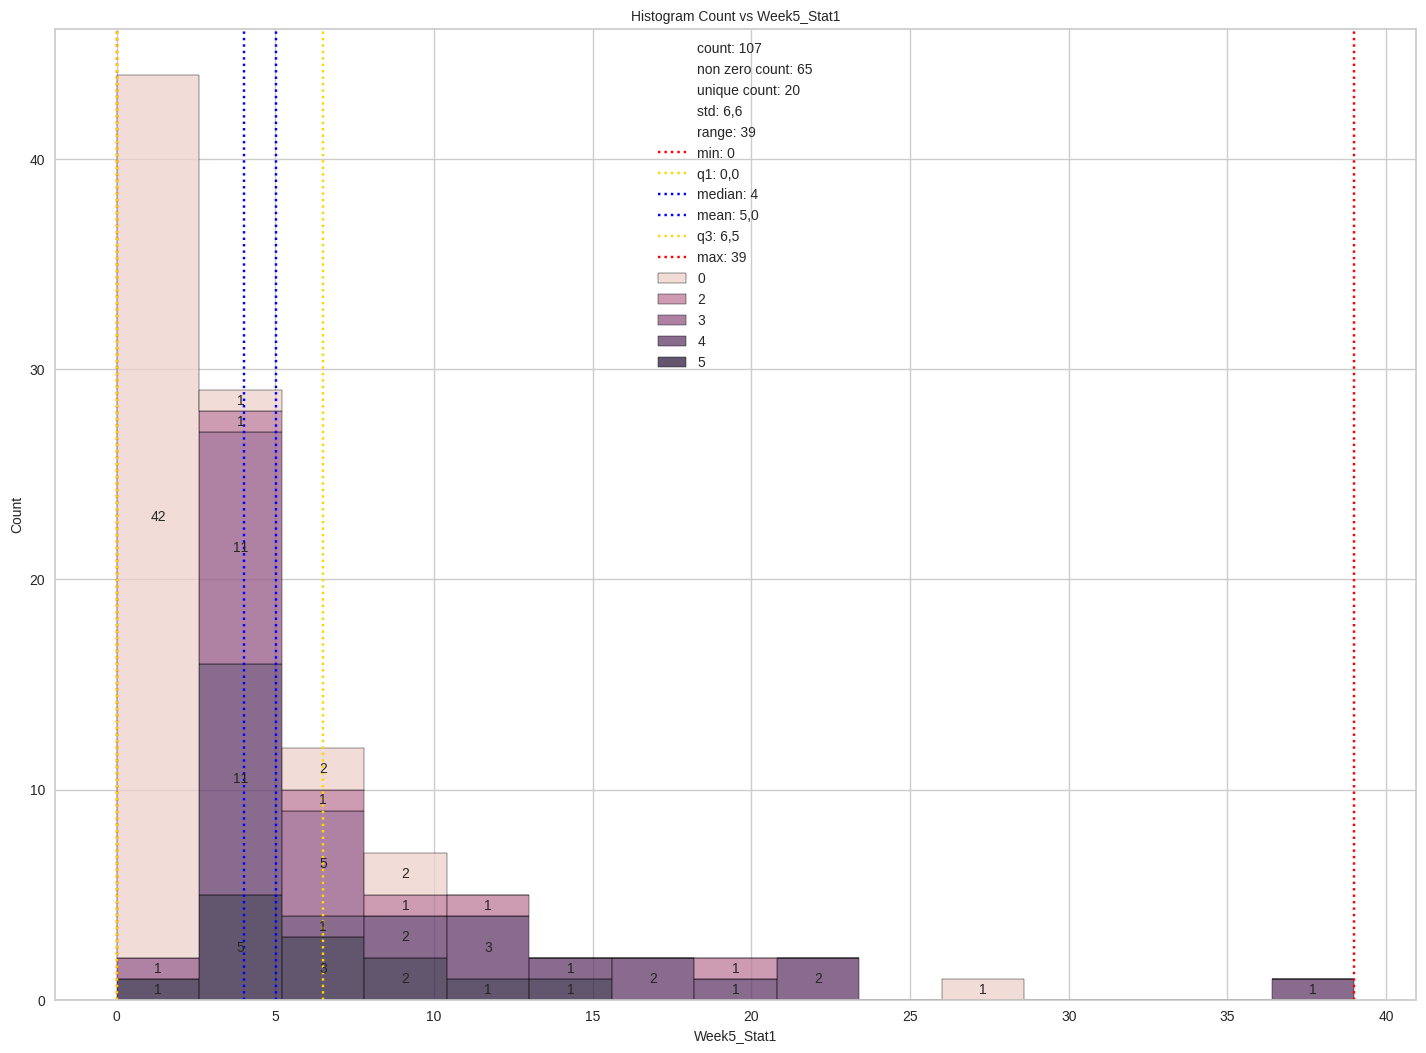

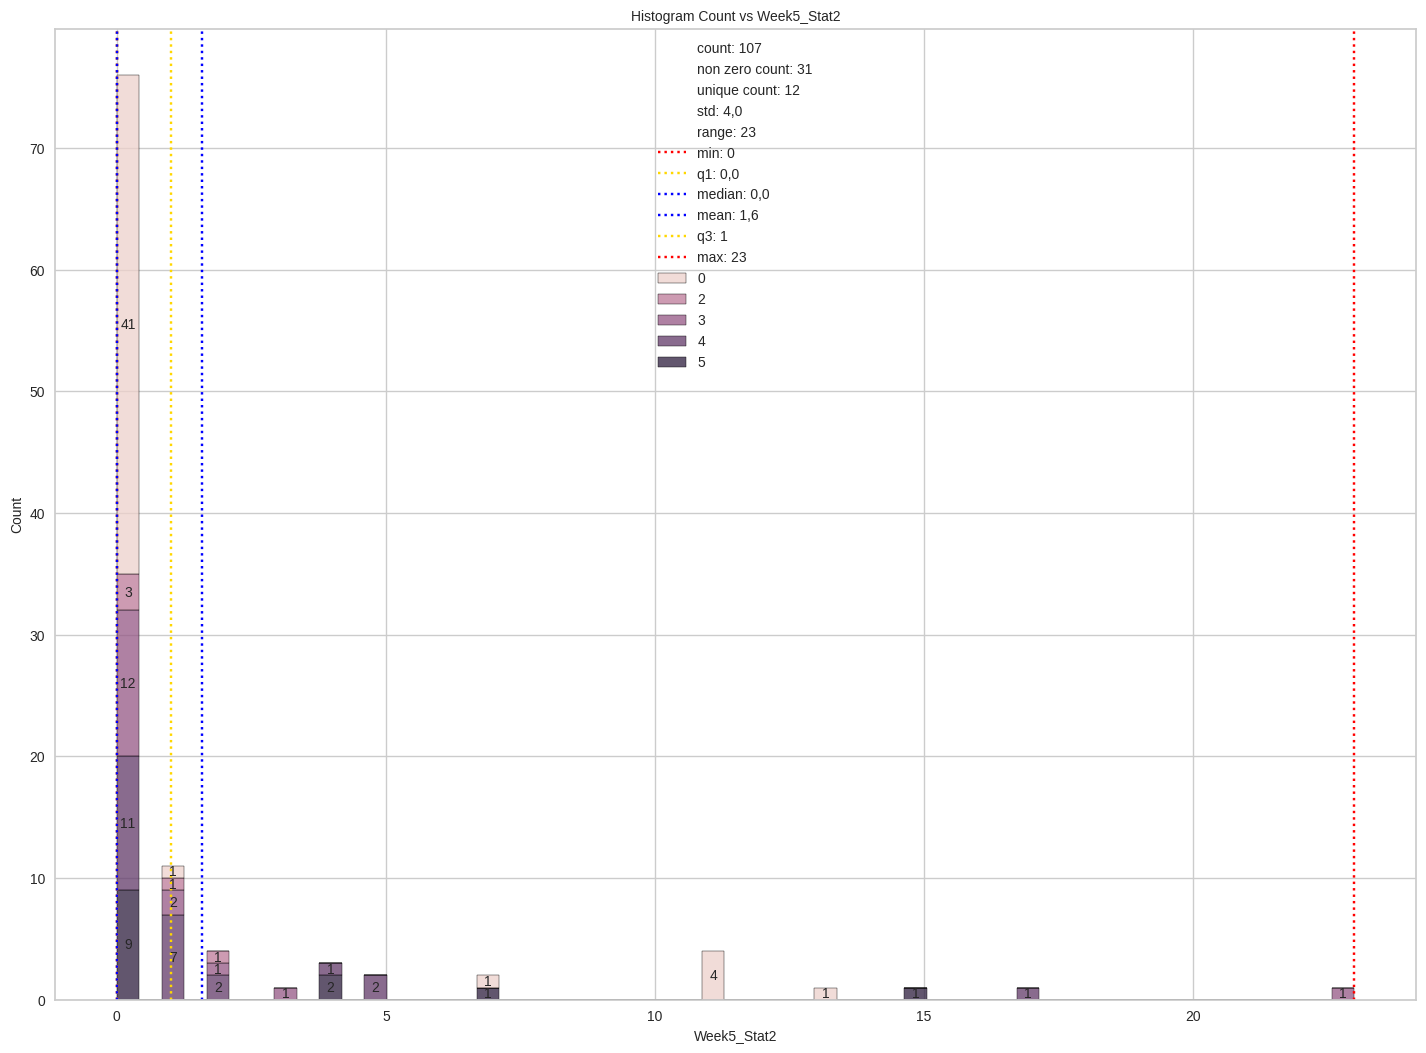

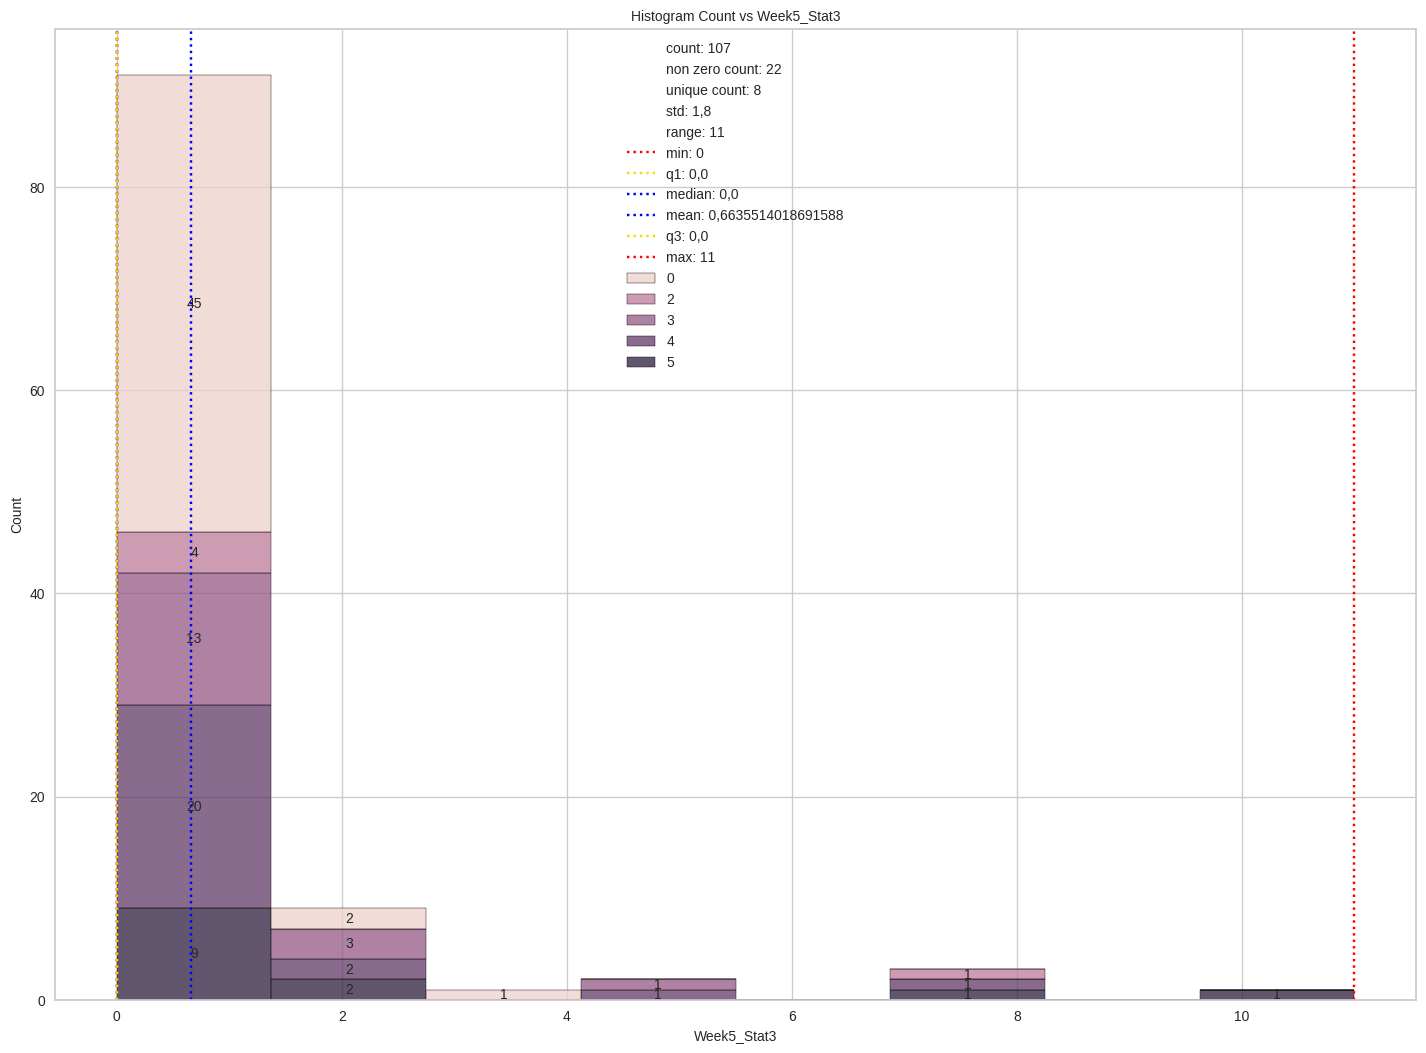

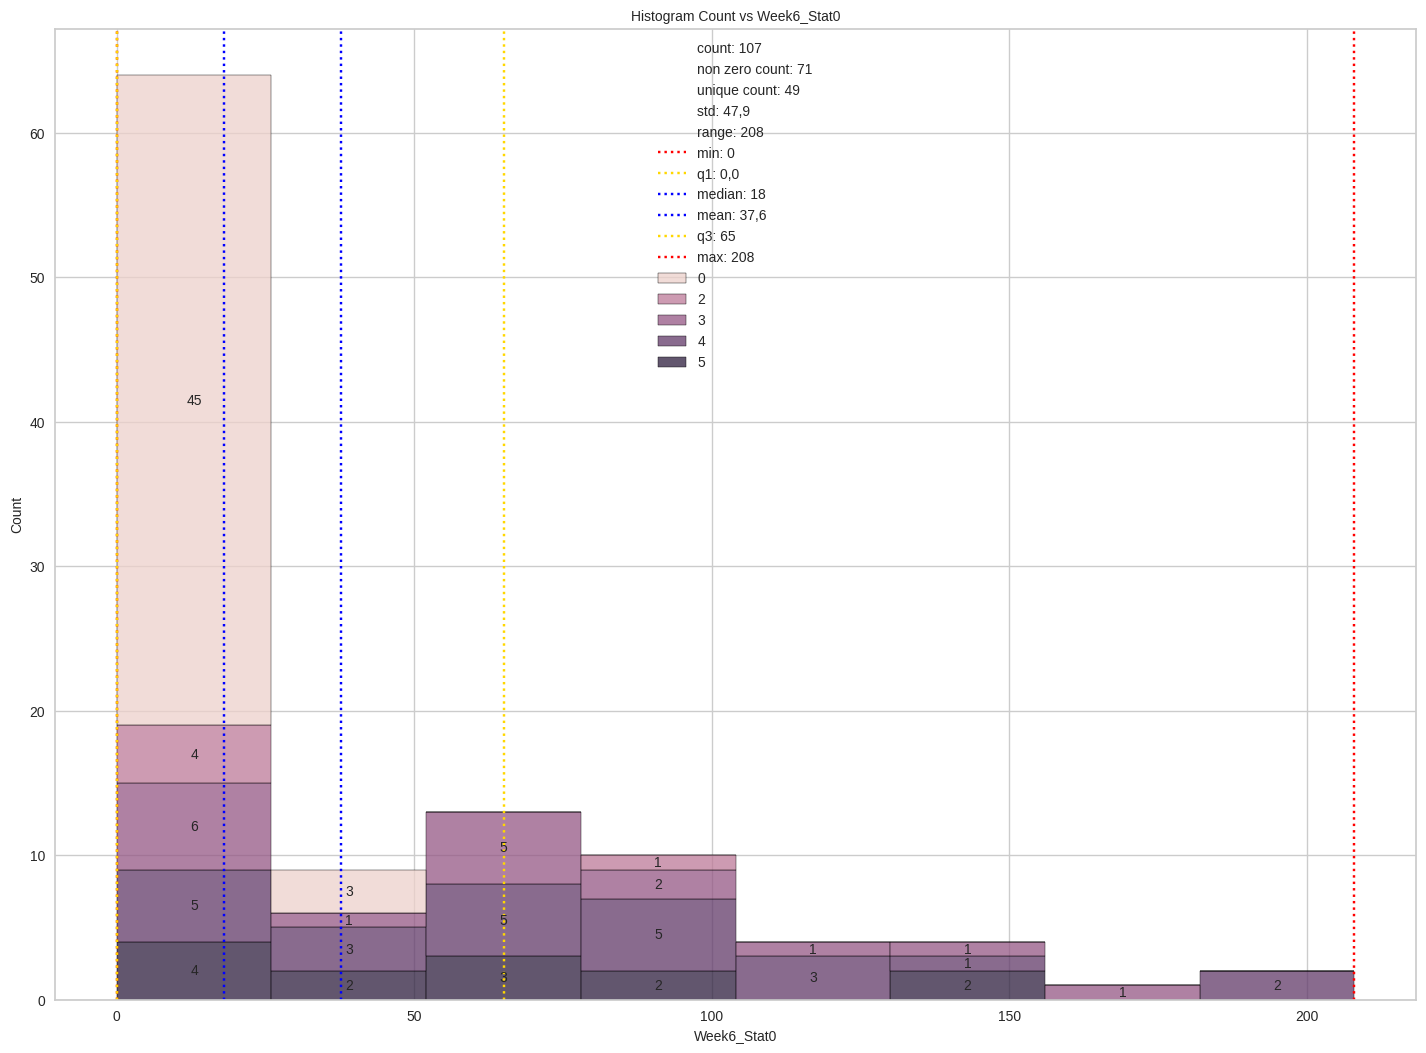

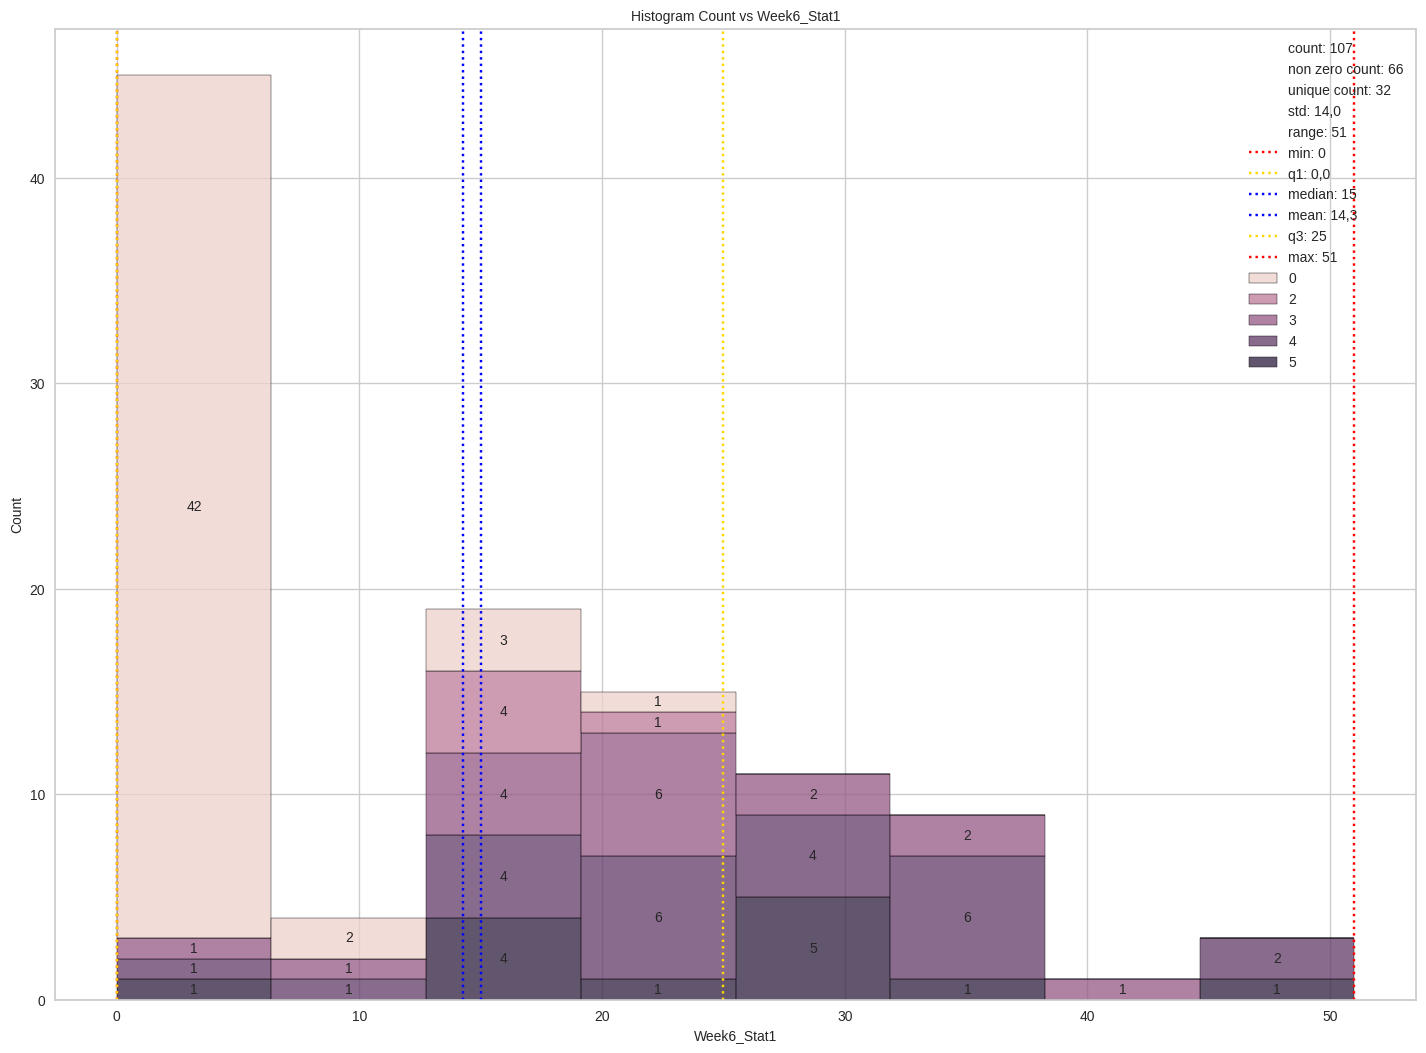

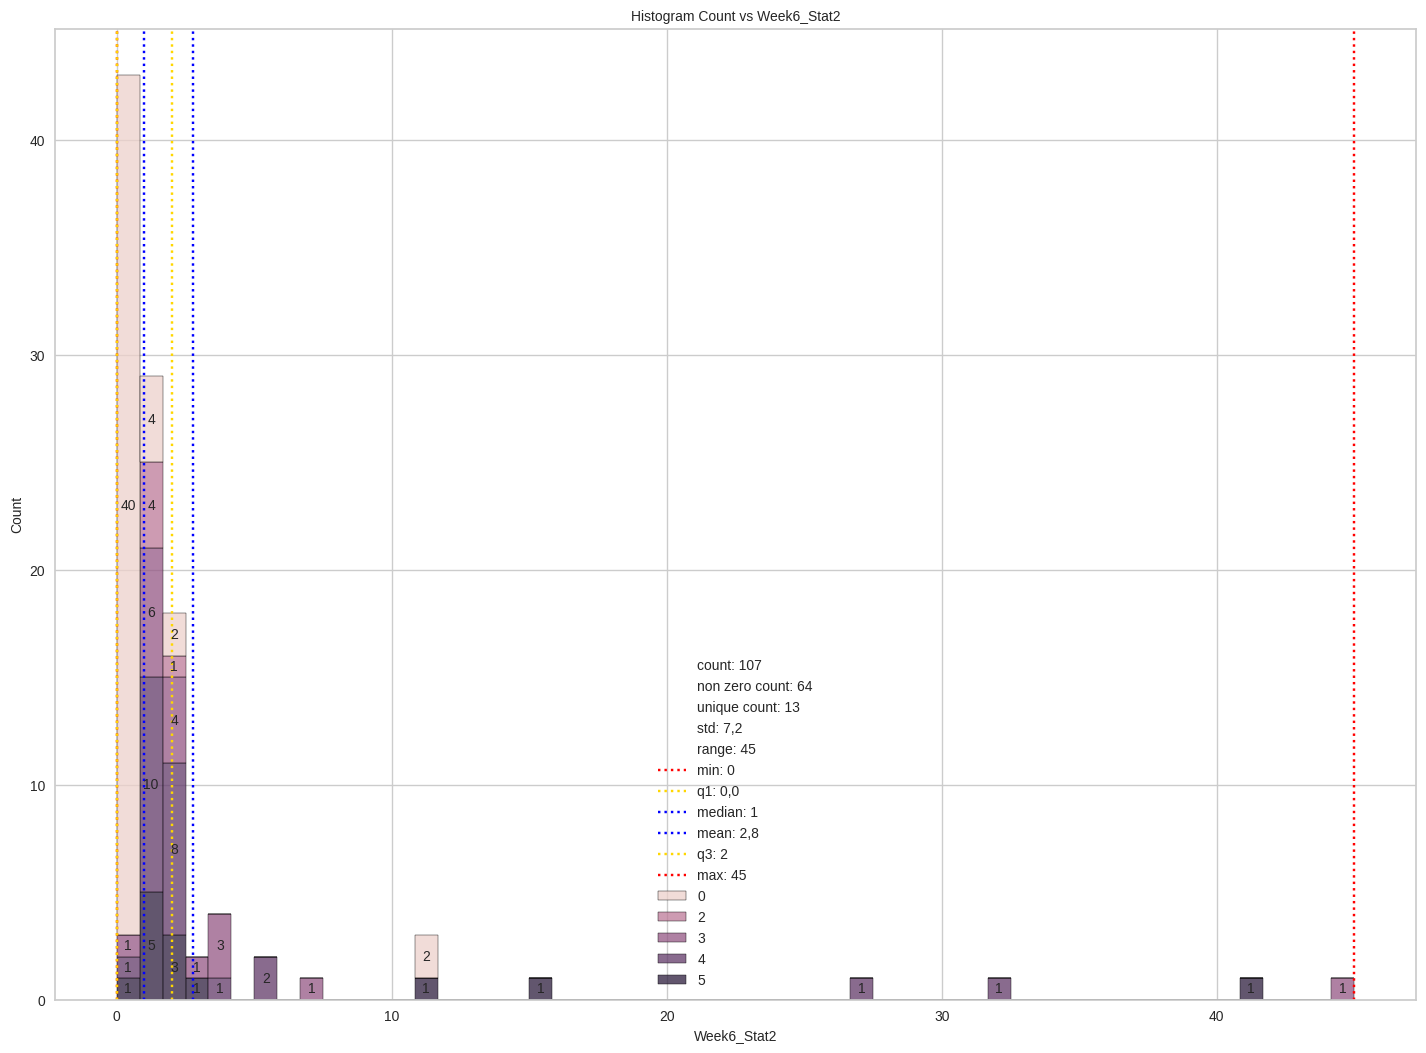

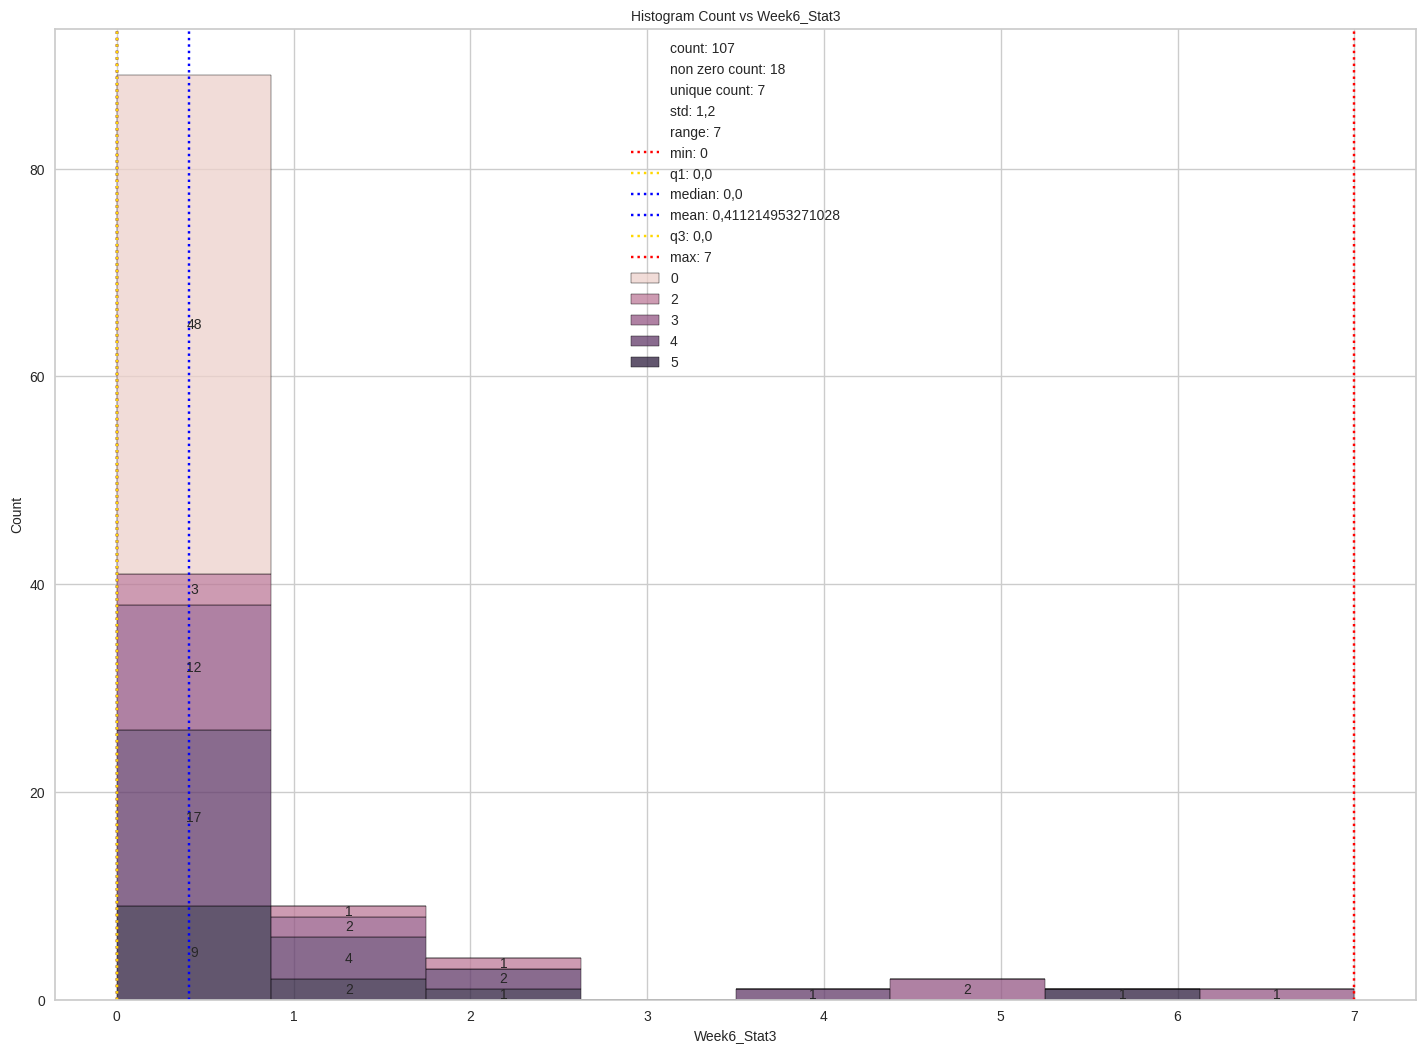

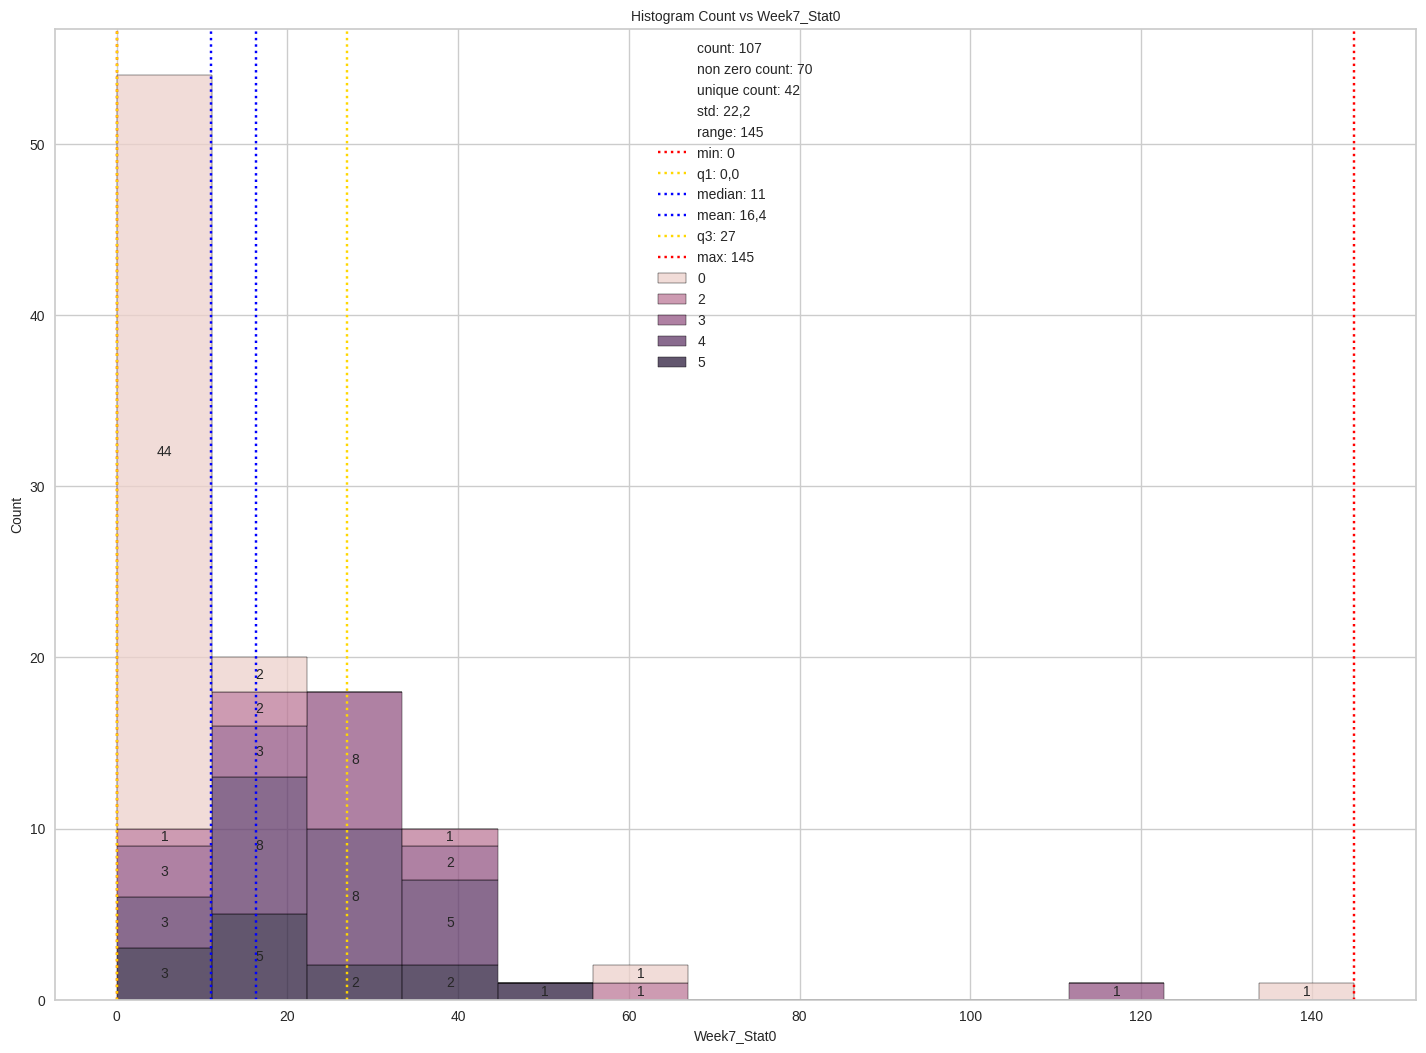

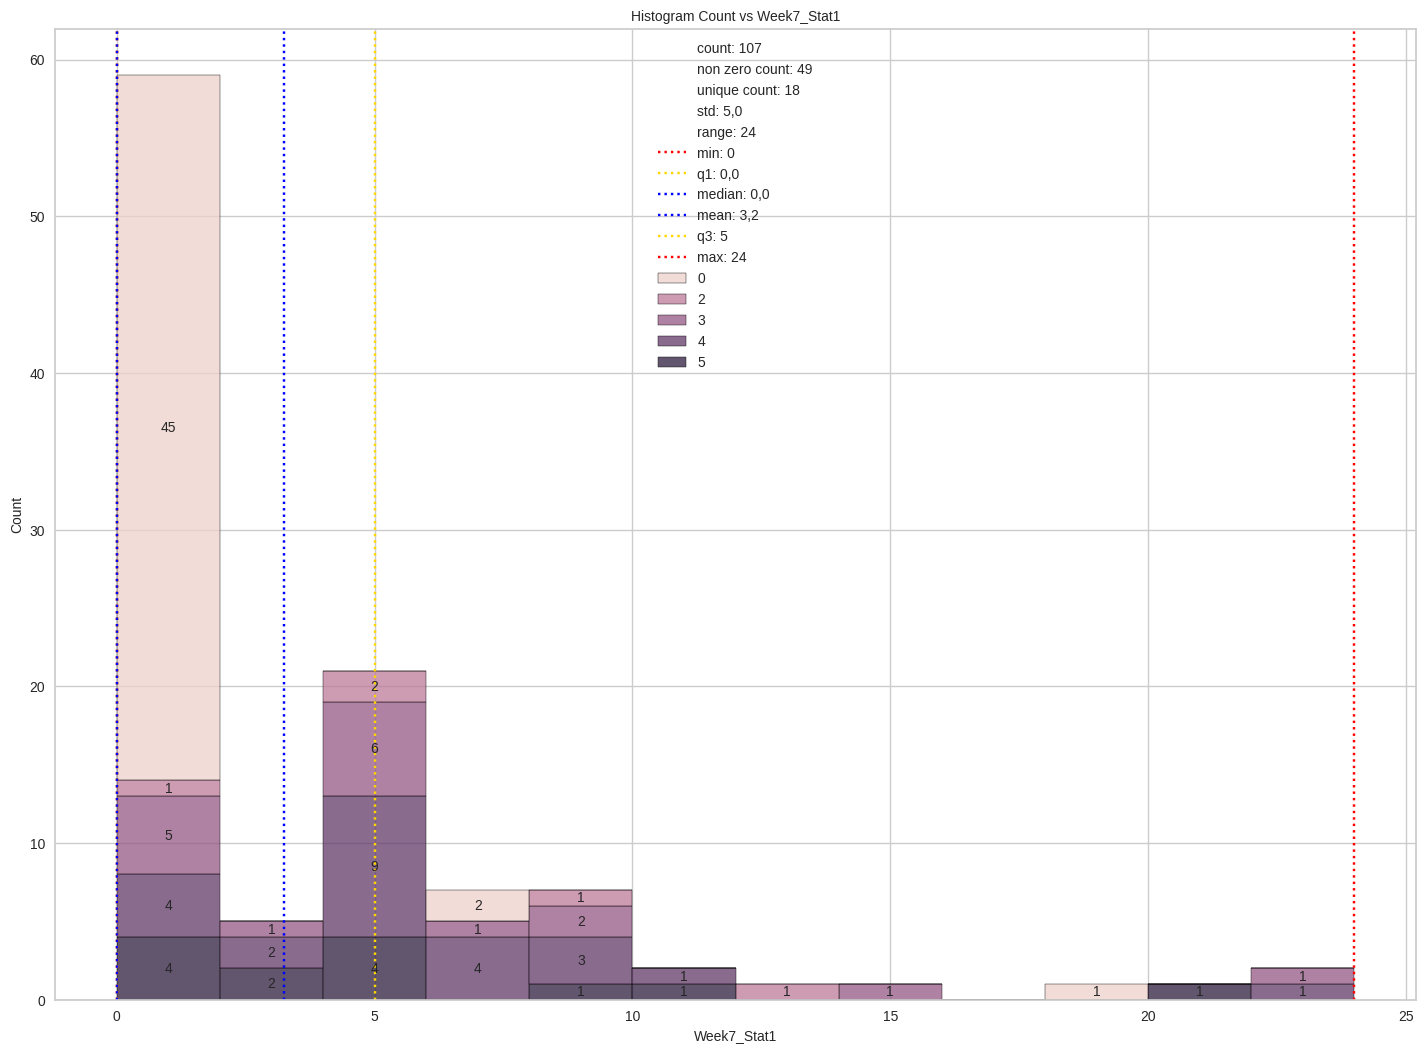

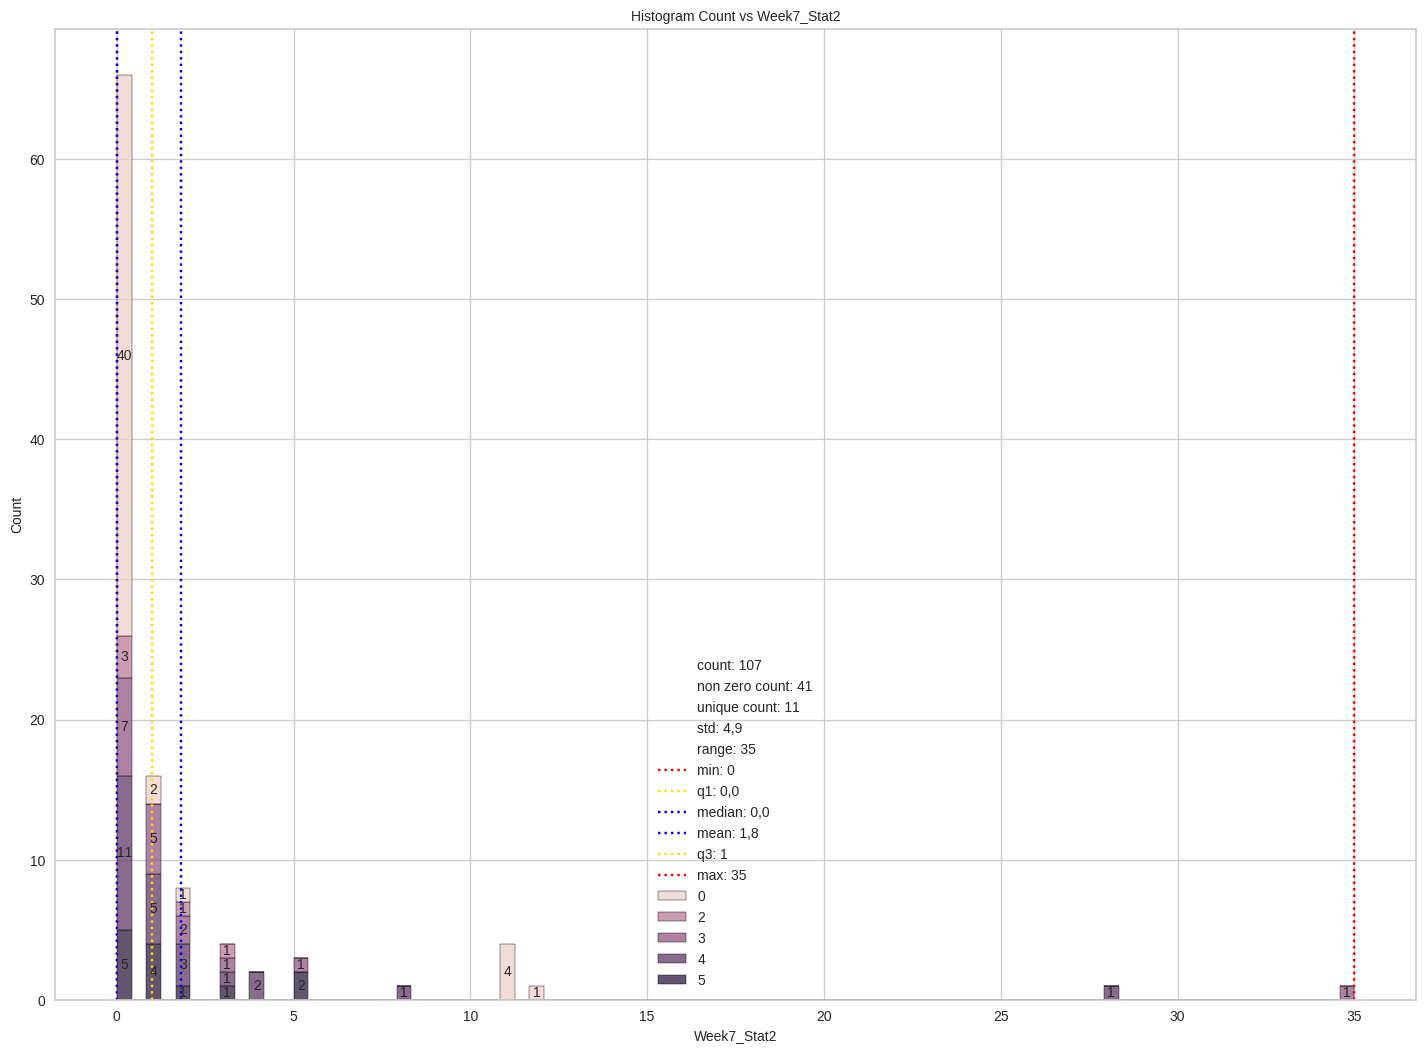

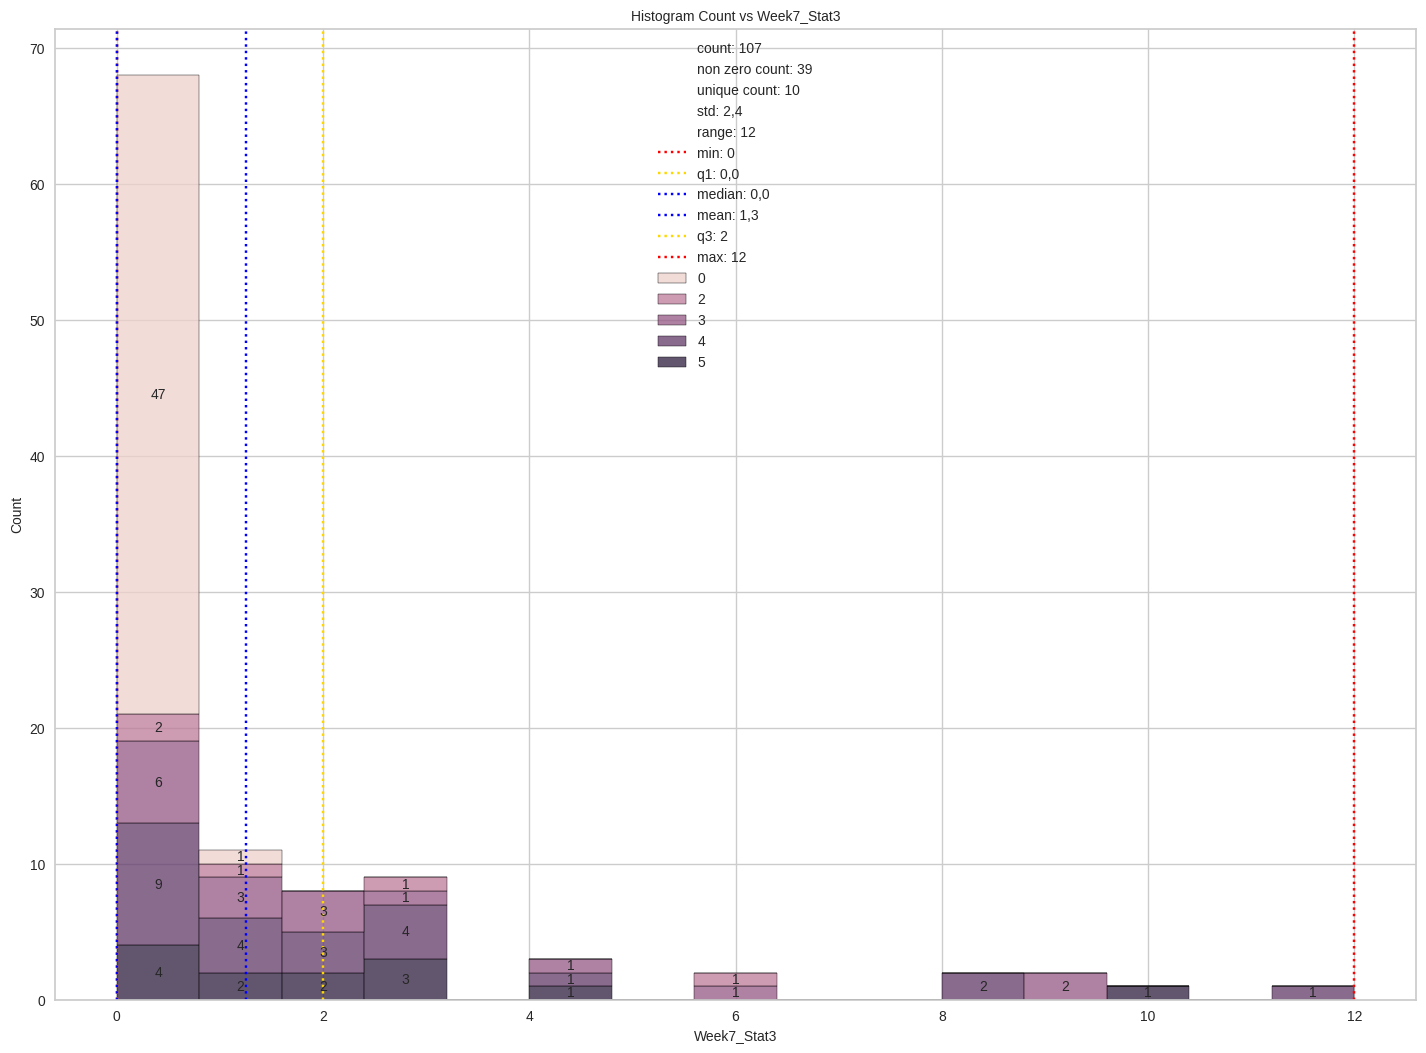

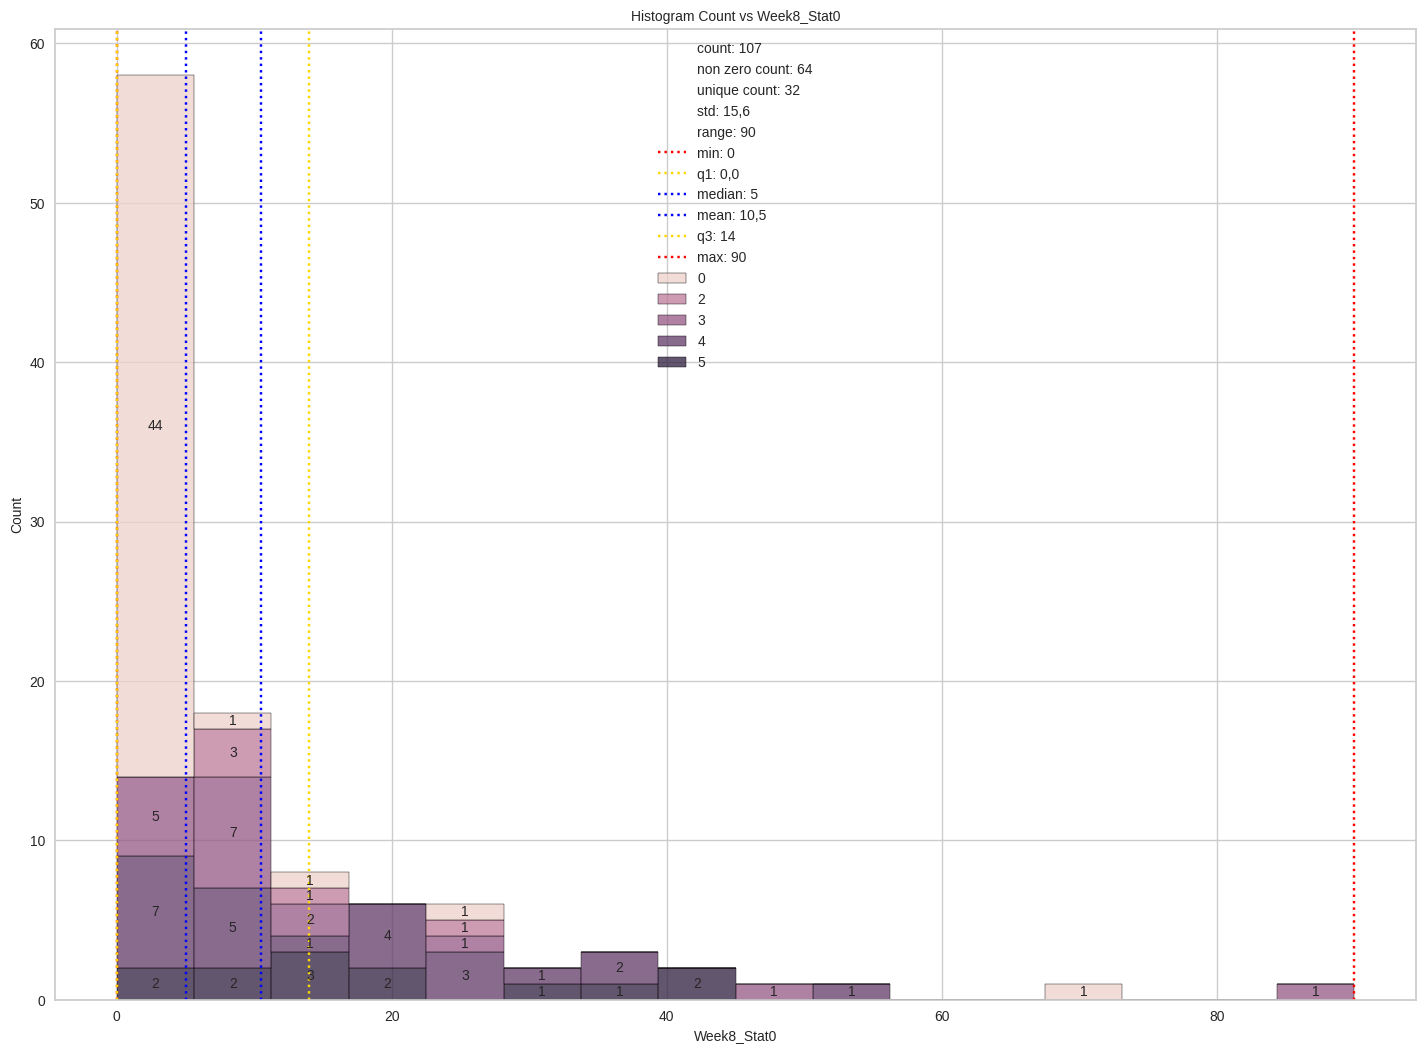

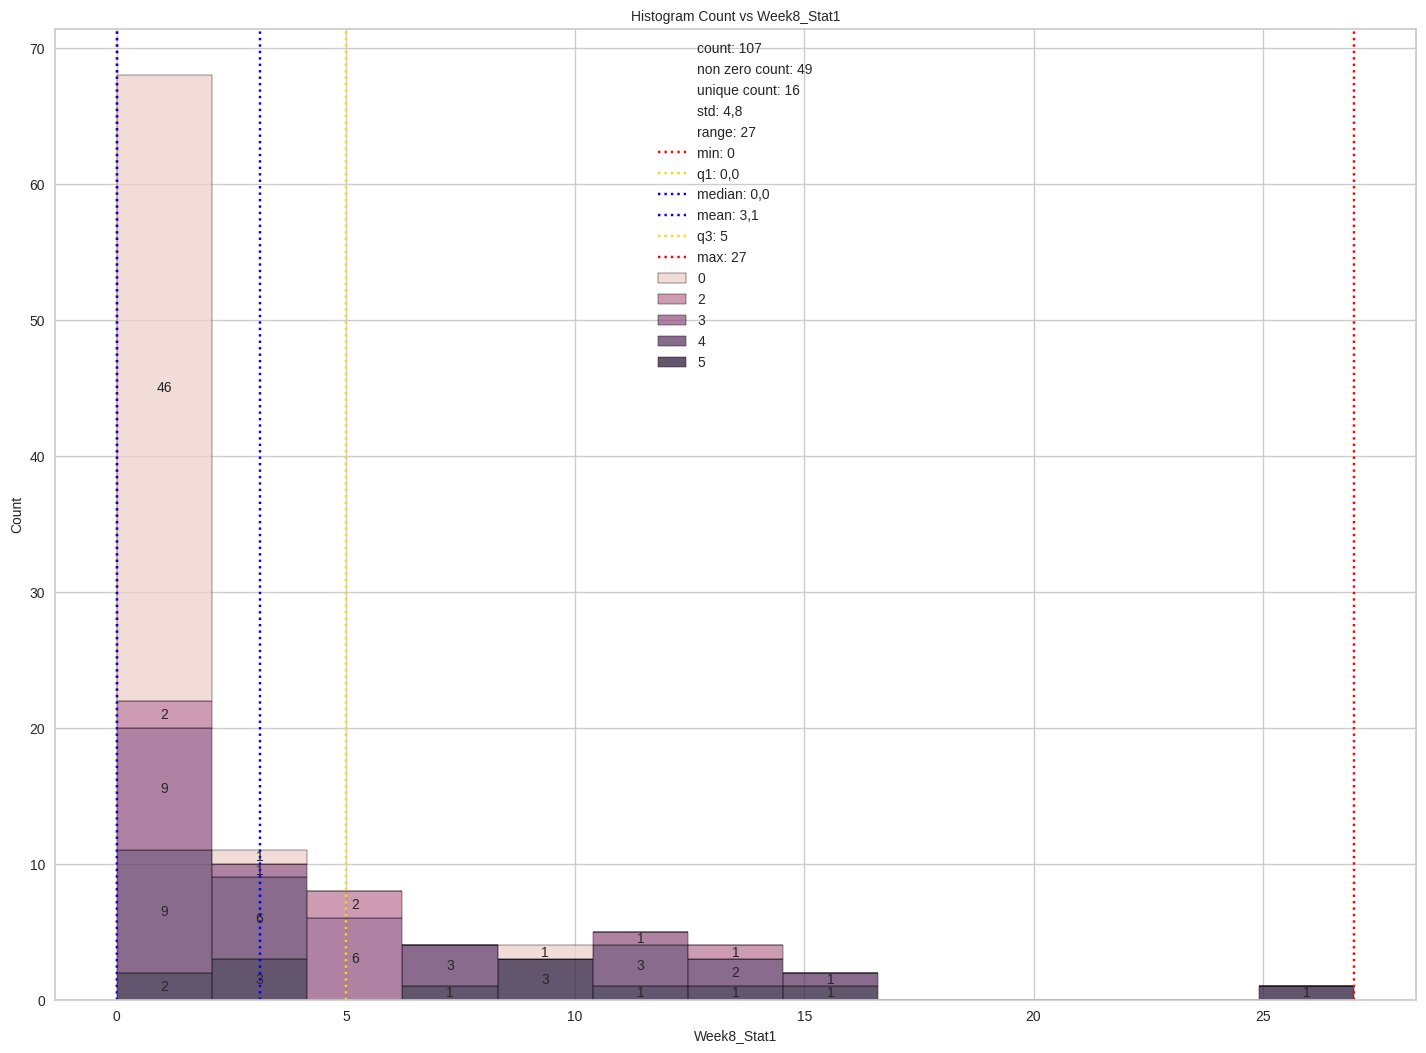

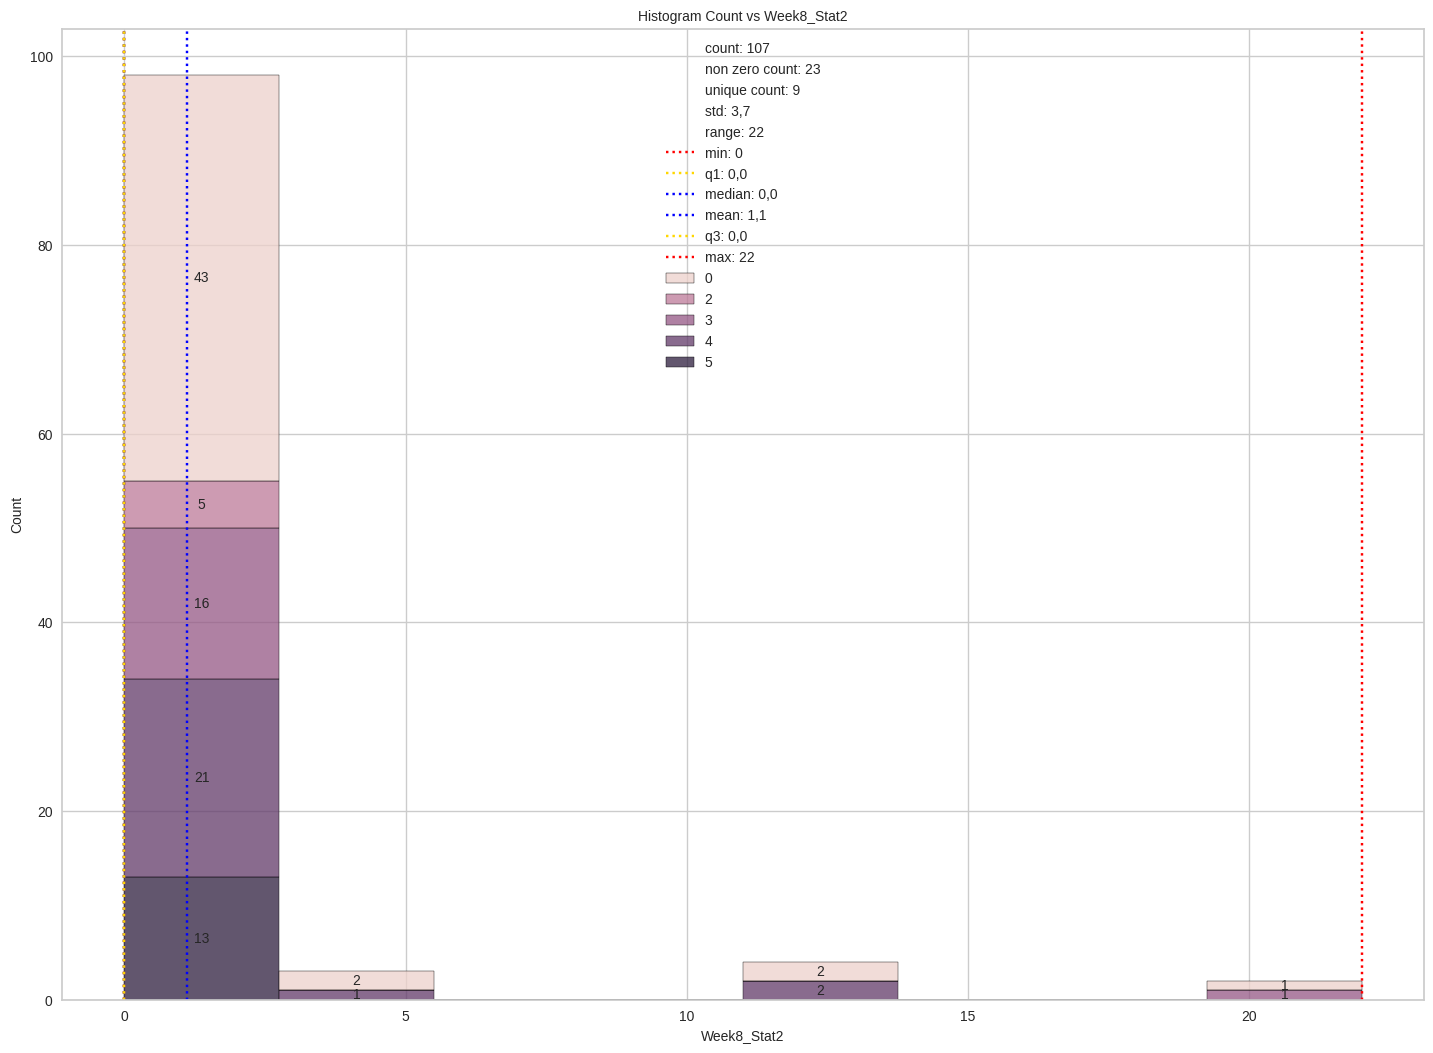

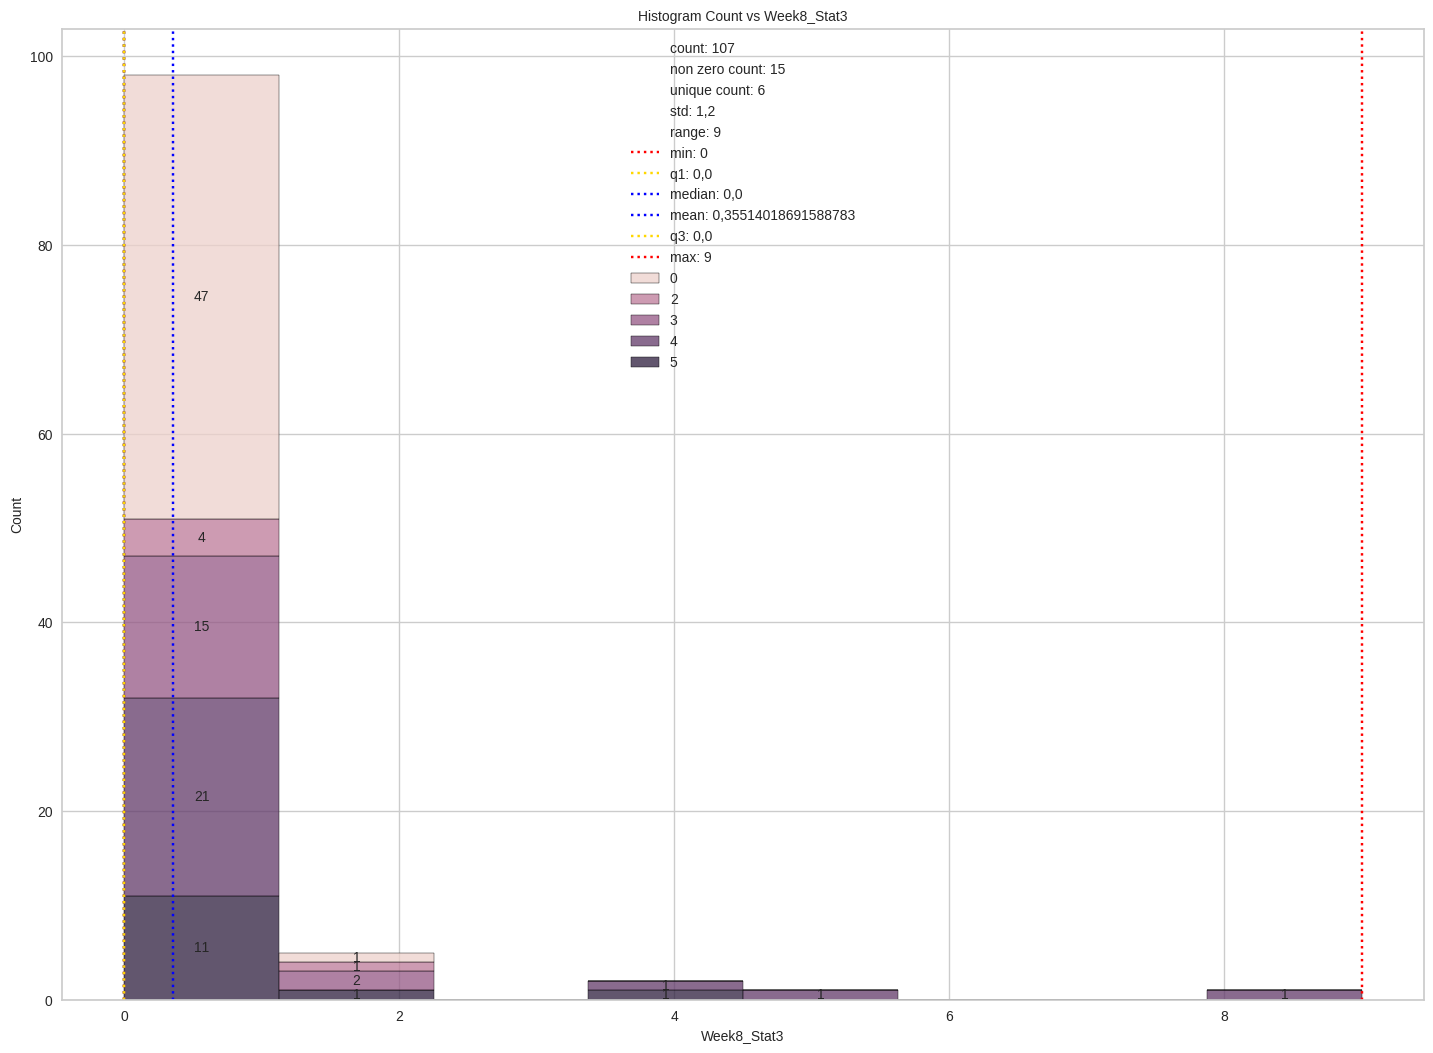

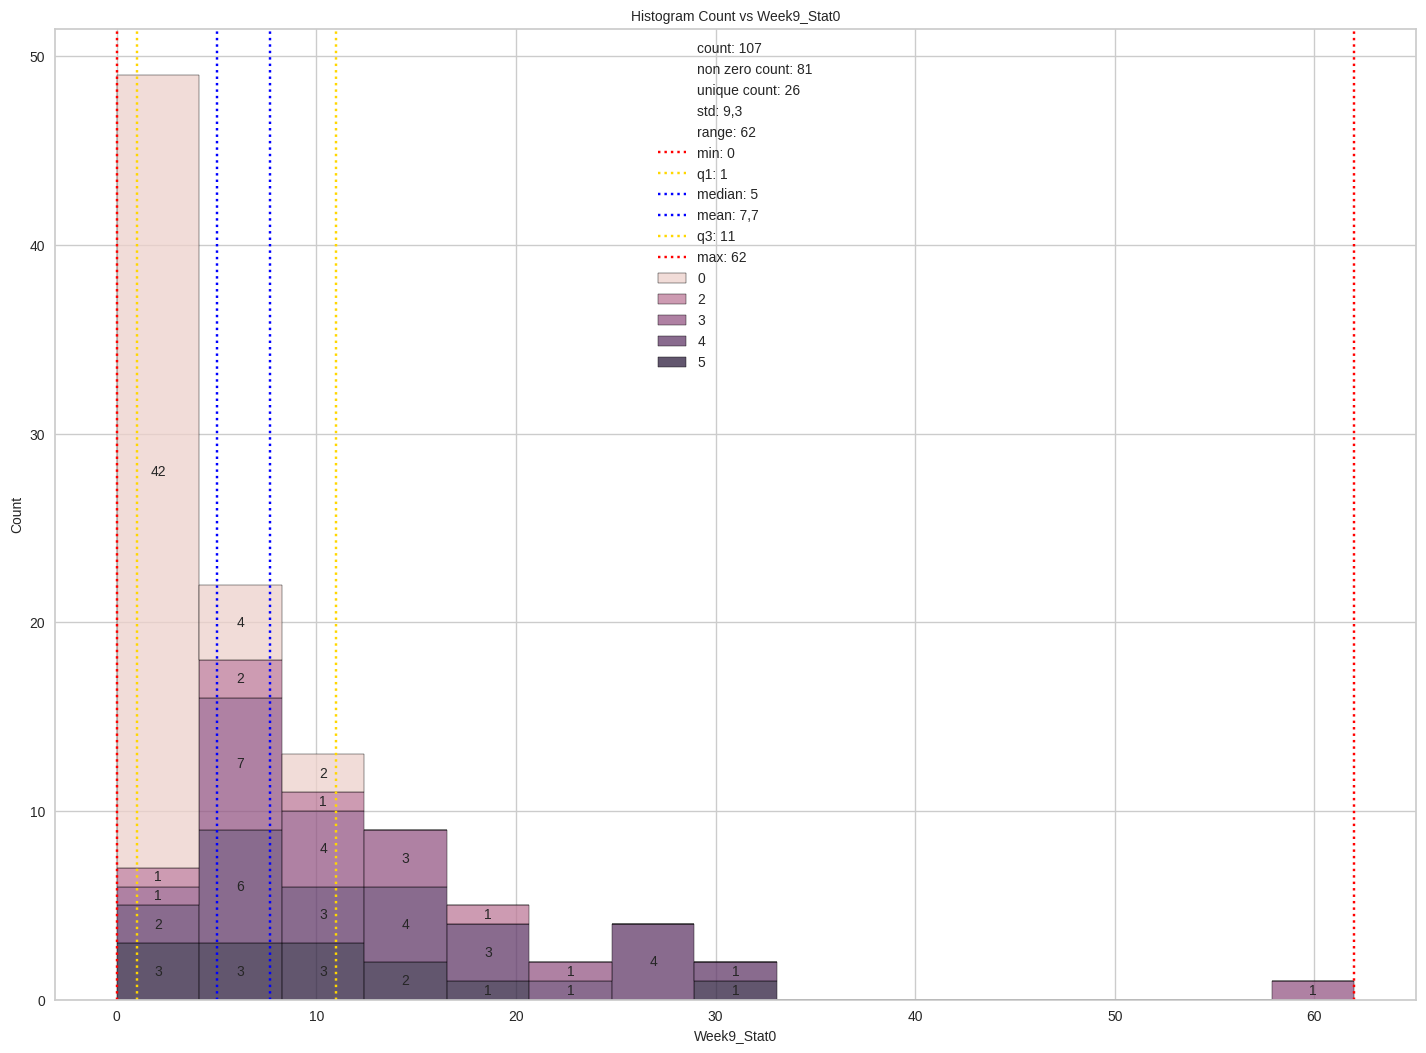

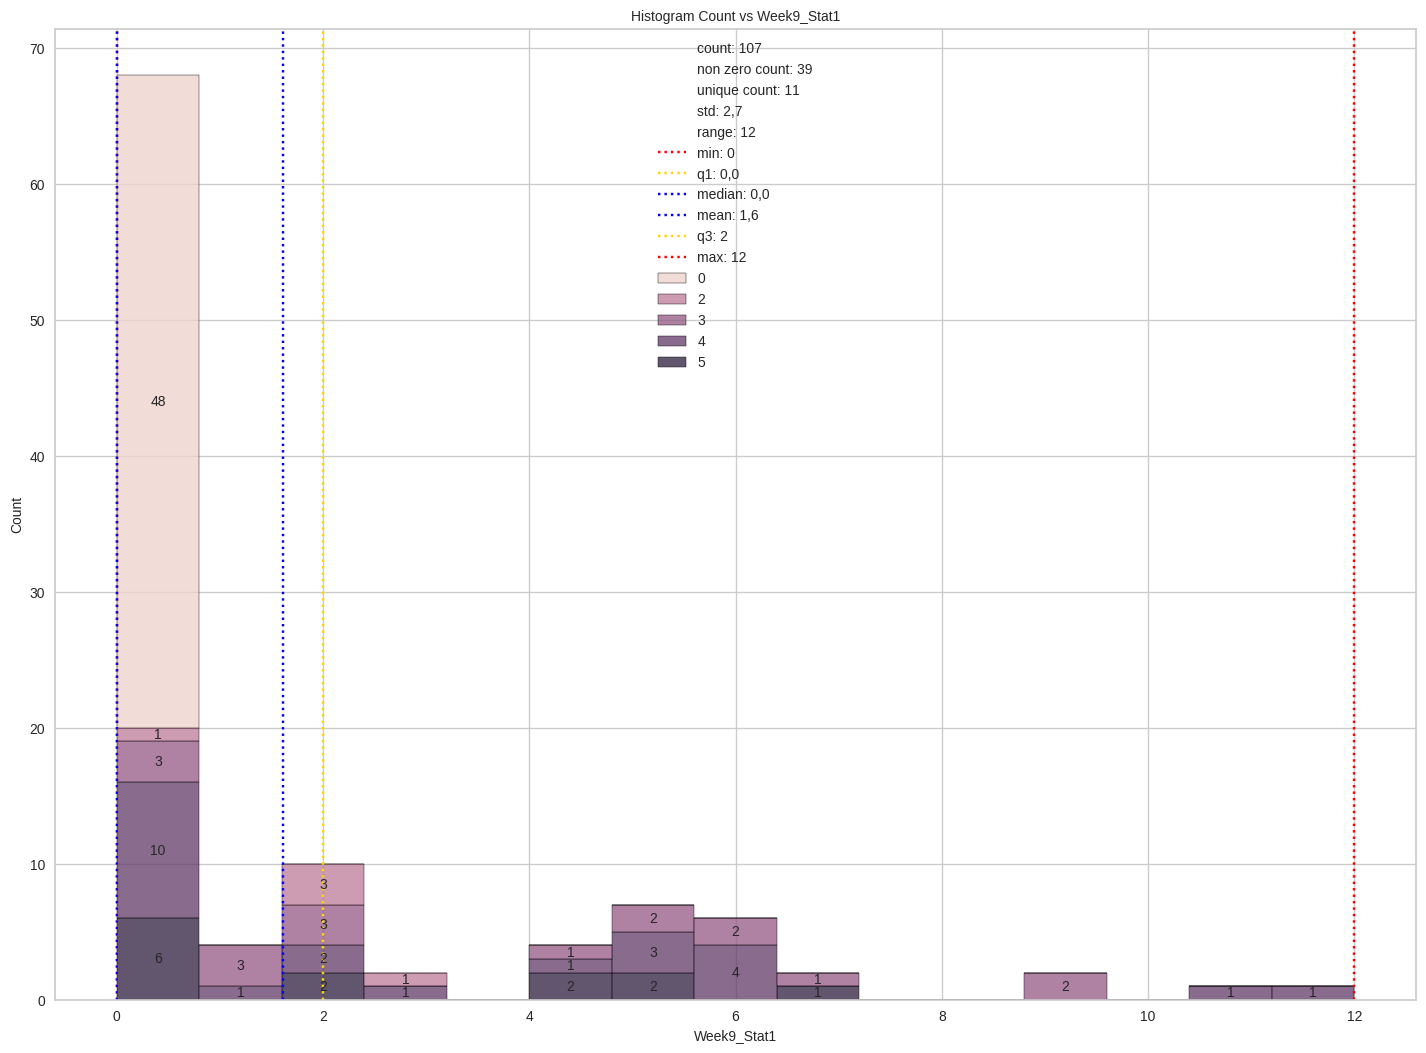

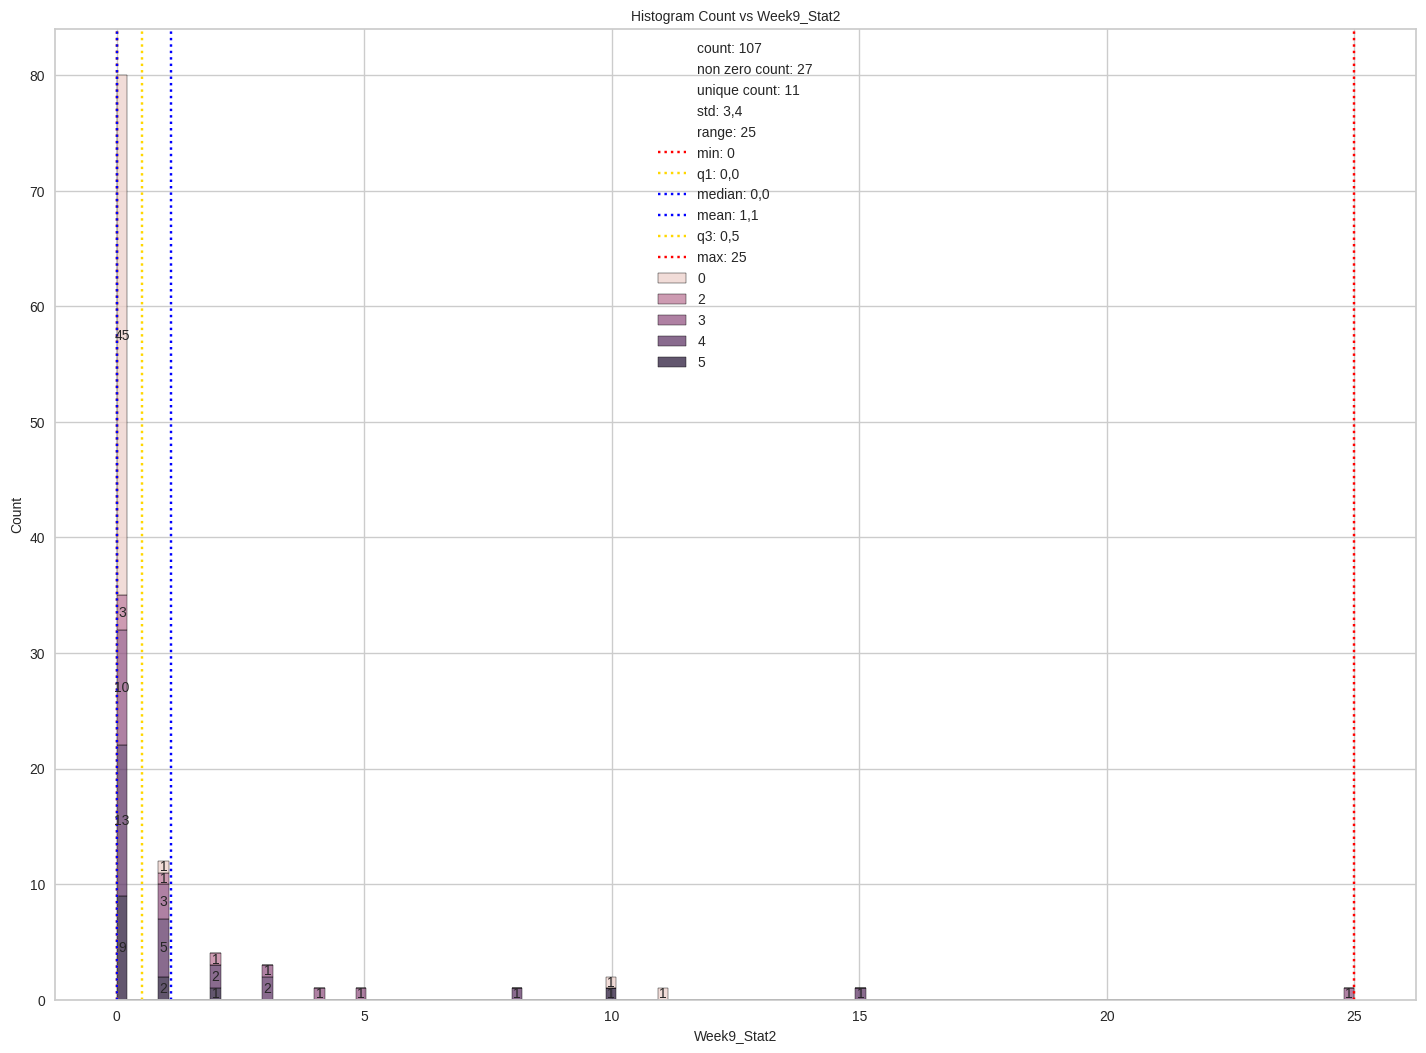

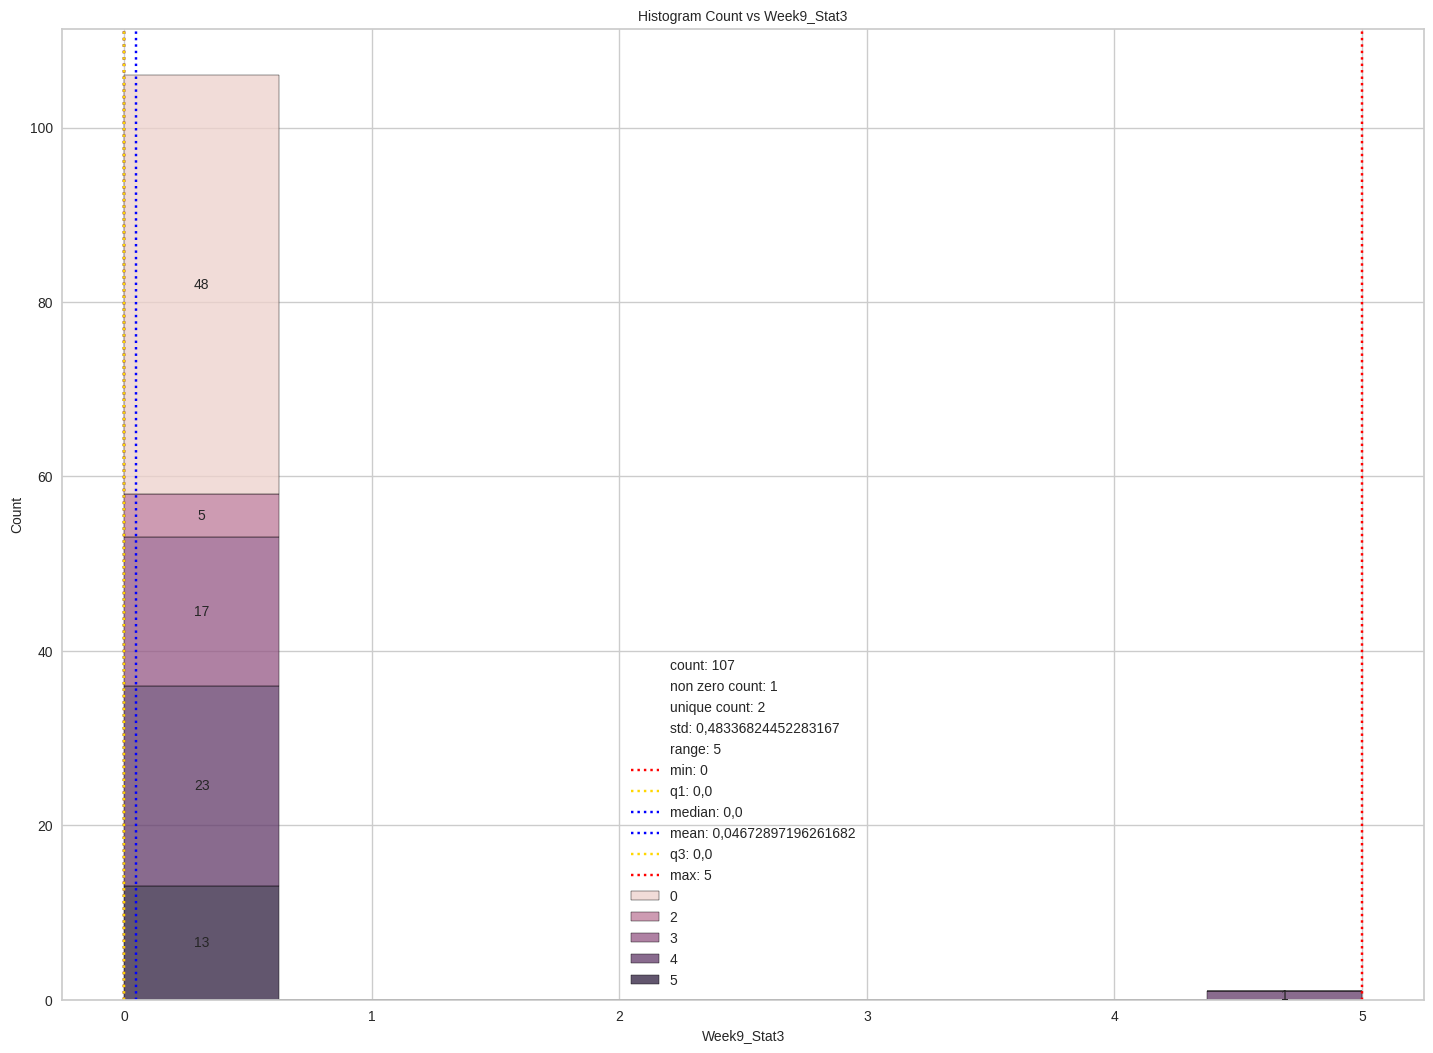

In [21]:
from grplot import plot2d
import grplot_seaborn as gs

for data in numerical_features:
  ax = plot2d(plot='histplot',
            df=df,
            x=data,
            hue=df["Grade"],
            figsize = [16,12],
            xsep='.',
            ysep='.',
            statdesc={data:'general'},
            xtick_add='(_)',
            ytext='h',
            title='Histogram Count vs '+str(data),
            multiple='stack',
            kde=False,
            saveas='Histogram Count vs '+str(data),
            alpha=0.75)

Iterate from top 13 Grades features to 2 features, and the best is with 5 features only, that's why we are using it.

In [22]:
number_of_selected_features = 5
notable_feature = feature_names[0:number_of_selected_features]
notable_feature

Index(['All_Score', 'All_MP', 'Week7_MP3', 'All_PR', 'All_Quiz'], dtype='object')

Verifying correlation between variables

In [23]:
# Compute the correlation between labels and each feature
correlations = df.corrwith(df["Grade"])

# Sort the correlations in descending order
sorted_correlations = correlations.sort_values(ascending=False)

# Print the sorted correlations for each feature
print("Correlations between labels and features (sorted):")
print(sorted_correlations)

Correlations between labels and features (sorted):
Grade          1.000000
All_MP         0.981128
All_Score      0.972348
Week7_MP3      0.968130
Week5_MP2      0.953488
All_PR         0.925995
Week5_PR2      0.907837
Week3_MP1      0.901788
Week3_PR1      0.887352
Week7_PR3      0.865616
All_Quiz       0.850059
Week6_Quiz3    0.849920
Week4_Quiz2    0.810920
Week6_Stat1    0.771988
Week2_Quiz1    0.689783
Week4_Stat1    0.662946
Week3_Stat0    0.643789
Week6_Stat0    0.635807
Week4_Stat0    0.625359
Week3_Stat1    0.596824
Week5_Stat0    0.590146
Week8_Stat1    0.584425
Week9_Stat0    0.545532
Week9_Stat1    0.496753
Week5_Stat1    0.484030
Week8_Stat0    0.450807
Week7_Stat3    0.439733
Week7_Stat1    0.424807
Week2_Stat1    0.406120
Week7_Stat0    0.377195
Week2_Stat0    0.293296
Week2_Stat2    0.292262
Week6_Stat2    0.288761
Week4_Stat3    0.278034
Week6_Stat3    0.270239
Week5_Stat3    0.264079
Week1_Stat0    0.256311
Week8_Stat3    0.234907
Week3_Stat3    0.227106
Week2_Stat3  

In [24]:
# Filter the features with correlation greater than 0.5
highly_5_correlated_features = correlations[correlations > 0.5]

# Sort the correlations in descending order
sorted_highly_5_correlations = highly_5_correlated_features.sort_values(ascending=False)
highly_5_correlated_features = sorted_highly_5_correlations.index
highly_5_correlated_features = highly_5_correlated_features[1:]

# Filter the features with correlation greater than 0.6
highly_6_correlated_features = correlations[correlations > 0.6]

# Sort the correlations in descending order
sorted_highly_6_correlations = highly_6_correlated_features.sort_values(ascending=False)
highly_6_correlated_features = sorted_highly_6_correlations.index
highly_6_correlated_features = highly_6_correlated_features[1:]

# Filter the features with correlation greater than 0.7
highly_7_correlated_features = correlations[correlations > 0.7]

# Sort the correlations in descending order
sorted_highly_7_correlations = highly_7_correlated_features.sort_values(ascending=False)
highly_7_correlated_features = sorted_highly_7_correlations.index
highly_7_correlated_features = highly_7_correlated_features[1:]

# Filter the features with correlation greater than 0.8
highly_8_correlated_features = correlations[correlations > 0.8]

# Sort the correlations in descending order
sorted_highly_8_correlations = highly_8_correlated_features.sort_values(ascending=False)
highly_8_correlated_features = sorted_highly_8_correlations.index
highly_8_correlated_features = highly_8_correlated_features[1:]

# Filter the features with correlation greater than 0.9
highly_9_correlated_features = correlations[correlations > 0.9]

# Sort the correlations in descending order
sorted_highly_9_correlations = highly_9_correlated_features.sort_values(ascending=False)
highly_9_correlated_features = sorted_highly_9_correlations.index
highly_9_correlated_features = highly_9_correlated_features[1:]

In [25]:
highly_6_correlated_features

Index(['All_MP', 'All_Score', 'Week7_MP3', 'Week5_MP2', 'All_PR', 'Week5_PR2',
       'Week3_MP1', 'Week3_PR1', 'Week7_PR3', 'All_Quiz', 'Week6_Quiz3',
       'Week4_Quiz2', 'Week6_Stat1', 'Week2_Quiz1', 'Week4_Stat1',
       'Week3_Stat0', 'Week6_Stat0', 'Week4_Stat0'],
      dtype='object')

In [26]:
highly_5_correlated_features

Index(['All_MP', 'All_Score', 'Week7_MP3', 'Week5_MP2', 'All_PR', 'Week5_PR2',
       'Week3_MP1', 'Week3_PR1', 'Week7_PR3', 'All_Quiz', 'Week6_Quiz3',
       'Week4_Quiz2', 'Week6_Stat1', 'Week2_Quiz1', 'Week4_Stat1',
       'Week3_Stat0', 'Week6_Stat0', 'Week4_Stat0', 'Week3_Stat1',
       'Week5_Stat0', 'Week8_Stat1', 'Week9_Stat0'],
      dtype='object')

In [27]:
df_05 = df[highly_5_correlated_features]
df_05.head()

All_MP  All_Score  Week7_MP3  Week5_MP2  All_PR  Week5_PR2  Week3_MP1  \
0   52.97      82.97      21.88      16.09   15.00       5.00       15.0   
1   55.10      82.43      22.27      17.83   15.00       5.00       15.0   
2   55.27      79.44      27.05      15.22   12.50       5.00       13.0   
3   55.02      80.65      31.02      10.00   15.00       5.00       14.0   
4   43.08      67.68      15.91      12.17   14.93       4.93       15.0   

   Week3_PR1  Week7_PR3  All_Quiz  Week6_Quiz3  Week4_Quiz2  Week6_Stat1  \
0        5.0        5.0     15.00          5.0         5.00           30   
1        5.0        5.0     12.33          5.0         4.00           22   
2        5.0        2.5     11.67          5.0         5.00           20   
3        5.0        5.0     10.63          5.0         3.13           19   
4        5.0        5.0      9.67          5.0         4.67           18   

   Week2_Quiz1  Week4_Stat1  Week3_Stat0  Week6_Stat0  Week4_Stat0  \
0         5.00           39           30           28           14   
1         3.33           16          100           57          130   
2         1.67           19           25           14           50   
3         2.50           27           79           99          240   
4         0.00           15           27           22            6   

   Week3_Stat1  Week5_Stat0  Week8_Stat1  Week9_Stat0  
0            4           24            4            8  
1            4           48            2           25  
2            4           28            2            9  
3            4           47            0            7  
4            5           32            5            5

In [28]:
df_06 = df[highly_6_correlated_features]
df_06.head()

All_MP  All_Score  Week7_MP3  Week5_MP2  All_PR  Week5_PR2  Week3_MP1  \
0   52.97      82.97      21.88      16.09   15.00       5.00       15.0   
1   55.10      82.43      22.27      17.83   15.00       5.00       15.0   
2   55.27      79.44      27.05      15.22   12.50       5.00       13.0   
3   55.02      80.65      31.02      10.00   15.00       5.00       14.0   
4   43.08      67.68      15.91      12.17   14.93       4.93       15.0   

   Week3_PR1  Week7_PR3  All_Quiz  Week6_Quiz3  Week4_Quiz2  Week6_Stat1  \
0        5.0        5.0     15.00          5.0         5.00           30   
1        5.0        5.0     12.33          5.0         4.00           22   
2        5.0        2.5     11.67          5.0         5.00           20   
3        5.0        5.0     10.63          5.0         3.13           19   
4        5.0        5.0      9.67          5.0         4.67           18   

   Week2_Quiz1  Week4_Stat1  Week3_Stat0  Week6_Stat0  Week4_Stat0  
0         5.00           39           30           28           14  
1         3.33           16          100           57          130  
2         1.67           19           25           14           50  
3         2.50           27           79           99          240  
4         0.00           15           27           22            6

In [29]:
df_07 = df[highly_7_correlated_features]
df_07.head()

All_MP  All_Score  Week7_MP3  Week5_MP2  All_PR  Week5_PR2  Week3_MP1  \
0   52.97      82.97      21.88      16.09   15.00       5.00       15.0   
1   55.10      82.43      22.27      17.83   15.00       5.00       15.0   
2   55.27      79.44      27.05      15.22   12.50       5.00       13.0   
3   55.02      80.65      31.02      10.00   15.00       5.00       14.0   
4   43.08      67.68      15.91      12.17   14.93       4.93       15.0   

   Week3_PR1  Week7_PR3  All_Quiz  Week6_Quiz3  Week4_Quiz2  Week6_Stat1  
0        5.0        5.0     15.00          5.0         5.00           30  
1        5.0        5.0     12.33          5.0         4.00           22  
2        5.0        2.5     11.67          5.0         5.00           20  
3        5.0        5.0     10.63          5.0         3.13           19  
4        5.0        5.0      9.67          5.0         4.67           18

In [30]:
df_08 = df[highly_8_correlated_features]
df_08.head()

All_MP  All_Score  Week7_MP3  Week5_MP2  All_PR  Week5_PR2  Week3_MP1  \
0   52.97      82.97      21.88      16.09   15.00       5.00       15.0   
1   55.10      82.43      22.27      17.83   15.00       5.00       15.0   
2   55.27      79.44      27.05      15.22   12.50       5.00       13.0   
3   55.02      80.65      31.02      10.00   15.00       5.00       14.0   
4   43.08      67.68      15.91      12.17   14.93       4.93       15.0   

   Week3_PR1  Week7_PR3  All_Quiz  Week6_Quiz3  Week4_Quiz2  
0        5.0        5.0     15.00          5.0         5.00  
1        5.0        5.0     12.33          5.0         4.00  
2        5.0        2.5     11.67          5.0         5.00  
3        5.0        5.0     10.63          5.0         3.13  
4        5.0        5.0      9.67          5.0         4.67

In [31]:
df_09 = df[highly_9_correlated_features]
df_09.head()

All_MP  All_Score  Week7_MP3  Week5_MP2  All_PR  Week5_PR2  Week3_MP1
0   52.97      82.97      21.88      16.09   15.00       5.00       15.0
1   55.10      82.43      22.27      17.83   15.00       5.00       15.0
2   55.27      79.44      27.05      15.22   12.50       5.00       13.0
3   55.02      80.65      31.02      10.00   15.00       5.00       14.0
4   43.08      67.68      15.91      12.17   14.93       4.93       15.0

In [32]:
df_notable = df[notable_feature]
df_notable.head()

All_Score  All_MP  Week7_MP3  All_PR  All_Quiz
0      82.97   52.97      21.88   15.00     15.00
1      82.43   55.10      22.27   15.00     12.33
2      79.44   55.27      27.05   12.50     11.67
3      80.65   55.02      31.02   15.00     10.63
4      67.68   43.08      15.91   14.93      9.67

In [33]:
df_all = df.drop(['Grade'], axis=1)
df_all.head()

All_Score  All_MP  Week7_MP3  All_PR  All_Quiz  Week5_MP2  Week3_MP1  \
0      82.97   52.97      21.88   15.00     15.00      16.09       15.0   
1      82.43   55.10      22.27   15.00     12.33      17.83       15.0   
2      79.44   55.27      27.05   12.50     11.67      15.22       13.0   
3      80.65   55.02      31.02   15.00     10.63      10.00       14.0   
4      67.68   43.08      15.91   14.93      9.67      12.17       15.0   

   Week3_PR1  Week5_PR2  Week7_PR3  Week2_Quiz1  Week4_Quiz2  Week6_Quiz3  \
0        5.0       5.00        5.0         5.00         5.00          5.0   
1        5.0       5.00        5.0         3.33         4.00          5.0   
2        5.0       5.00        2.5         1.67         5.00          5.0   
3        5.0       5.00        5.0         2.50         3.13          5.0   
4        5.0       4.93        5.0         0.00         4.67          5.0   

   Week1_Stat0  Week1_Stat2  Week1_Stat3  Week2_Stat0  Week2_Stat1  \
0            0            0            0            7           30   
1            8            0            0           61           10   
2            4            0            0           19           10   
3           12            0            1           30           10   
4            6            0            0            0            0   

   Week2_Stat2  Week2_Stat3  Week3_Stat0  Week3_Stat1  Week3_Stat2  \
0            1            0           30            4            0   
1            3            8          100            4            4   
2            3            3           25            4            0   
3            1            6           79            4            2   
4            0            0           27            5            0   

   Week3_Stat3  Week4_Stat0  Week4_Stat1  Week4_Stat2  Week4_Stat3  \
0            0           14           39            2            0   
1            3          130           16            1            4   
2            2           50           19            2            2   
3            2          240           27            2            1   
4            0            6           15            1            0   

   Week5_Stat0  Week5_Stat1  Week5_Stat2  Week5_Stat3  Week6_Stat0  \
0           24            6            1            0           28   
1           48           19            5            5           57   
2           28            6            0            2           14   
3           47            4            3            1           99   
4           32           12            0            8           22   

   Week6_Stat1  Week6_Stat2  Week6_Stat3  Week7_Stat0  Week7_Stat1  \
0           30            2            0            2            0   
1           22            2            4           31            9   
2           20            2            0           12            4   
3           19            4            0           29            4   
4           18            1            2           43            4   

   Week7_Stat2  Week7_Stat3  Week8_Stat0  Week8_Stat1  Week8_Stat2  \
0            1            0            5            4            0   
1            0            8            5            2            0   
2            0            0            8            2            0   
3            5            4           10            0            0   
4            3            6            8            5            1   

   Week8_Stat3  Week9_Stat0  Week9_Stat1  Week9_Stat2  Week9_Stat3  
0            4            8            6            1            0  
1            0           25            3            2            5  
2            0            9            0            1            0  
3            0            7            6            0            0  
4            1            5            3            1            0

Selecting columns with correlation > 0.5, 0.6, 0.7, 0.8, 0.9 and Notable

- We chose the features that had more correlation in order to improve the model prediction performance.
- The floating number indicates the minimum correlation between features and label.
- The Notable features indicate the most important feature based on the definitions, in this case, I believe grades are the most important features. Since it doesn't matter when someone open the lecture, but didn't achieve the grade because late submission or probably didn't intend to do it compared to other who complete all the task while didn't click on any lecture.
- Last but not least, I will still compared with using all features, to determine whether the feature selection is effective or not.

## Preprocessing selected data

### Train Test Split

In [34]:
random_seed = 42
# Only selected features
X_train_5, X_test_5, y_train, y_test = train_test_split(df_05, df["Grade"], test_size=0.20, random_state=random_seed)
# Only selected features
X_train_6, X_test_6, y_train, y_test = train_test_split(df_06, df["Grade"], test_size=0.20, random_state=random_seed)
# Only selected features
X_train_7, X_test_7, y_train, y_test = train_test_split(df_07, df["Grade"], test_size=0.20, random_state=random_seed)
# Only selected features
X_train_8, X_test_8, y_train, y_test = train_test_split(df_08, df["Grade"], test_size=0.20, random_state=random_seed)
# Only selected features
X_train_9, X_test_9, y_train, y_test = train_test_split(df_09, df["Grade"], test_size=0.20, random_state=random_seed)
# Only selected features
X_train_0, X_test_0, y_train, y_test = train_test_split(df_notable, df["Grade"], test_size=0.20, random_state=random_seed)
# All features
X_train, X_test, y_train, y_test = train_test_split(df_all, df["Grade"], test_size=0.20, random_state=random_seed)

Standardizing the data

In [35]:
def standardize_data(features):
    scaler = StandardScaler().fit(features)
    return scaler

def transform_data(scaler, X_train, X_test):
    X_train_transform = scaler.transform(X_train)
    X_test_transform = scaler.transform(X_test)
    return X_train_transform, X_test_transform

In [36]:
# Selected features
scaler_selected_5 = standardize_data(X_train_5)
X_train_transform_5, X_test_transform_5 = transform_data(scaler_selected_5, X_train_5, X_test_5)

# Selected features
scaler_selected_6 = standardize_data(X_train_6)
X_train_transform_6, X_test_transform_6 = transform_data(scaler_selected_6, X_train_6, X_test_6)

# Selected features
scaler_selected_7 = standardize_data(X_train_7)
X_train_transform_7, X_test_transform_7 = transform_data(scaler_selected_7, X_train_7, X_test_7)

# Selected features
scaler_selected_8 = standardize_data(X_train_8)
X_train_transform_8, X_test_transform_8 = transform_data(scaler_selected_8, X_train_8, X_test_8)

# Selected features
scaler_selected_9 = standardize_data(X_train_9)
X_train_transform_9, X_test_transform_9 = transform_data(scaler_selected_9, X_train_9, X_test_9)

# Selected features
scaler_selected_0 = standardize_data(X_train_0)
X_train_transform_0, X_test_transform_0 = transform_data(scaler_selected_0, X_train_0, X_test_0)

# All features
scaler_selected = standardize_data(X_train)
X_train_transform, X_test_transform = transform_data(scaler_selected, X_train, X_test)

Evaluating Results

In [37]:
def Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test, average='weighted'):
  # Training Model
  model.fit(X_train, y_train)
  # Model making a prediction on test data
  y_pred = model.predict(X_test)

  n_kfold = 10
  random_seed = 42

  kf = StratifiedKFold(n_splits=n_kfold, shuffle=True, random_state=random_seed)

  cv_score_accuracy = cross_val_score(estimator = model, X = X_train, y = y_train, cv = kf, scoring = "accuracy")
  cv_score_fmacro = cross_val_score(estimator = model, X = X_train, y = y_train, cv = kf, scoring = "f1_macro")
  cv_score_fweighted = cross_val_score(estimator = model, X = X_train, y = y_train, cv = kf, scoring = "f1_weighted")

  cv_acc = cv_score_accuracy.mean()
  cv_fmacro = cv_score_fmacro.mean()
  cv_fweighted = cv_score_fweighted.mean()

  metrics = {}

  # Accuracy
  metrics['Accuracy'] = accuracy_score(y_test, y_pred)

  # Precision
  metrics['Precision'] = precision_score(y_test, y_pred, average=average)

  # Recall
  metrics['Recall'] = recall_score(y_test, y_pred, average=average)

  # F1-Score Macro
  metrics['F1-Macro'] = f1_score(y_test, y_pred, average="macro")

  # F1-Score Weighted
  metrics['F1-Weighted'] = f1_score(y_test, y_pred, average=average)

  # Confusion Matrix
  metrics['Confusion Matrix'] = confusion_matrix(y_test, y_pred).tolist()

  # Cross Validation Score
  metrics['CV Accuracy'] = cv_acc.mean()
  metrics['CV F1 Macro'] = cv_fmacro.mean()
  metrics['CV F1 Weighted'] = cv_fweighted.mean()

  return model, cv_score_accuracy, cv_score_fmacro, cv_score_fweighted, metrics

In [38]:
def plot_confussion_matrix(data, model, feature_selection):
  # Define class labels (assuming they are class 0, 2, 3, 4, 5)
  class_labels = [0, 2, 3, 4, 5]

  # Create a confusion matrix plot
  sns.set(font_scale=1.2)  # Set font size
  plt.figure(figsize=(8, 6))
  sns.heatmap(data, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels, cbar=False)
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix "+str(model)+" "+ str(feature_selection))
  plt.show()

# Training Models

In [39]:
# Initiate Empty Data Frame
All_Result = pd.DataFrame()
cv_accuracy = pd.DataFrame()
cv_fmacro = pd.DataFrame()
cv_fweighted = pd.DataFrame()

## Logistic Regression

In [40]:
model = "Logistic Regression"

With all features

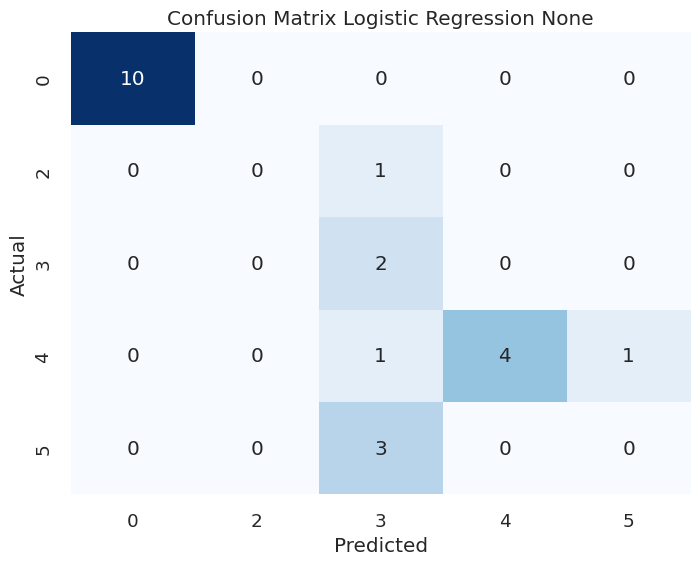

Feature Selection                Model  Accuracy  Precision    Recall  \
0              None  Logistic Regression  0.727273   0.753247  0.727273   

   F1-Macro  F1-Weighted  \
0  0.448889     0.713131   

                                                                         Confusion Matrix  \
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 4, 1], [0, 0, 3, 0, 0]]   

   CV Accuracy  CV F1 Macro  CV F1 Weighted  
0     0.704167     0.503167        0.667315

In [41]:
Logistic_model = LogisticRegression(random_state = 0)
temp = Models_Evaluation_Metrics(Logistic_model,X_train_transform,y_train,X_test_transform,y_test)
Logistic_model_all = temp[0]
result = [temp[-1]]
temp_result = pd.DataFrame(data = result)
feature_selection = "None"
cv_accuracy[str(model)+" "+str(feature_selection)] = temp[1]
cv_fmacro[str(model)+" "+str(feature_selection)] = temp[2]
cv_fweighted[str(model)+" "+str(feature_selection)] = temp[3]
temp_result.insert(0, 'Model', model)
temp_result.insert(0, 'Feature Selection', feature_selection)
plot_confussion_matrix(temp[-1]["Confusion Matrix"], model, feature_selection)
All_Result = pd.concat([All_Result, temp_result])
print()
All_Result

With selected features

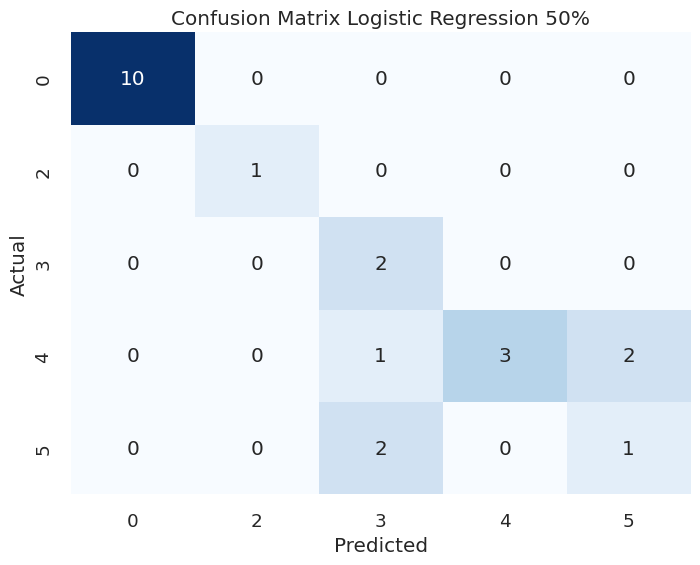

Feature Selection                Model  Accuracy  Precision    Recall  \
0              None  Logistic Regression  0.727273   0.753247  0.727273   
0               50%  Logistic Regression  0.772727   0.854545  0.772727   

   F1-Macro  F1-Weighted  \
0  0.448889     0.713131   
0  0.714286     0.779221   

                                                                         Confusion Matrix  \
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 4, 1], [0, 0, 3, 0, 0]]   
0  [[10, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 3, 2], [0, 0, 2, 0, 1]]   

   CV Accuracy  CV F1 Macro  CV F1 Weighted  
0     0.704167     0.503167        0.667315  
0     0.688889     0.541310        0.668552

In [42]:
Logistic_model = LogisticRegression(random_state = 0)
temp = Models_Evaluation_Metrics(Logistic_model,X_train_transform_5,y_train,X_test_transform_5,y_test)
Logistic_model_50 = temp[0]
result = temp[-1]
temp_result = pd.DataFrame(data = [result])
feature_selection = "50%"
cv_accuracy[str(model)+" "+str(feature_selection)] = temp[1]
cv_fmacro[str(model)+" "+str(feature_selection)] = temp[2]
cv_fweighted[str(model)+" "+str(feature_selection)] = temp[3]
temp_result.insert(0, 'Model', model)
temp_result.insert(0, 'Feature Selection', feature_selection)
plot_confussion_matrix(temp[-1]["Confusion Matrix"], model, feature_selection)
All_Result = pd.concat([All_Result, temp_result])
All_Result

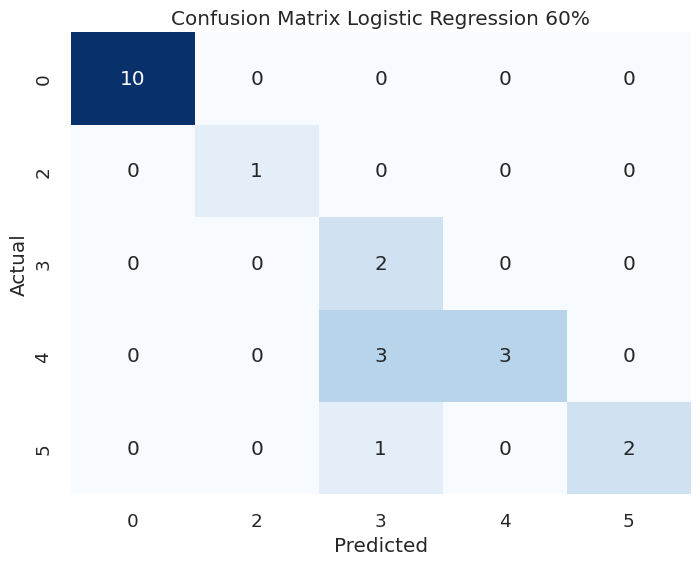

Feature Selection                Model  Accuracy  Precision    Recall  \
0              None  Logistic Regression  0.727273   0.753247  0.727273   
0               50%  Logistic Regression  0.772727   0.854545  0.772727   
0               60%  Logistic Regression  0.818182   0.939394  0.818182   

   F1-Macro  F1-Weighted  \
0  0.448889     0.713131   
0  0.714286     0.779221   
0  0.793333     0.836364   

                                                                         Confusion Matrix  \
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 4, 1], [0, 0, 3, 0, 0]]   
0  [[10, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 3, 2], [0, 0, 2, 0, 1]]   
0  [[10, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 2, 0, 0], [0, 0, 3, 3, 0], [0, 0, 1, 0, 2]]   

   CV Accuracy  CV F1 Macro  CV F1 Weighted  
0     0.704167     0.503167        0.667315  
0     0.688889     0.541310        0.668552  
0     0.748611     0.621310        0.727255

In [43]:
Logistic_model = LogisticRegression()
temp = Models_Evaluation_Metrics(Logistic_model,X_train_transform_6,y_train,X_test_transform_6,y_test)
Logistic_model_60 = temp[0]
result = temp[-1]
temp_result = pd.DataFrame(data = [result])
feature_selection = "60%"
cv_accuracy[str(model)+" "+str(feature_selection)] = temp[1]
cv_fmacro[str(model)+" "+str(feature_selection)] = temp[2]
cv_fweighted[str(model)+" "+str(feature_selection)] = temp[3]
temp_result.insert(0, 'Model', model)
temp_result.insert(0, 'Feature Selection', feature_selection)
plot_confussion_matrix(temp[-1]["Confusion Matrix"], model, feature_selection)
All_Result = pd.concat([All_Result, temp_result])
All_Result

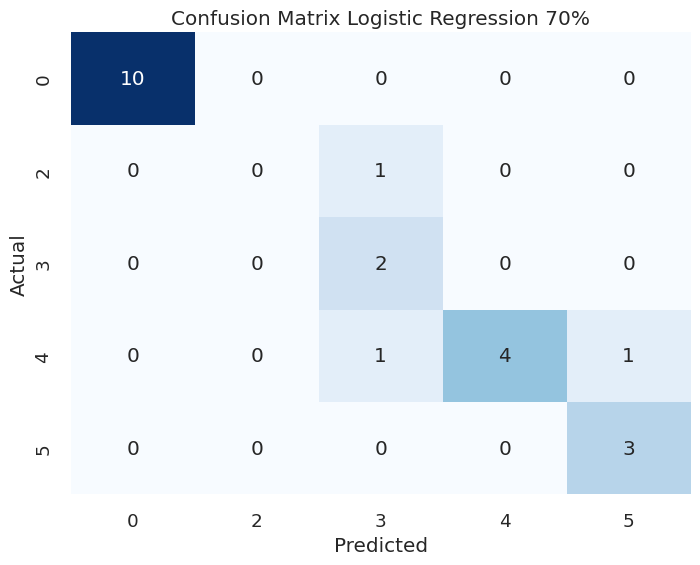

Feature Selection                Model  Accuracy  Precision    Recall  \
0              None  Logistic Regression  0.727273   0.753247  0.727273   
0               50%  Logistic Regression  0.772727   0.854545  0.772727   
0               60%  Logistic Regression  0.818182   0.939394  0.818182   
0               70%  Logistic Regression  0.863636   0.875000  0.863636   

   F1-Macro  F1-Weighted  \
0  0.448889     0.713131   
0  0.714286     0.779221   
0  0.793333     0.836364   
0  0.664762     0.850216   

                                                                         Confusion Matrix  \
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 4, 1], [0, 0, 3, 0, 0]]   
0  [[10, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 3, 2], [0, 0, 2, 0, 1]]   
0  [[10, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 2, 0, 0], [0, 0, 3, 3, 0], [0, 0, 1, 0, 2]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 4, 1], [0, 0, 0, 0, 3]]   

   CV Accuracy  CV F1 Macro  CV F1 Weighted  
0     0.704167     0.503167        0.667315  
0     0.688889     0.541310        0.668552  
0     0.748611     0.621310        0.727255  
0     0.798611     0.680476        0.770542

In [44]:
Logistic_model = LogisticRegression()
temp = Models_Evaluation_Metrics(Logistic_model,X_train_transform_7,y_train,X_test_transform_7,y_test)
Logistic_model_70 = temp[0]
result = temp[-1]
temp_result = pd.DataFrame(data = [result])
feature_selection = "70%"
cv_accuracy[str(model)+" "+str(feature_selection)] = temp[1]
cv_fmacro[str(model)+" "+str(feature_selection)] = temp[2]
cv_fweighted[str(model)+" "+str(feature_selection)] = temp[3]
temp_result.insert(0, 'Model', model)
temp_result.insert(0, 'Feature Selection', feature_selection)
plot_confussion_matrix(temp[-1]["Confusion Matrix"], model, feature_selection)
All_Result = pd.concat([All_Result, temp_result])
All_Result

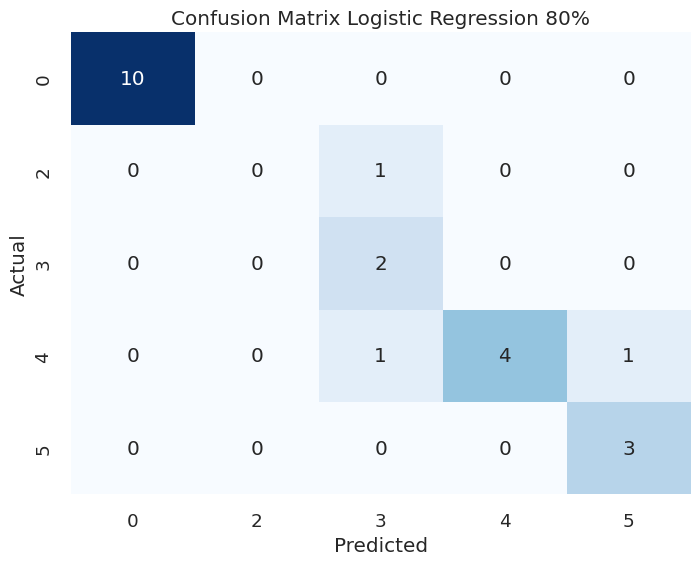

Feature Selection                Model  Accuracy  Precision    Recall  \
0              None  Logistic Regression  0.727273   0.753247  0.727273   
0               50%  Logistic Regression  0.772727   0.854545  0.772727   
0               60%  Logistic Regression  0.818182   0.939394  0.818182   
0               70%  Logistic Regression  0.863636   0.875000  0.863636   
0               80%  Logistic Regression  0.863636   0.875000  0.863636   

   F1-Macro  F1-Weighted  \
0  0.448889     0.713131   
0  0.714286     0.779221   
0  0.793333     0.836364   
0  0.664762     0.850216   
0  0.664762     0.850216   

                                                                         Confusion Matrix  \
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 4, 1], [0, 0, 3, 0, 0]]   
0  [[10, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 3, 2], [0, 0, 2, 0, 1]]   
0  [[10, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 2, 0, 0], [0, 0, 3, 3, 0], [0, 0, 1, 0, 2]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 4, 1], [0, 0, 0, 0, 3]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 4, 1], [0, 0, 0, 0, 3]]   

   CV Accuracy  CV F1 Macro  CV F1 Weighted  
0     0.704167     0.503167        0.667315  
0     0.688889     0.541310        0.668552  
0     0.748611     0.621310        0.727255  
0     0.798611     0.680476        0.770542  
0     0.787500     0.660476        0.752765

In [45]:
Logistic_model = LogisticRegression(random_state = 0)
temp = Models_Evaluation_Metrics(Logistic_model,X_train_transform_8,y_train,X_test_transform_8,y_test)
Logistic_model_80 = temp[0]
result = temp[-1]
temp_result = pd.DataFrame(data = [result])
feature_selection = "80%"
cv_accuracy[str(model)+" "+str(feature_selection)] = temp[1]
cv_fmacro[str(model)+" "+str(feature_selection)] = temp[2]
cv_fweighted[str(model)+" "+str(feature_selection)] = temp[3]
temp_result.insert(0, 'Model', model)
temp_result.insert(0, 'Feature Selection', feature_selection)
plot_confussion_matrix(temp[-1]["Confusion Matrix"], model, feature_selection)
All_Result = pd.concat([All_Result, temp_result])
All_Result

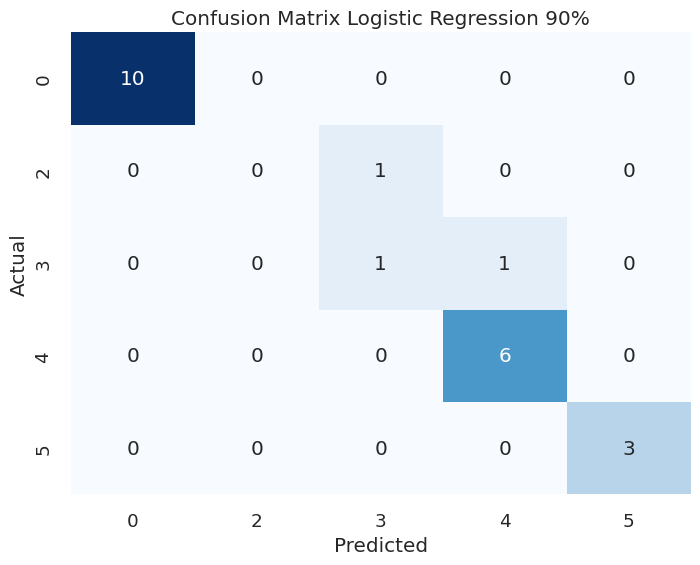

Feature Selection                Model  Accuracy  Precision    Recall  \
0              None  Logistic Regression  0.727273   0.753247  0.727273   
0               50%  Logistic Regression  0.772727   0.854545  0.772727   
0               60%  Logistic Regression  0.818182   0.939394  0.818182   
0               70%  Logistic Regression  0.863636   0.875000  0.863636   
0               80%  Logistic Regression  0.863636   0.875000  0.863636   
0               90%  Logistic Regression  0.909091   0.870130  0.909091   

   F1-Macro  F1-Weighted  \
0  0.448889     0.713131   
0  0.714286     0.779221   
0  0.793333     0.836364   
0  0.664762     0.850216   
0  0.664762     0.850216   
0  0.684615     0.888112   

                                                                         Confusion Matrix  \
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 4, 1], [0, 0, 3, 0, 0]]   
0  [[10, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 3, 2], [0, 0, 2, 0, 1]]   
0  [[10, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 2, 0, 0], [0, 0, 3, 3, 0], [0, 0, 1, 0, 2]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 4, 1], [0, 0, 0, 0, 3]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 4, 1], [0, 0, 0, 0, 3]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 1, 1, 0], [0, 0, 0, 6, 0], [0, 0, 0, 0, 3]]   

   CV Accuracy  CV F1 Macro  CV F1 Weighted  
0     0.704167     0.503167        0.667315  
0     0.688889     0.541310        0.668552  
0     0.748611     0.621310        0.727255  
0     0.798611     0.680476        0.770542  
0     0.787500     0.660476        0.752765  
0     0.783333     0.653976        0.747718

In [46]:
Logistic_model = LogisticRegression(random_state = 0)
temp = Models_Evaluation_Metrics(Logistic_model,X_train_transform_9,y_train,X_test_transform_9,y_test)
Logistic_model_90 = temp[0]
result = temp[-1]
temp_result = pd.DataFrame(data = [result])
feature_selection = "90%"
cv_accuracy[str(model)+" "+str(feature_selection)] = temp[1]
cv_fmacro[str(model)+" "+str(feature_selection)] = temp[2]
cv_fweighted[str(model)+" "+str(feature_selection)] = temp[3]
temp_result.insert(0, 'Model', model)
temp_result.insert(0, 'Feature Selection', feature_selection)
plot_confussion_matrix(temp[-1]["Confusion Matrix"], model, feature_selection)
All_Result = pd.concat([All_Result, temp_result])
All_Result

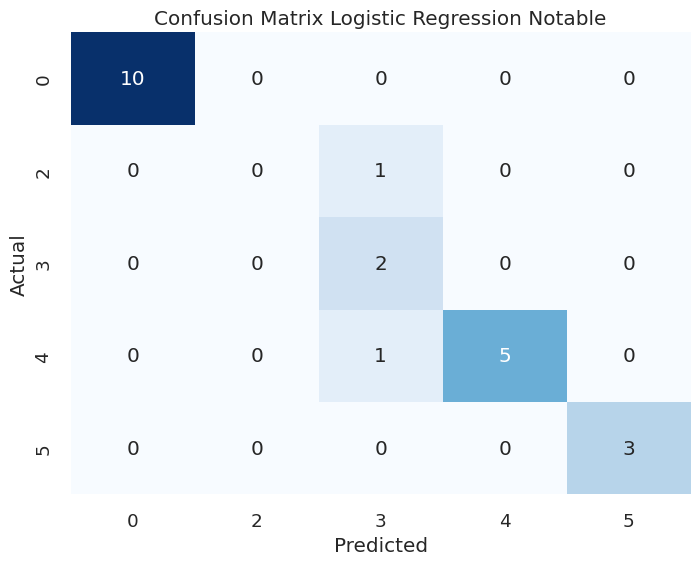

Feature Selection                Model  Accuracy  Precision    Recall  \
0              None  Logistic Regression  0.727273   0.753247  0.727273   
0               50%  Logistic Regression  0.772727   0.854545  0.772727   
0               60%  Logistic Regression  0.818182   0.939394  0.818182   
0               70%  Logistic Regression  0.863636   0.875000  0.863636   
0               80%  Logistic Regression  0.863636   0.875000  0.863636   
0               90%  Logistic Regression  0.909091   0.870130  0.909091   
0           Notable  Logistic Regression  0.909091   0.909091  0.909091   

   F1-Macro  F1-Weighted  \
0  0.448889     0.713131   
0  0.714286     0.779221   
0  0.793333     0.836364   
0  0.664762     0.850216   
0  0.664762     0.850216   
0  0.684615     0.888112   
0  0.715152     0.899449   

                                                                         Confusion Matrix  \
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 4, 1], [0, 0, 3, 0, 0]]   
0  [[10, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 3, 2], [0, 0, 2, 0, 1]]   
0  [[10, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 2, 0, 0], [0, 0, 3, 3, 0], [0, 0, 1, 0, 2]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 4, 1], [0, 0, 0, 0, 3]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 4, 1], [0, 0, 0, 0, 3]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 1, 1, 0], [0, 0, 0, 6, 0], [0, 0, 0, 0, 3]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 5, 0], [0, 0, 0, 0, 3]]   

   CV Accuracy  CV F1 Macro  CV F1 Weighted  
0     0.704167     0.503167        0.667315  
0     0.688889     0.541310        0.668552  
0     0.748611     0.621310        0.727255  
0     0.798611     0.680476        0.770542  
0     0.787500     0.660476        0.752765  
0     0.783333     0.653976        0.747718  
0     0.798611     0.659167        0.757778

In [47]:
Logistic_model = LogisticRegression(random_state = 0)
temp = Models_Evaluation_Metrics(Logistic_model,X_train_transform_0,y_train,X_test_transform_0,y_test)
Logistic_model_notable = temp[0]
result = temp[-1]
temp_result = pd.DataFrame(data = [result])
feature_selection = "Notable"
cv_accuracy[str(model)+" "+str(feature_selection)] = temp[1]
cv_fmacro[str(model)+" "+str(feature_selection)] = temp[2]
cv_fweighted[str(model)+" "+str(feature_selection)] = temp[3]
temp_result.insert(0, 'Model', model)
temp_result.insert(0, 'Feature Selection', feature_selection)
plot_confussion_matrix(temp[-1]["Confusion Matrix"], model, feature_selection)
All_Result = pd.concat([All_Result, temp_result])
All_Result

## Random Forest

In [48]:
model = "Random Forest"

with all features

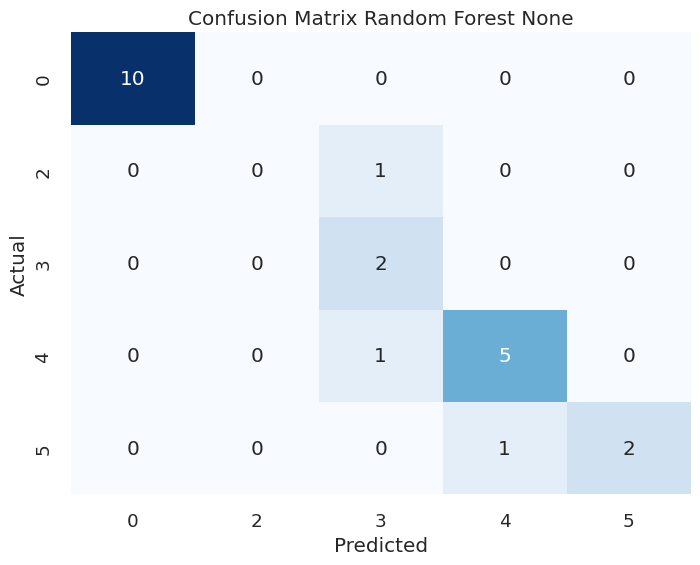

Feature Selection                Model  Accuracy  Precision    Recall  \
0              None  Logistic Regression  0.727273   0.753247  0.727273   
0               50%  Logistic Regression  0.772727   0.854545  0.772727   
0               60%  Logistic Regression  0.818182   0.939394  0.818182   
0               70%  Logistic Regression  0.863636   0.875000  0.863636   
0               80%  Logistic Regression  0.863636   0.875000  0.863636   
0               90%  Logistic Regression  0.909091   0.870130  0.909091   
0           Notable  Logistic Regression  0.909091   0.909091  0.909091   
0              None        Random Forest  0.863636   0.863636  0.863636   

   F1-Macro  F1-Weighted  \
0  0.448889     0.713131   
0  0.714286     0.779221   
0  0.793333     0.836364   
0  0.664762     0.850216   
0  0.664762     0.850216   
0  0.684615     0.888112   
0  0.715152     0.899449   
0  0.660000     0.851515   

                                                                         Confusion Matrix  \
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 4, 1], [0, 0, 3, 0, 0]]   
0  [[10, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 3, 2], [0, 0, 2, 0, 1]]   
0  [[10, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 2, 0, 0], [0, 0, 3, 3, 0], [0, 0, 1, 0, 2]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 4, 1], [0, 0, 0, 0, 3]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 4, 1], [0, 0, 0, 0, 3]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 1, 1, 0], [0, 0, 0, 6, 0], [0, 0, 0, 0, 3]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 5, 0], [0, 0, 0, 0, 3]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 5, 0], [0, 0, 0, 1, 2]]   

   CV Accuracy  CV F1 Macro  CV F1 Weighted  
0     0.704167     0.503167        0.667315  
0     0.688889     0.541310        0.668552  
0     0.748611     0.621310        0.727255  
0     0.798611     0.680476        0.770542  
0     0.787500     0.660476        0.752765  
0     0.783333     0.653976        0.747718  
0     0.798611     0.659167        0.757778  
0     0.818056     0.681111        0.795694

In [49]:
rf_model_0 = RandomForestClassifier(n_estimators = 10, random_state = 0)
temp = Models_Evaluation_Metrics(rf_model_0,X_train_transform,y_train,X_test_transform,y_test)
rf_model_all = temp[0]
result = [temp[-1]]
temp_result = pd.DataFrame(data = result)
feature_selection = "None"
cv_accuracy[str(model)+" "+str(feature_selection)] = temp[1]
cv_fmacro[str(model)+" "+str(feature_selection)] = temp[2]
cv_fweighted[str(model)+" "+str(feature_selection)] = temp[3]
temp_result.insert(0, 'Model', model)
temp_result.insert(0, 'Feature Selection', feature_selection)
plot_confussion_matrix(temp[-1]["Confusion Matrix"], model, feature_selection)
All_Result = pd.concat([All_Result, temp_result])
All_Result

With selected features

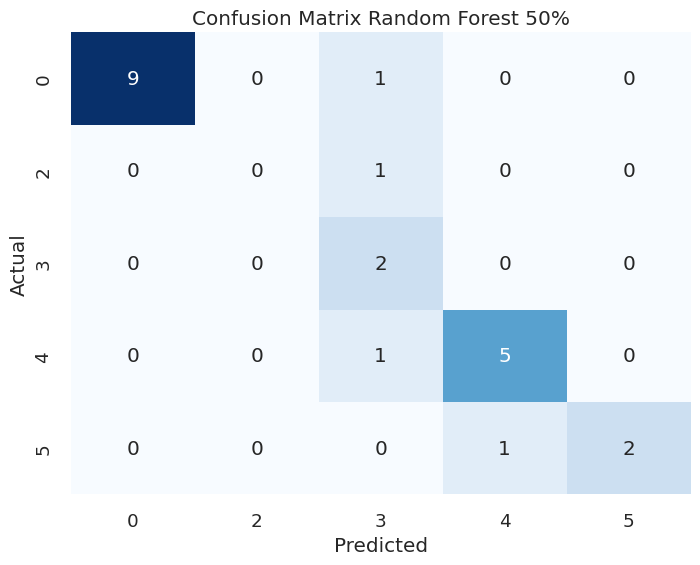

Feature Selection                Model  Accuracy  Precision    Recall  \
0              None  Logistic Regression  0.727273   0.753247  0.727273   
0               50%  Logistic Regression  0.772727   0.854545  0.772727   
0               60%  Logistic Regression  0.818182   0.939394  0.818182   
0               70%  Logistic Regression  0.863636   0.875000  0.863636   
0               80%  Logistic Regression  0.863636   0.875000  0.863636   
0               90%  Logistic Regression  0.909091   0.870130  0.909091   
0           Notable  Logistic Regression  0.909091   0.909091  0.909091   
0              None        Random Forest  0.863636   0.863636  0.863636   
0               50%        Random Forest  0.818182   0.854545  0.818182   

   F1-Macro  F1-Weighted  \
0  0.448889     0.713131   
0  0.714286     0.779221   
0  0.793333     0.836364   
0  0.664762     0.850216   
0  0.664762     0.850216   
0  0.684615     0.888112   
0  0.715152     0.899449   
0  0.660000     0.851515   
0  0.630426     0.818934   

                                                                         Confusion Matrix  \
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 4, 1], [0, 0, 3, 0, 0]]   
0  [[10, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 3, 2], [0, 0, 2, 0, 1]]   
0  [[10, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 2, 0, 0], [0, 0, 3, 3, 0], [0, 0, 1, 0, 2]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 4, 1], [0, 0, 0, 0, 3]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 4, 1], [0, 0, 0, 0, 3]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 1, 1, 0], [0, 0, 0, 6, 0], [0, 0, 0, 0, 3]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 5, 0], [0, 0, 0, 0, 3]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 5, 0], [0, 0, 0, 1, 2]]   
0   [[9, 0, 1, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 5, 0], [0, 0, 0, 1, 2]]   

   CV Accuracy  CV F1 Macro  CV F1 Weighted  
0     0.704167     0.503167        0.667315  
0     0.688889     0.541310        0.668552  
0     0.748611     0.621310        0.727255  
0     0.798611     0.680476        0.770542  
0     0.787500     0.660476        0.752765  
0     0.783333     0.653976        0.747718  
0     0.798611     0.659167        0.757778  
0     0.818056     0.681111        0.795694  
0     0.916667     0.846667        0.891852

In [50]:
rf_model = RandomForestClassifier(n_estimators = 10, random_state = 0)
temp = Models_Evaluation_Metrics(rf_model,X_train_transform_5,y_train,X_test_transform_5,y_test)
rf_model_50 = temp[0]
result = [temp[-1]]
temp_result = pd.DataFrame(data = result)
feature_selection = "50%"
cv_accuracy[str(model)+" "+str(feature_selection)] = temp[1]
cv_fmacro[str(model)+" "+str(feature_selection)] = temp[2]
cv_fweighted[str(model)+" "+str(feature_selection)] = temp[3]
temp_result.insert(0, 'Model', model)
temp_result.insert(0, 'Feature Selection', feature_selection)
plot_confussion_matrix(temp[-1]["Confusion Matrix"], model, feature_selection)
All_Result = pd.concat([All_Result, temp_result])
All_Result

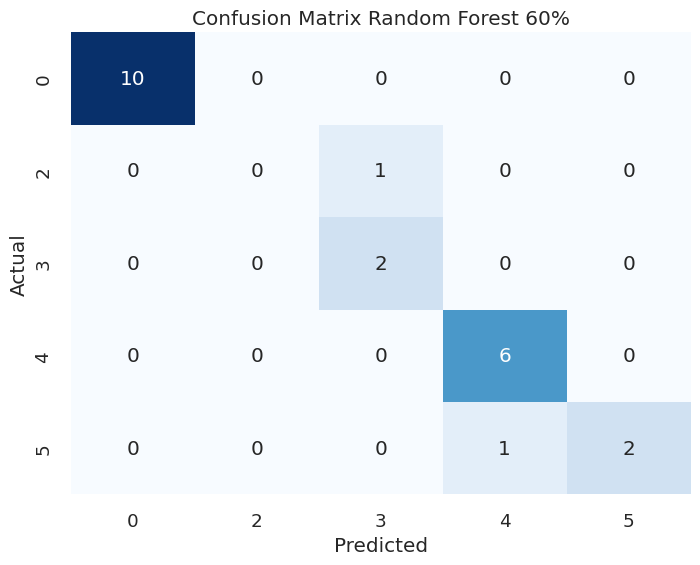

Feature Selection                Model  Accuracy  Precision    Recall  \
0              None  Logistic Regression  0.727273   0.753247  0.727273   
0               50%  Logistic Regression  0.772727   0.854545  0.772727   
0               60%  Logistic Regression  0.818182   0.939394  0.818182   
0               70%  Logistic Regression  0.863636   0.875000  0.863636   
0               80%  Logistic Regression  0.863636   0.875000  0.863636   
0               90%  Logistic Regression  0.909091   0.870130  0.909091   
0           Notable  Logistic Regression  0.909091   0.909091  0.909091   
0              None        Random Forest  0.863636   0.863636  0.863636   
0               50%        Random Forest  0.818182   0.854545  0.818182   
0               60%        Random Forest  0.909091   0.885281  0.909091   

   F1-Macro  F1-Weighted  \
0  0.448889     0.713131   
0  0.714286     0.779221   
0  0.793333     0.836364   
0  0.664762     0.850216   
0  0.664762     0.850216   
0  0.684615     0.888112   
0  0.715152     0.899449   
0  0.660000     0.851515   
0  0.630426     0.818934   
0  0.704615     0.888112   

                                                                         Confusion Matrix  \
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 4, 1], [0, 0, 3, 0, 0]]   
0  [[10, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 3, 2], [0, 0, 2, 0, 1]]   
0  [[10, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 2, 0, 0], [0, 0, 3, 3, 0], [0, 0, 1, 0, 2]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 4, 1], [0, 0, 0, 0, 3]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 4, 1], [0, 0, 0, 0, 3]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 1, 1, 0], [0, 0, 0, 6, 0], [0, 0, 0, 0, 3]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 5, 0], [0, 0, 0, 0, 3]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 5, 0], [0, 0, 0, 1, 2]]   
0   [[9, 0, 1, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 5, 0], [0, 0, 0, 1, 2]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 0, 6, 0], [0, 0, 0, 1, 2]]   

   CV Accuracy  CV F1 Macro  CV F1 Weighted  
0     0.704167     0.503167        0.667315  
0     0.688889     0.541310        0.668552  
0     0.748611     0.621310        0.727255  
0     0.798611     0.680476        0.770542  
0     0.787500     0.660476        0.752765  
0     0.783333     0.653976        0.747718  
0     0.798611     0.659167        0.757778  
0     0.818056     0.681111        0.795694  
0     0.916667     0.846667        0.891852  
0     0.880556     0.773333        0.863935

In [51]:
rf_model = RandomForestClassifier(n_estimators = 10, random_state = 0)
temp = Models_Evaluation_Metrics(rf_model,X_train_transform_6,y_train,X_test_transform_6,y_test)
rf_model_60 = temp[0]
result = [temp[-1]]
temp_result = pd.DataFrame(data = result)
feature_selection = "60%"
cv_accuracy[str(model)+" "+str(feature_selection)] = temp[1]
cv_fmacro[str(model)+" "+str(feature_selection)] = temp[2]
cv_fweighted[str(model)+" "+str(feature_selection)] = temp[3]
temp_result.insert(0, 'Model', model)
temp_result.insert(0, 'Feature Selection', feature_selection)
plot_confussion_matrix(temp[-1]["Confusion Matrix"], model, feature_selection)
All_Result = pd.concat([All_Result, temp_result])
All_Result

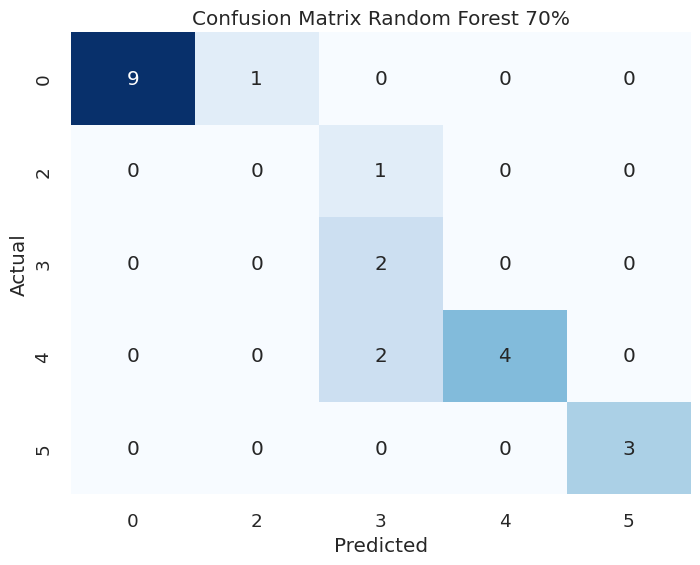

Feature Selection                Model  Accuracy  Precision    Recall  \
0              None  Logistic Regression  0.727273   0.753247  0.727273   
0               50%  Logistic Regression  0.772727   0.854545  0.772727   
0               60%  Logistic Regression  0.818182   0.939394  0.818182   
0               70%  Logistic Regression  0.863636   0.875000  0.863636   
0               80%  Logistic Regression  0.863636   0.875000  0.863636   
0               90%  Logistic Regression  0.909091   0.870130  0.909091   
0           Notable  Logistic Regression  0.909091   0.909091  0.909091   
0              None        Random Forest  0.863636   0.863636  0.863636   
0               50%        Random Forest  0.818182   0.854545  0.818182   
0               60%        Random Forest  0.909091   0.885281  0.909091   
0               70%        Random Forest  0.818182   0.900000  0.818182   

   F1-Macro  F1-Weighted  \
0  0.448889     0.713131   
0  0.714286     0.779221   
0  0.793333     0.836364   
0  0.664762     0.850216   
0  0.664762     0.850216   
0  0.684615     0.888112   
0  0.715152     0.899449   
0  0.660000     0.851515   
0  0.630426     0.818934   
0  0.704615     0.888112   
0  0.663759     0.837116   

                                                                         Confusion Matrix  \
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 4, 1], [0, 0, 3, 0, 0]]   
0  [[10, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 3, 2], [0, 0, 2, 0, 1]]   
0  [[10, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 2, 0, 0], [0, 0, 3, 3, 0], [0, 0, 1, 0, 2]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 4, 1], [0, 0, 0, 0, 3]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 4, 1], [0, 0, 0, 0, 3]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 1, 1, 0], [0, 0, 0, 6, 0], [0, 0, 0, 0, 3]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 5, 0], [0, 0, 0, 0, 3]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 5, 0], [0, 0, 0, 1, 2]]   
0   [[9, 0, 1, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 5, 0], [0, 0, 0, 1, 2]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 0, 6, 0], [0, 0, 0, 1, 2]]   
0   [[9, 1, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 2, 4, 0], [0, 0, 0, 0, 3]]   

   CV Accuracy  CV F1 Macro  CV F1 Weighted  
0     0.704167     0.503167        0.667315  
0     0.688889     0.541310        0.668552  
0     0.748611     0.621310        0.727255  
0     0.798611     0.680476        0.770542  
0     0.787500     0.660476        0.752765  
0     0.783333     0.653976        0.747718  
0     0.798611     0.659167        0.757778  
0     0.818056     0.681111        0.795694  
0     0.916667     0.846667        0.891852  
0     0.880556     0.773333        0.863935  
0     0.950000     0.916667        0.943750

In [52]:
rf_model = RandomForestClassifier(n_estimators = 10, random_state = 0)
temp = Models_Evaluation_Metrics(rf_model,X_train_transform_7,y_train,X_test_transform_7,y_test)
rf_model_70 = temp[0]
result = [temp[-1]]
temp_result = pd.DataFrame(data = result)
feature_selection = "70%"
cv_accuracy[str(model)+" "+str(feature_selection)] = temp[1]
cv_fmacro[str(model)+" "+str(feature_selection)] = temp[2]
cv_fweighted[str(model)+" "+str(feature_selection)] = temp[3]
temp_result.insert(0, 'Model', model)
temp_result.insert(0, 'Feature Selection', feature_selection)
plot_confussion_matrix(temp[-1]["Confusion Matrix"], model, feature_selection)
All_Result = pd.concat([All_Result, temp_result])
All_Result

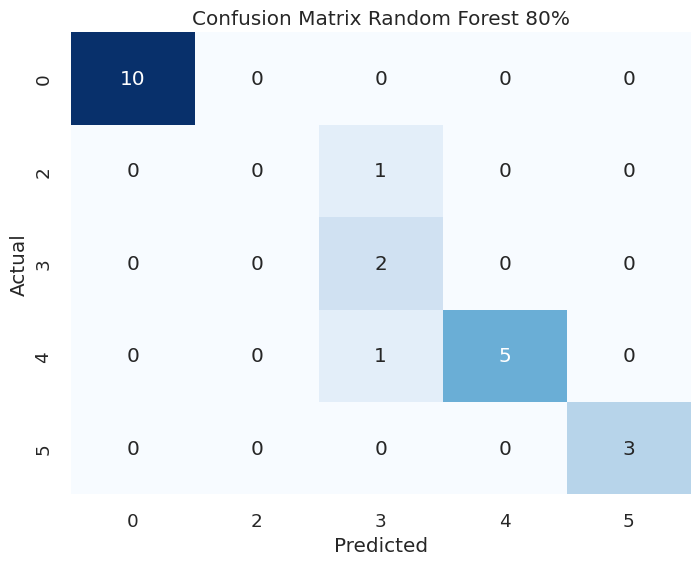

Feature Selection                Model  Accuracy  Precision    Recall  \
0              None  Logistic Regression  0.727273   0.753247  0.727273   
0               50%  Logistic Regression  0.772727   0.854545  0.772727   
0               60%  Logistic Regression  0.818182   0.939394  0.818182   
0               70%  Logistic Regression  0.863636   0.875000  0.863636   
0               80%  Logistic Regression  0.863636   0.875000  0.863636   
0               90%  Logistic Regression  0.909091   0.870130  0.909091   
0           Notable  Logistic Regression  0.909091   0.909091  0.909091   
0              None        Random Forest  0.863636   0.863636  0.863636   
0               50%        Random Forest  0.818182   0.854545  0.818182   
0               60%        Random Forest  0.909091   0.885281  0.909091   
0               70%        Random Forest  0.818182   0.900000  0.818182   
0               80%        Random Forest  0.909091   0.909091  0.909091   

   F1-Macro  F1-Weighted  \
0  0.448889     0.713131   
0  0.714286     0.779221   
0  0.793333     0.836364   
0  0.664762     0.850216   
0  0.664762     0.850216   
0  0.684615     0.888112   
0  0.715152     0.899449   
0  0.660000     0.851515   
0  0.630426     0.818934   
0  0.704615     0.888112   
0  0.663759     0.837116   
0  0.715152     0.899449   

                                                                         Confusion Matrix  \
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 4, 1], [0, 0, 3, 0, 0]]   
0  [[10, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 3, 2], [0, 0, 2, 0, 1]]   
0  [[10, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 2, 0, 0], [0, 0, 3, 3, 0], [0, 0, 1, 0, 2]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 4, 1], [0, 0, 0, 0, 3]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 4, 1], [0, 0, 0, 0, 3]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 1, 1, 0], [0, 0, 0, 6, 0], [0, 0, 0, 0, 3]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 5, 0], [0, 0, 0, 0, 3]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 5, 0], [0, 0, 0, 1, 2]]   
0   [[9, 0, 1, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 5, 0], [0, 0, 0, 1, 2]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 0, 6, 0], [0, 0, 0, 1, 2]]   
0   [[9, 1, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 2, 4, 0], [0, 0, 0, 0, 3]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 5, 0], [0, 0, 0, 0, 3]]   

   CV Accuracy  CV F1 Macro  CV F1 Weighted  
0     0.704167     0.503167        0.667315  
0     0.688889     0.541310        0.668552  
0     0.748611     0.621310        0.727255  
0     0.798611     0.680476        0.770542  
0     0.787500     0.660476        0.752765  
0     0.783333     0.653976        0.747718  
0     0.798611     0.659167        0.757778  
0     0.818056     0.681111        0.795694  
0     0.916667     0.846667        0.891852  
0     0.880556     0.773333        0.863935  
0     0.950000     0.916667        0.943750  
0     0.901389     0.813333        0.888426

In [53]:
rf_model = RandomForestClassifier(n_estimators = 10, random_state = 0)
temp = Models_Evaluation_Metrics(rf_model,X_train_transform_8,y_train,X_test_transform_8,y_test)
rf_model_80 = temp[0]
result = [temp[-1]]
temp_result = pd.DataFrame(data = result)
feature_selection = "80%"
cv_accuracy[str(model)+" "+str(feature_selection)] = temp[1]
cv_fmacro[str(model)+" "+str(feature_selection)] = temp[2]
cv_fweighted[str(model)+" "+str(feature_selection)] = temp[3]
temp_result.insert(0, 'Model', model)
temp_result.insert(0, 'Feature Selection', feature_selection)
plot_confussion_matrix(temp[-1]["Confusion Matrix"], model, feature_selection)
All_Result = pd.concat([All_Result, temp_result])
All_Result

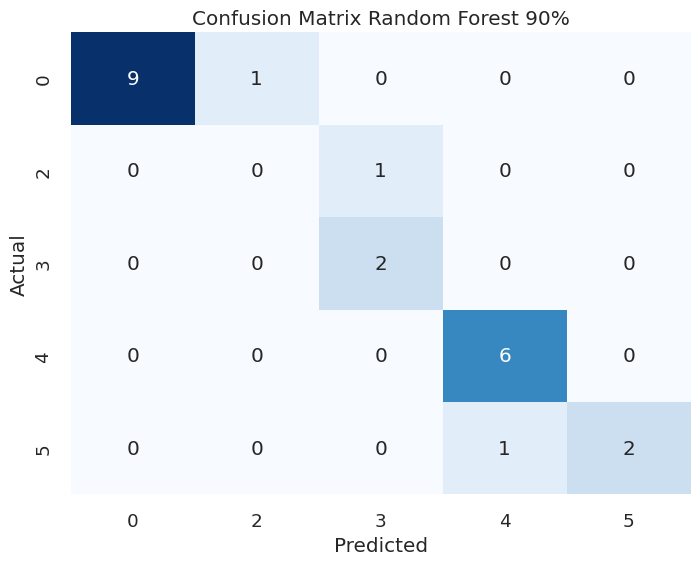

Feature Selection                Model  Accuracy  Precision    Recall  \
0              None  Logistic Regression  0.727273   0.753247  0.727273   
0               50%  Logistic Regression  0.772727   0.854545  0.772727   
0               60%  Logistic Regression  0.818182   0.939394  0.818182   
0               70%  Logistic Regression  0.863636   0.875000  0.863636   
0               80%  Logistic Regression  0.863636   0.875000  0.863636   
0               90%  Logistic Regression  0.909091   0.870130  0.909091   
0           Notable  Logistic Regression  0.909091   0.909091  0.909091   
0              None        Random Forest  0.863636   0.863636  0.863636   
0               50%        Random Forest  0.818182   0.854545  0.818182   
0               60%        Random Forest  0.909091   0.885281  0.909091   
0               70%        Random Forest  0.818182   0.900000  0.818182   
0               80%        Random Forest  0.909091   0.909091  0.909091   
0               90%        Random Forest  0.863636   0.885281  0.863636   

   F1-Macro  F1-Weighted  \
0  0.448889     0.713131   
0  0.714286     0.779221   
0  0.793333     0.836364   
0  0.664762     0.850216   
0  0.664762     0.850216   
0  0.684615     0.888112   
0  0.715152     0.899449   
0  0.660000     0.851515   
0  0.630426     0.818934   
0  0.704615     0.888112   
0  0.663759     0.837116   
0  0.715152     0.899449   
0  0.694089     0.864188   

                                                                         Confusion Matrix  \
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 4, 1], [0, 0, 3, 0, 0]]   
0  [[10, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 3, 2], [0, 0, 2, 0, 1]]   
0  [[10, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 2, 0, 0], [0, 0, 3, 3, 0], [0, 0, 1, 0, 2]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 4, 1], [0, 0, 0, 0, 3]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 4, 1], [0, 0, 0, 0, 3]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 1, 1, 0], [0, 0, 0, 6, 0], [0, 0, 0, 0, 3]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 5, 0], [0, 0, 0, 0, 3]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 5, 0], [0, 0, 0, 1, 2]]   
0   [[9, 0, 1, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 5, 0], [0, 0, 0, 1, 2]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 0, 6, 0], [0, 0, 0, 1, 2]]   
0   [[9, 1, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 2, 4, 0], [0, 0, 0, 0, 3]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 5, 0], [0, 0, 0, 0, 3]]   
0   [[9, 1, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 0, 6, 0], [0, 0, 0, 1, 2]]   

   CV Accuracy  CV F1 Macro  CV F1 Weighted  
0     0.704167     0.503167        0.667315  
0     0.688889     0.541310        0.668552  
0     0.748611     0.621310        0.727255  
0     0.798611     0.680476        0.770542  
0     0.787500     0.660476        0.752765  
0     0.783333     0.653976        0.747718  
0     0.798611     0.659167        0.757778  
0     0.818056     0.681111        0.795694  
0     0.916667     0.846667        0.891852  
0     0.880556     0.773333        0.863935  
0     0.950000     0.916667        0.943750  
0     0.901389     0.813333        0.888426  
0     0.938889     0.886000        0.925556

In [54]:
rf_model = RandomForestClassifier(n_estimators = 10, random_state = 0)
temp = Models_Evaluation_Metrics(rf_model,X_train_transform_9,y_train,X_test_transform_9,y_test)
rf_model_90 = temp[0]
result = [temp[-1]]
temp_result = pd.DataFrame(data = result)
feature_selection = "90%"
cv_accuracy[str(model)+" "+str(feature_selection)] = temp[1]
cv_fmacro[str(model)+" "+str(feature_selection)] = temp[2]
cv_fweighted[str(model)+" "+str(feature_selection)] = temp[3]
temp_result.insert(0, 'Model', model)
temp_result.insert(0, 'Feature Selection', feature_selection)
plot_confussion_matrix(temp[-1]["Confusion Matrix"], model, feature_selection)
All_Result = pd.concat([All_Result, temp_result])
All_Result

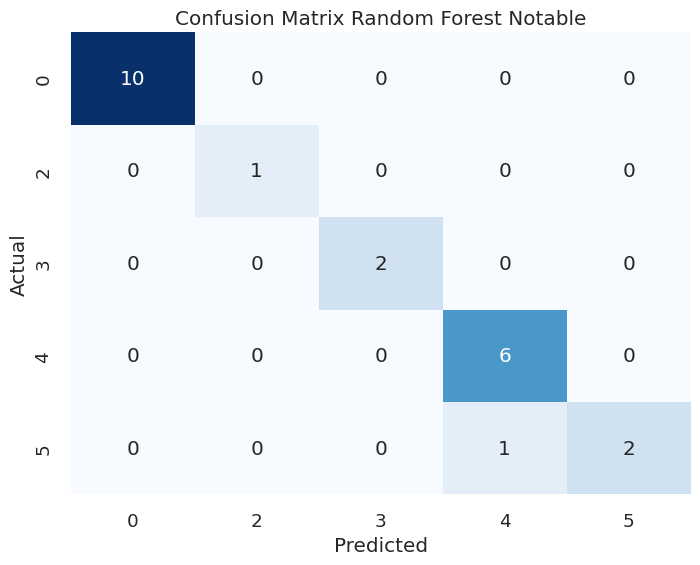

Feature Selection                Model  Accuracy  Precision    Recall  \
0              None  Logistic Regression  0.727273   0.753247  0.727273   
0               50%  Logistic Regression  0.772727   0.854545  0.772727   
0               60%  Logistic Regression  0.818182   0.939394  0.818182   
0               70%  Logistic Regression  0.863636   0.875000  0.863636   
0               80%  Logistic Regression  0.863636   0.875000  0.863636   
0               90%  Logistic Regression  0.909091   0.870130  0.909091   
0           Notable  Logistic Regression  0.909091   0.909091  0.909091   
0              None        Random Forest  0.863636   0.863636  0.863636   
0               50%        Random Forest  0.818182   0.854545  0.818182   
0               60%        Random Forest  0.909091   0.885281  0.909091   
0               70%        Random Forest  0.818182   0.900000  0.818182   
0               80%        Random Forest  0.909091   0.909091  0.909091   
0               90%        Random Forest  0.863636   0.885281  0.863636   
0           Notable        Random Forest  0.954545   0.961039  0.954545   

   F1-Macro  F1-Weighted  \
0  0.448889     0.713131   
0  0.714286     0.779221   
0  0.793333     0.836364   
0  0.664762     0.850216   
0  0.664762     0.850216   
0  0.684615     0.888112   
0  0.715152     0.899449   
0  0.660000     0.851515   
0  0.630426     0.818934   
0  0.704615     0.888112   
0  0.663759     0.837116   
0  0.715152     0.899449   
0  0.694089     0.864188   
0  0.944615     0.951748   

                                                                         Confusion Matrix  \
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 4, 1], [0, 0, 3, 0, 0]]   
0  [[10, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 3, 2], [0, 0, 2, 0, 1]]   
0  [[10, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 2, 0, 0], [0, 0, 3, 3, 0], [0, 0, 1, 0, 2]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 4, 1], [0, 0, 0, 0, 3]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 4, 1], [0, 0, 0, 0, 3]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 1, 1, 0], [0, 0, 0, 6, 0], [0, 0, 0, 0, 3]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 5, 0], [0, 0, 0, 0, 3]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 5, 0], [0, 0, 0, 1, 2]]   
0   [[9, 0, 1, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 5, 0], [0, 0, 0, 1, 2]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 0, 6, 0], [0, 0, 0, 1, 2]]   
0   [[9, 1, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 2, 4, 0], [0, 0, 0, 0, 3]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 5, 0], [0, 0, 0, 0, 3]]   
0   [[9, 1, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 0, 6, 0], [0, 0, 0, 1, 2]]   
0  [[10, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 2, 0, 0], [0, 0, 0, 6, 0], [0, 0, 0, 1, 2]]   

   CV Accuracy  CV F1 Macro  CV F1 Weighted  
0     0.704167     0.503167        0.667315  
0     0.688889     0.541310        0.668552  
0     0.748611     0.621310        0.727255  
0     0.798611     0.680476        0.770542  
0     0.787500     0.660476        0.752765  
0     0.783333     0.653976        0.747718  
0     0.798611     0.659167        0.757778  
0     0.818056     0.681111        0.795694  
0     0.916667     0.846667        0.891852  
0     0.880556     0.773333        0.863935  
0     0.950000     0.916667        0.943750  
0     0.901389     0.813333        0.888426  
0     0.938889     0.886000        0.925556  
0     1.000000     1.000000        1.000000

In [55]:
rf_model = RandomForestClassifier(n_estimators = 10, random_state = 0)
temp = Models_Evaluation_Metrics(rf_model,X_train_transform_0,y_train,X_test_transform_0,y_test)
rf_model_notable = temp[0]
result = [temp[-1]]
temp_result = pd.DataFrame(data = result)
feature_selection = "Notable"
cv_accuracy[str(model)+" "+str(feature_selection)] = temp[1]
cv_fmacro[str(model)+" "+str(feature_selection)] = temp[2]
cv_fweighted[str(model)+" "+str(feature_selection)] = temp[3]
temp_result.insert(0, 'Model', model)
temp_result.insert(0, 'Feature Selection', feature_selection)
plot_confussion_matrix(temp[-1]["Confusion Matrix"], model, feature_selection)
All_Result = pd.concat([All_Result, temp_result])
All_Result

# Final Evaluation

In [56]:
All_Result.to_csv(str(number_of_selected_features) + " features.csv", index = None)
All_Result

Feature Selection                Model  Accuracy  Precision    Recall  \
0              None  Logistic Regression  0.727273   0.753247  0.727273   
0               50%  Logistic Regression  0.772727   0.854545  0.772727   
0               60%  Logistic Regression  0.818182   0.939394  0.818182   
0               70%  Logistic Regression  0.863636   0.875000  0.863636   
0               80%  Logistic Regression  0.863636   0.875000  0.863636   
0               90%  Logistic Regression  0.909091   0.870130  0.909091   
0           Notable  Logistic Regression  0.909091   0.909091  0.909091   
0              None        Random Forest  0.863636   0.863636  0.863636   
0               50%        Random Forest  0.818182   0.854545  0.818182   
0               60%        Random Forest  0.909091   0.885281  0.909091   
0               70%        Random Forest  0.818182   0.900000  0.818182   
0               80%        Random Forest  0.909091   0.909091  0.909091   
0               90%        Random Forest  0.863636   0.885281  0.863636   
0           Notable        Random Forest  0.954545   0.961039  0.954545   

   F1-Macro  F1-Weighted  \
0  0.448889     0.713131   
0  0.714286     0.779221   
0  0.793333     0.836364   
0  0.664762     0.850216   
0  0.664762     0.850216   
0  0.684615     0.888112   
0  0.715152     0.899449   
0  0.660000     0.851515   
0  0.630426     0.818934   
0  0.704615     0.888112   
0  0.663759     0.837116   
0  0.715152     0.899449   
0  0.694089     0.864188   
0  0.944615     0.951748   

                                                                         Confusion Matrix  \
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 4, 1], [0, 0, 3, 0, 0]]   
0  [[10, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 3, 2], [0, 0, 2, 0, 1]]   
0  [[10, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 2, 0, 0], [0, 0, 3, 3, 0], [0, 0, 1, 0, 2]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 4, 1], [0, 0, 0, 0, 3]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 4, 1], [0, 0, 0, 0, 3]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 1, 1, 0], [0, 0, 0, 6, 0], [0, 0, 0, 0, 3]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 5, 0], [0, 0, 0, 0, 3]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 5, 0], [0, 0, 0, 1, 2]]   
0   [[9, 0, 1, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 5, 0], [0, 0, 0, 1, 2]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 0, 6, 0], [0, 0, 0, 1, 2]]   
0   [[9, 1, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 2, 4, 0], [0, 0, 0, 0, 3]]   
0  [[10, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 1, 5, 0], [0, 0, 0, 0, 3]]   
0   [[9, 1, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 2, 0, 0], [0, 0, 0, 6, 0], [0, 0, 0, 1, 2]]   
0  [[10, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 2, 0, 0], [0, 0, 0, 6, 0], [0, 0, 0, 1, 2]]   

   CV Accuracy  CV F1 Macro  CV F1 Weighted  
0     0.704167     0.503167        0.667315  
0     0.688889     0.541310        0.668552  
0     0.748611     0.621310        0.727255  
0     0.798611     0.680476        0.770542  
0     0.787500     0.660476        0.752765  
0     0.783333     0.653976        0.747718  
0     0.798611     0.659167        0.757778  
0     0.818056     0.681111        0.795694  
0     0.916667     0.846667        0.891852  
0     0.880556     0.773333        0.863935  
0     0.950000     0.916667        0.943750  
0     0.901389     0.813333        0.888426  
0     0.938889     0.886000        0.925556  
0     1.000000     1.000000        1.000000

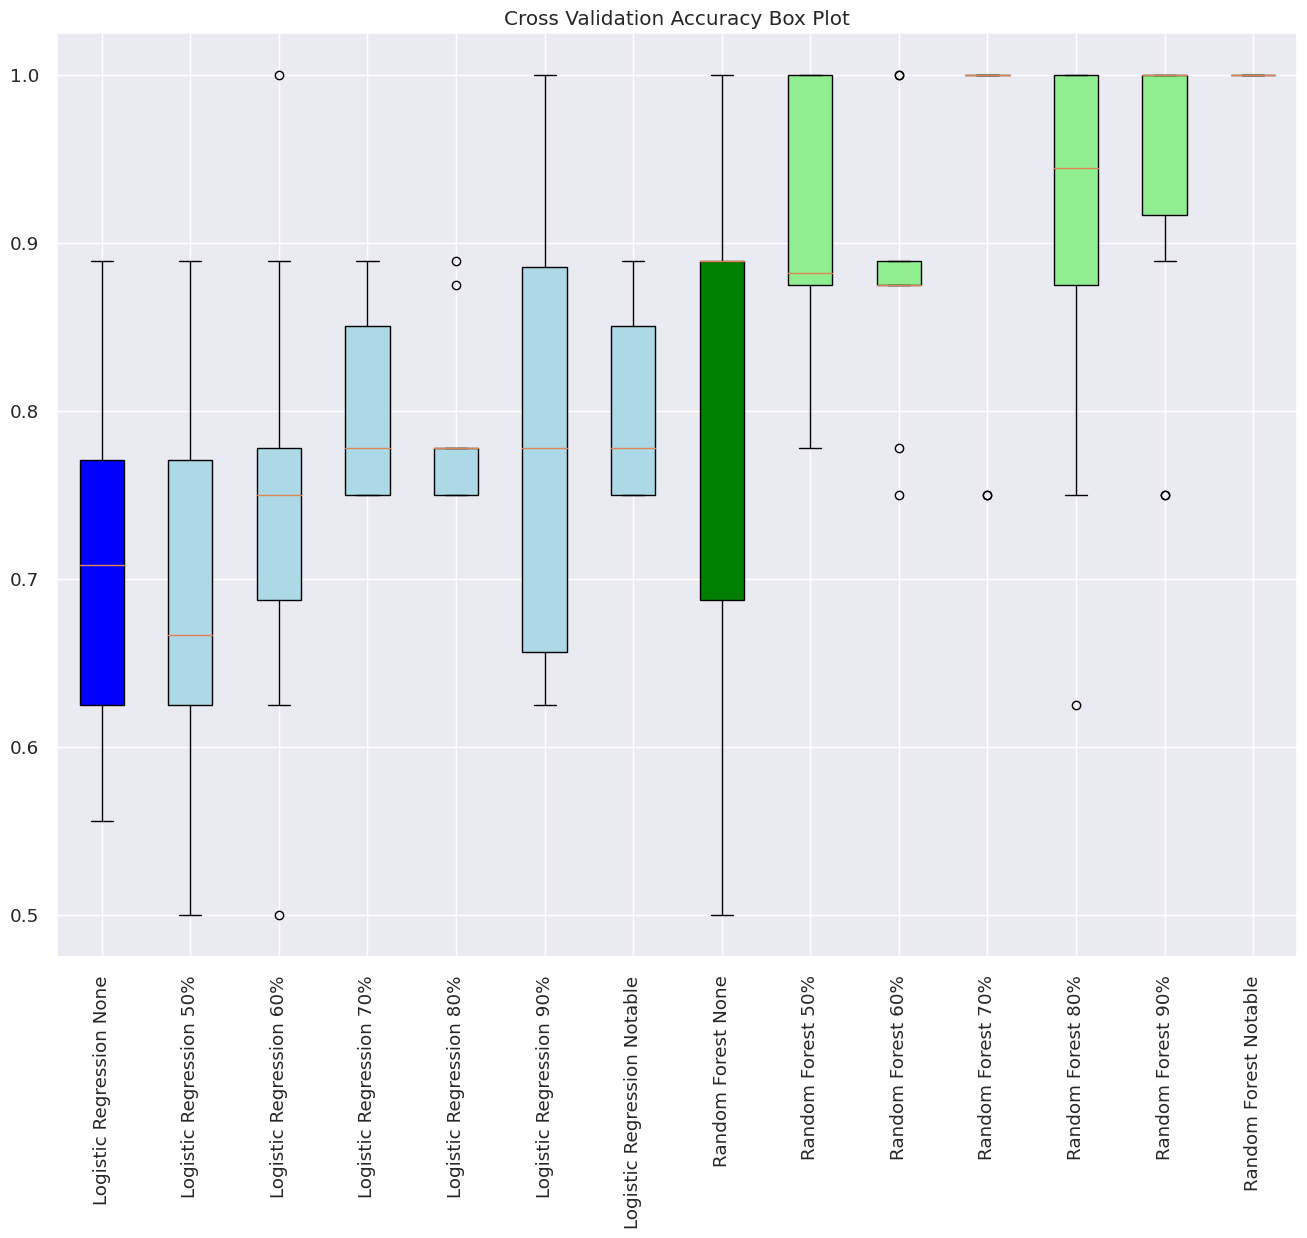

In [57]:
# rectangular box plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 12))
acc_plot = ax.boxplot(cv_accuracy,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=cv_accuracy.columns)  # will be used to label x-ticks
ax.set_title('Cross Validation Accuracy Box Plot')
plt.xticks(rotation=90)

# fill with colors
colors = ['blue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'green', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen']
for patch, color in zip(acc_plot['boxes'], colors):
  patch.set_facecolor(color)

plt.savefig('Cross Validation Accuracy Box Plot.png')
plt.show()

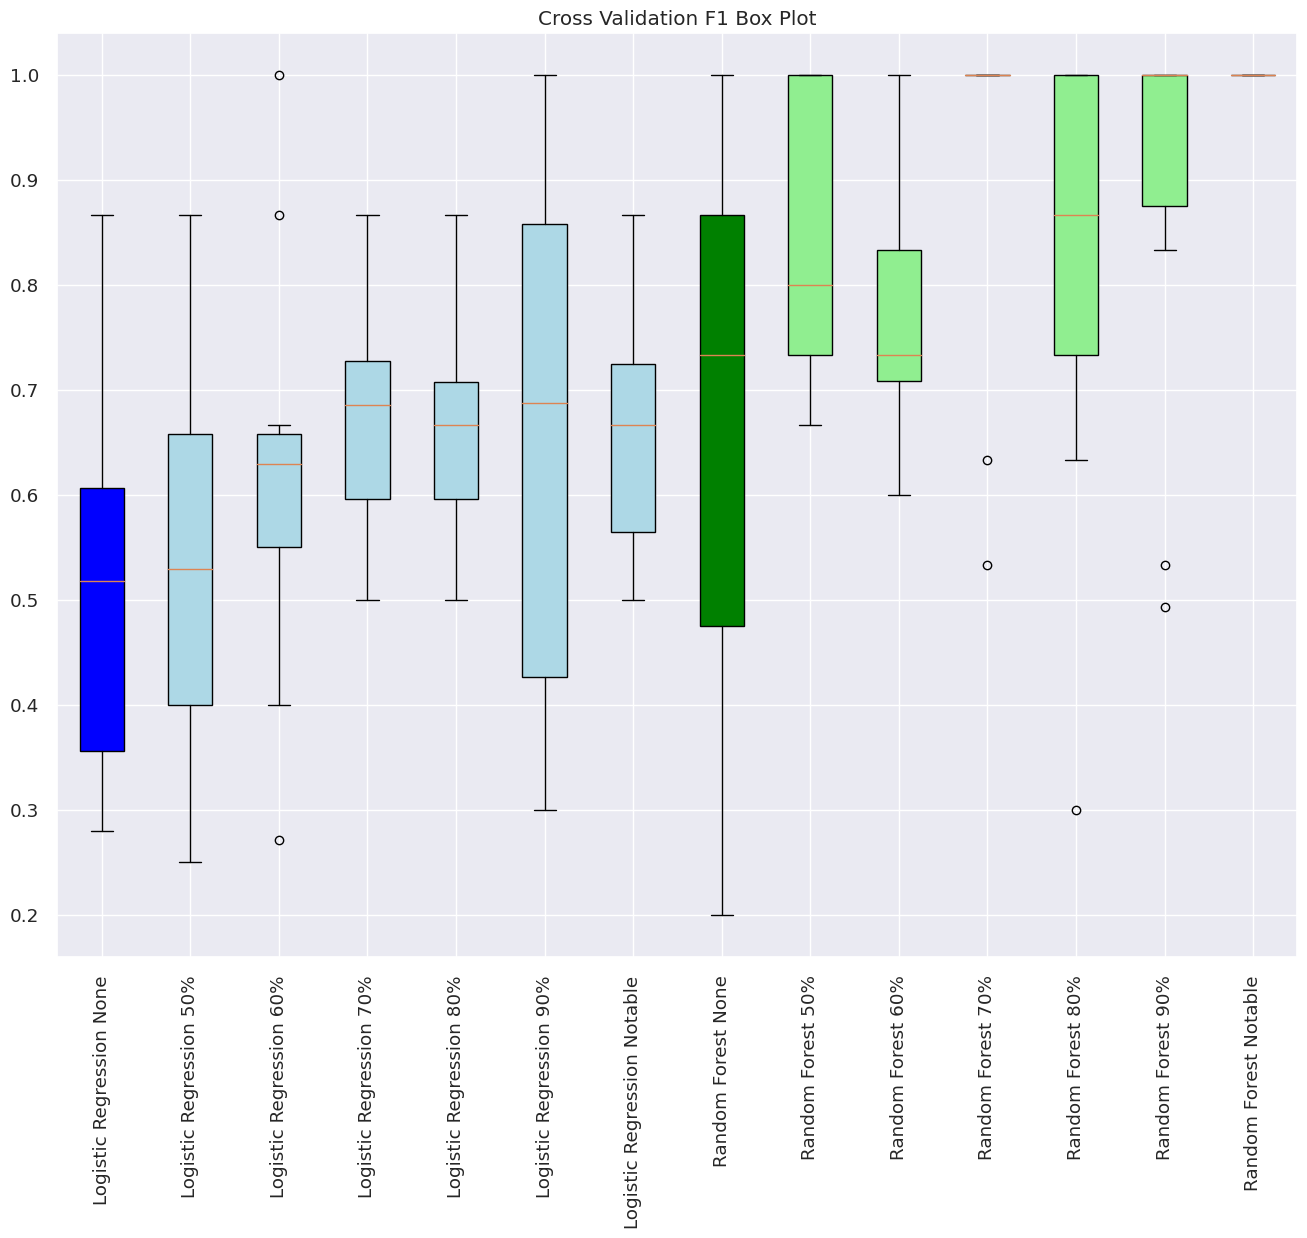

In [58]:
# rectangular box plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 12))

fmacro_plot = ax.boxplot(cv_fmacro,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=cv_fmacro.columns)  # will be used to label x-ticks
ax.set_title('Cross Validation F1 Box Plot')
plt.xticks(rotation=90)

# fill with colors
colors = ['blue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'green', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen']
for patch, color in zip(fmacro_plot['boxes'], colors):
  patch.set_facecolor(color)

plt.savefig('Cross Validation F1 Box Plot.png')
plt.show()

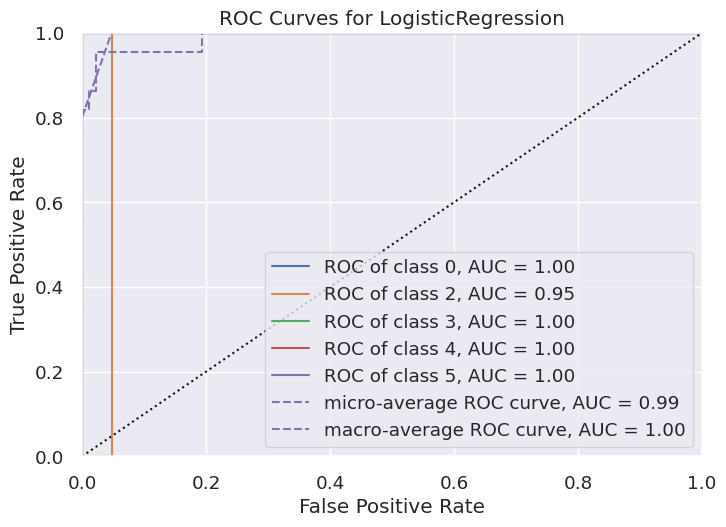

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [59]:
roc = ROCAUC(estimator = Logistic_model_notable, is_fitted = "auto")
roc.fit(X_train_transform_0, y_train)
roc.score(X_test_transform_0, y_test)
roc.show()

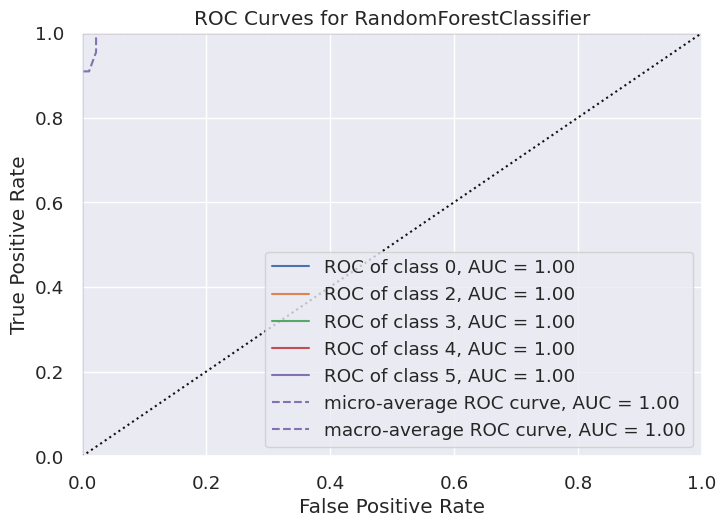

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [60]:
roc = ROCAUC(estimator = rf_model_notable, is_fitted = "auto")
roc.fit(X_train_transform_0, y_train)
roc.score(X_test_transform_0, y_test)
roc.show()

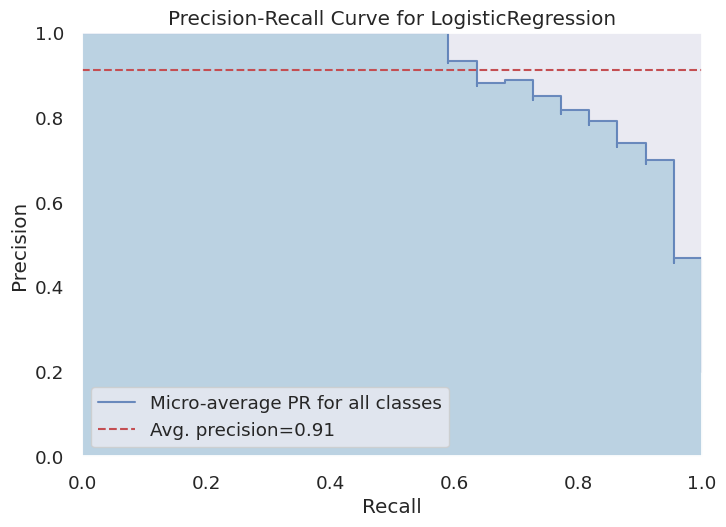

<Axes: title={'center': 'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [61]:
precision_recall_curve = PrecisionRecallCurve(estimator = Logistic_model_notable, is_fitted = "auto")
precision_recall_curve.fit(X_train_transform_0, y_train)
precision_recall_curve.score(X_test_transform_0, y_test)
precision_recall_curve.show()

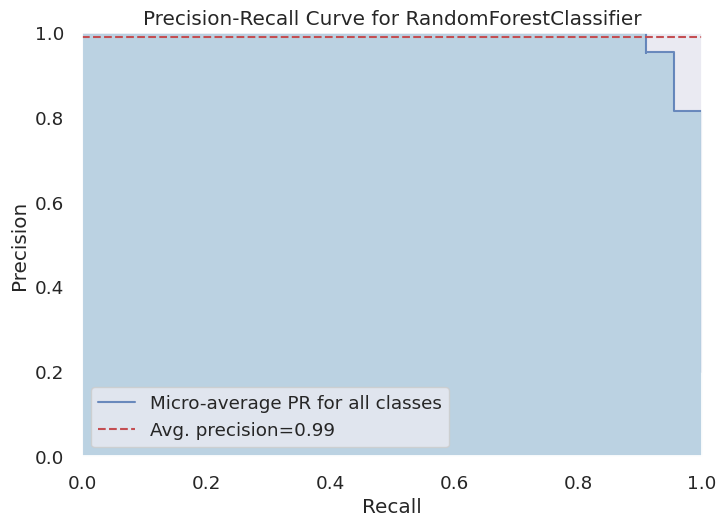

<Axes: title={'center': 'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [62]:
precision_recall_curve = PrecisionRecallCurve(estimator = rf_model_notable, is_fitted = "auto")
precision_recall_curve.fit(X_train_transform_0, y_train)
precision_recall_curve.score(X_test_transform_0, y_test)
precision_recall_curve.show()

In [63]:
from scipy.stats import ks_2samp
from sklearn.metrics import roc_auc_score

def ks_test(model, X_test, y_test):
  # Prepare probability
  y_pred_prob = model.predict_proba(X_test)

  # Initialize a list to store K-S statistics
  ks_statistics = []

  # Perform K-S test for each class
  for class_index in range(y_pred_prob.shape[1]):
    test_class_index = class_index
    if class_index != 0 :
      test_class_index += 1
    # print(y_pred_prob[y_test == test_class_index][:, class_index], y_pred_prob[y_test != class_index][:, class_index])
    # print(class_index, len(y_pred_prob[y_test == class_index][:, class_index])+len(y_pred_prob[y_test != class_index][:, class_index]))
    ks_statistic, p_value = ks_2samp(y_pred_prob[y_test == test_class_index][:, class_index], y_pred_prob[y_test != class_index][:, class_index])
    ks_statistics.append(ks_statistic)

  # Evaluate the K-S statistics
  for class_index, ks_statistic in enumerate(ks_statistics):
    test_class_index = class_index
    if class_index != 0 :
      test_class_index += 1
    print(f'K-S statistic for class {test_class_index}: {ks_statistic:.3f}')

In [64]:
print("For Logistic Regression Best Model:")
ks_test(Logistic_model_notable, X_test_transform_0, y_test)

For Logistic Regression Best Model:
K-S statistic for class 0: 1.000
K-S statistic for class 2: 0.909
K-S statistic for class 3: 0.905
K-S statistic for class 4: 0.700
K-S statistic for class 5: 0.812


In [65]:
print("For Random Forest Best Model:")
ks_test(rf_model_notable, X_test_transform_0, y_test)

For Random Forest Best Model:
K-S statistic for class 0: 1.000
K-S statistic for class 2: 0.955
K-S statistic for class 3: 0.905
K-S statistic for class 4: 0.700
K-S statistic for class 5: 0.812


### Comparing the two models

From Cross Validation (Training Point of View)
- The feature selection perform well for Logistic Regression, because the range of the interquartile of the model with feature selection (Light Color) especially for 70%, 80% and "Notable" improve based on the boxplot graph compared to the model with all feature (Bright Color).
- Furthermore the feature selection perform good for Random Forest, because the range of the interquartile of the model with feature selection (Light Color) especially for 70% and the notable is more compressed based on the boxplot graph compared to the model with all feature (Bright Color).

From Test Data
- According to the evaluation metrics chart, Random Forest with Notable features have the highest Accuracy, Precision, Recall and F1-Score which is around 95%.
- On the other hand, Logistic Regression best model is trained with Notable features with approximately 90% Accuracy, Precision, Recall and F1-Score Metrics.
-Moreover from the Cross Validation Average and Boxplot Comparison, It is evident that Random Forest with Notable Features has a higher score at the Train and Validation Dataset as well as the Test Dataset.

# Model Explanation with Feature Importance

## Logistic Regression Model

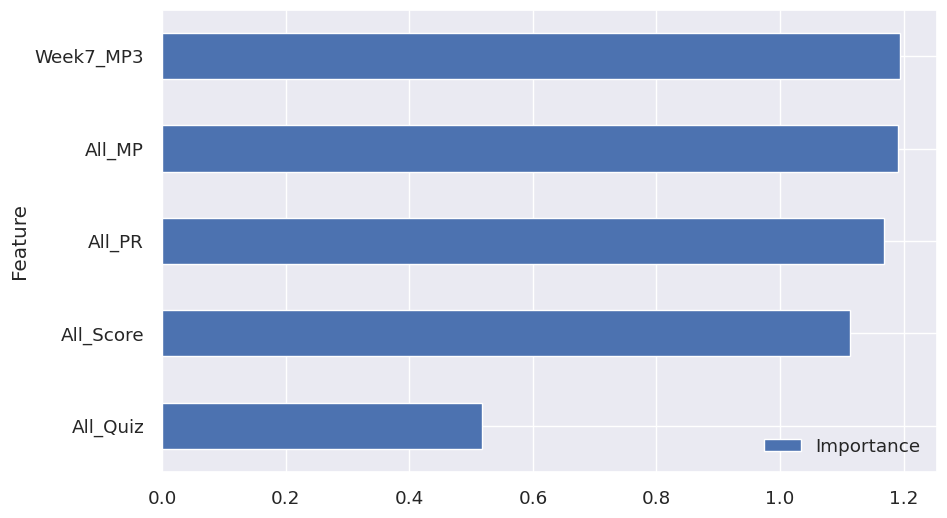

In [66]:
coefficients = Logistic_model_notable.coef_[0]

# feature_importance_logistic_regression = pd.DataFrame({'Feature': notable_feature, 'Importance': np.abs(coefficients)})
feature_importance_logistic_regression = pd.DataFrame({'Feature': notable_feature, 'Importance': np.abs(coefficients)})
feature_importance_logistic_regression = feature_importance_logistic_regression.sort_values('Importance', ascending=True)
feature_importance_logistic_regression.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6)).legend(loc='best')

# Save the plot as an image file (e.g., PNG, JPEG, PDF, etc.)
plt.savefig('Logistic Regression Feature Importance.png')

## Random Forest

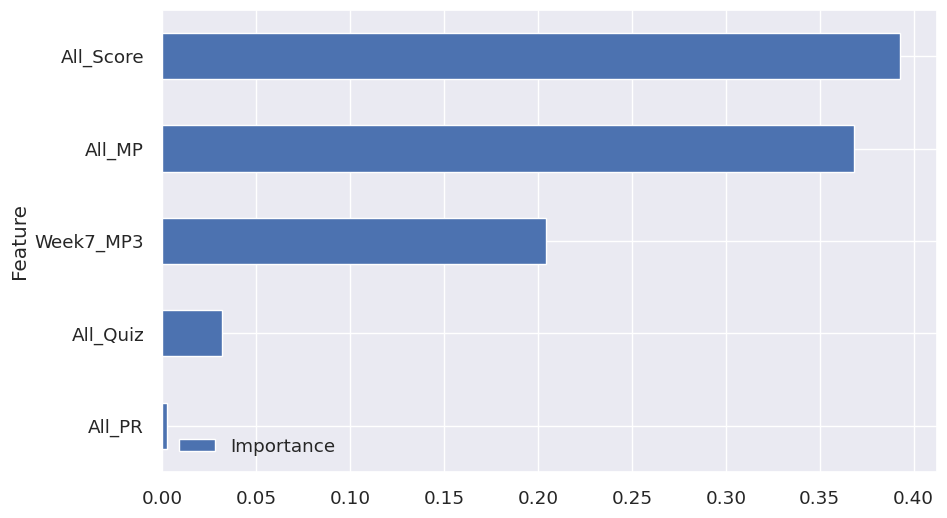

In [67]:
importances = rf_model_notable.feature_importances_

feature_importance_random_forest = pd.DataFrame({'Feature': notable_feature, 'Importance': np.abs(importances)})
feature_importance_random_forest = feature_importance_random_forest.sort_values('Importance', ascending=True)
feature_importance_random_forest.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6)).legend(loc='best')

plt.savefig('Random Forest Feature Importance.png')

As we can see from the plots, the models have different feature importance. However, the first three top features have similar importance for each best models, such as Week8_Total, Week7_MP3, Week5_MP2.
This make sense because MP stands for Mini Project have the greatest contribution to the total score compared to the other grades such as Quizes and Peer Reviews.